In [1]:
import matplotlib
import matplotlib.pyplot as plt
import shutil
import seaborn as sns
from decimal import Decimal
import numpy as np

plt.rcParams["font.size"]

10.0

In [2]:
from experiment.scenario import *
from experiment_setup.exp_utrecht_10_492_594_v2_setup import *

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


# Setup

Set up experiment:

In [3]:
load_existing_experiment = True

if not load_existing_experiment:
    e = Experiment(experiment_name, experiment_dirpath, default_config, scenario_settings, scene_parts)

    print("\nSetting up experiment:")
    e.setup()
else:
    print("\nLoading existing experiment:")
    e = Experiment.load(experiment_dirpath / experiment_name, load_scenarios=True)


Loading existing experiment:

Loading experiment configuration ...
Initializing experiment ...
Loading scenarios ...
- 143 scenarios


## Load experiment & get summary stats

### Load independently optimized scenario 80

In [ ]:
eo80 = Experiment.load(e.recon_optim_dirpath / "scenario_080_full_optim")

In [ ]:
eo80.run_steps(Scenario.setup_evaluation, lods="2.2")

In [ ]:
eo80.run_steps(Scenario.run_evaluation, evaluator_selection=["complexity", "complexity_diff", "geoflow_output"])

In [ ]:
eo80.compute_summary_statistics(evaluator_selection=["hausdorff", "complexity", "complexity_diff", "geoflow_output"], ignore_missing=True)

In [67]:
ss80 = eo80.summary_stats

### Load all

In [4]:
# Load optimization experiments

# eos = [
#     Experiment.load(r"C:\Users\Florian\Data\city-to-scan-to-city\utrecht_10-492-594_v2\06_reconstruction_optimization\scenario_055"),
#     Experiment.load(r"C:\Users\Florian\Data\city-to-scan-to-city\utrecht_10-492-594_v2\06_reconstruction_optimization\scenario_055_penalize_complexity"),
#     Experiment.load(r"C:\Users\Florian\Data\city-to-scan-to-city\utrecht_10-492-594_v2\06_reconstruction_optimization\scenario_055_penalize_complexity_harder")
# ]

# Load optimization experiments for all scenarios that were optimized (up to 120)
scenarios = list(range(121))

eos = []
for si in scenarios:
    print(f"\n{si}", end="")
    eos.append(Experiment.load(e[si].recon_optim_output_dirpath, load_scenarios=True))


0
Loading experiment configuration ...
File `scenario_settings.json` not found.
Initializing experiment ...
Loading scenarios ...
- 51 scenarios

1
Loading experiment configuration ...
File `scenario_settings.json` not found.
Initializing experiment ...
Loading scenarios ...
- 51 scenarios

2
Loading experiment configuration ...
File `scenario_settings.json` not found.
Initializing experiment ...
Loading scenarios ...
- 51 scenarios

3
Loading experiment configuration ...
File `scenario_settings.json` not found.
Initializing experiment ...
Loading scenarios ...
- 51 scenarios

4
Loading experiment configuration ...
File `scenario_settings.json` not found.
Initializing experiment ...
Loading scenarios ...
- 51 scenarios

5
Loading experiment configuration ...
File `scenario_settings.json` not found.
Initializing experiment ...
Loading scenarios ...
- 51 scenarios

6
Loading experiment configuration ...
File `scenario_settings.json` not found.
Initializing experiment ...
Loading scenari

### Evaluate

Only necessary to first compute or to update the summary statistics. Otherwise, they can be loaded using the next section.

In [5]:
for eo in eos:
    eo.run_steps(Scenario.setup_evaluation, lods=["2.2"])


Running 'setup_evaluation' for optim_0000 ...

Finished 'setup_evaluation' for optim_0000 after 0:00:00.040456.

Running 'setup_evaluation' for optim_0001 ...

Finished 'setup_evaluation' for optim_0001 after 0:00:00.022967.

Running 'setup_evaluation' for optim_0002 ...

Finished 'setup_evaluation' for optim_0002 after 0:00:00.018235.

Running 'setup_evaluation' for optim_0003 ...

Finished 'setup_evaluation' for optim_0003 after 0:00:00.027543.

Running 'setup_evaluation' for optim_0004 ...

Finished 'setup_evaluation' for optim_0004 after 0:00:00.059522.

Running 'setup_evaluation' for optim_0005 ...

Finished 'setup_evaluation' for optim_0005 after 0:00:00.041007.

Running 'setup_evaluation' for optim_0006 ...

Finished 'setup_evaluation' for optim_0006 after 0:00:00.029523.

Running 'setup_evaluation' for optim_0007 ...

Finished 'setup_evaluation' for optim_0007 after 0:00:00.022065.

Running 'setup_evaluation' for optim_0008 ...

Finished 'setup_evaluation' for optim_0008 after

In [20]:
# Run additional evaluator to check their results. They may already have been run while running ReconstructionOptimization.select_optimal_scenario().
for eo in eos:
    eo.run_steps(Scenario.run_evaluation, evaluator_selection=["complexity", "complexity_diff", "geoflow_output"])


Running 'run_evaluation' for optim_0000 ...


Finished 'run_evaluation' for optim_0000 after 0:00:00.

Running 'run_evaluation' for optim_0001 ...


Finished 'run_evaluation' for optim_0001 after 0:00:00.

Running 'run_evaluation' for optim_0002 ...


Finished 'run_evaluation' for optim_0002 after 0:00:00.

Running 'run_evaluation' for optim_0003 ...


Finished 'run_evaluation' for optim_0003 after 0:00:00.

Running 'run_evaluation' for optim_0004 ...


Finished 'run_evaluation' for optim_0004 after 0:00:00.

Running 'run_evaluation' for optim_0005 ...

Starting ComplexityEvaluator ...

Counting faces for LOD 2.2 ...

Finished ComplexityEvaluator after 0:00:02.675895.

Starting ComplexityDifferenceEvaluator ...

Starting ComplexityEvaluator ...

Counting faces for LOD 2.2 ...

Finished ComplexityEvaluator after 0:00:01.083143.

Evaluation results for complexity evaluator 2 already exist. Will not reevaluate.

Finished ComplexityDifferenceEvaluator after 0:00:01.098141.

Starting Geofl

### Summary stats

If the summary statistics were computed previously and an update is not necessary, an execution of the second cell suffices to load the data.

In [7]:
# Compute summary statistics for the evaluators whose results are available
for eo in eos:
    # eo.compute_summary_statistics(evaluator_selection=["hausdorff", "complexity", "iou_3d", "geoflow_output"], ignore_missing=True)
    eo.compute_summary_statistics(evaluator_selection=["hausdorff", "complexity", "complexity_diff", "geoflow_output"], ignore_missing=True)


Computing summary statistics of 51 scenarios in experiment scenario_000 ...


Computing summary statistics of 51 scenarios in experiment scenario_001 ...

Computing summary statistics of 51 scenarios in experiment scenario_002 ...

Computing summary statistics of 51 scenarios in experiment scenario_003 ...

Computing summary statistics of 51 scenarios in experiment scenario_004 ...

Computing summary statistics of 51 scenarios in experiment scenario_005 ...

Computing summary statistics of 51 scenarios in experiment scenario_006 ...

Computing summary statistics of 50 scenarios in experiment scenario_007 ...

Computing summary statistics of 51 scenarios in experiment scenario_008 ...

Computing summary statistics of 51 scenarios in experiment scenario_009 ...

Computing summary statistics of 51 scenarios in experiment scenario_010 ...

Computing summary statistics of 51 scenarios in experiment scenario_011 ...

Computing summary statistics of 51 scenarios in experiment scenario_012 ..

In [5]:
# If summary stats were computed previously, this will simply load the values
ss = [eo.summary_stats for eo in eos]

Loading summary statistics from file `summary_statistics.csv` ...
Loading summary statistics from file `summary_statistics.csv` ...
Loading summary statistics from file `summary_statistics.csv` ...
Loading summary statistics from file `summary_statistics.csv` ...
Loading summary statistics from file `summary_statistics.csv` ...
Loading summary statistics from file `summary_statistics.csv` ...
Loading summary statistics from file `summary_statistics.csv` ...
Loading summary statistics from file `summary_statistics.csv` ...
Loading summary statistics from file `summary_statistics.csv` ...
Loading summary statistics from file `summary_statistics.csv` ...
Loading summary statistics from file `summary_statistics.csv` ...
Loading summary statistics from file `summary_statistics.csv` ...
Loading summary statistics from file `summary_statistics.csv` ...
Loading summary statistics from file `summary_statistics.csv` ...
Loading summary statistics from file `summary_statistics.csv` ...
Loading su

## Checks and validations

In [108]:
relevant_columns = [
    "target_density",
    "error_level",
    
    "rms_min_dist_22_mean",
    "hausdorff_22_rms",
    "n_faces_22_mean",
    "n_faces_22_abs_diff_mean",
    "n_faces_22_norm_abs_diff_mean",
#    "iou_22_mean",
]

### Within range of best

Get all optim scenarios for which the target metric (rms min dist) does not exceed the optimum target metric value by more than `threshold_ratio` times the range of target metric values (i.e., target metric maximum minus minimum).
For the selection of the optimal scenario, this is probably not a good approach, because the range from minimum (optimal as optimized) and maximum value is random and thus not comparable. In each optimization experiment, the optimizer may have accidentally hit a completely different worst value of the target metric.

In [ ]:
s = ss[9]
threshold_ratio = 1.1  # 0.03
s[
    s.rms_min_dist_22_mean < (
            s.rms_min_dist_22_mean.min() + threshold_ratio*(s.rms_min_dist_22_mean.max() - s.rms_min_dist_22_mean.min())
    )
].loc[:, ["gpkg_unique_22", *relevant_columns]]

### Get names of best optim scenarios

For each scenario's optimization experiment, get the name of the optimization scenario (=iteration) that was found to be best. Requires that method ReconstructionOptimization.select_optimal_scenario() was executed at any point before.

In [8]:
best_params_filename = "best_parameter_set_10%_min_faces.json"

best_optim_scenario_names = [scenario.get_best_optim_scenario_name(best_params_filename) for scenario in e[:121]]
for scenario in e[:121]:
    print(f"{scenario.name}: {scenario.get_best_optim_scenario_name(best_params_filename)}")

scenario_000: optim_0016
scenario_001: optim_0009
scenario_002: optim_0015
scenario_003: optim_0013
scenario_004: optim_0013
scenario_005: optim_0049
scenario_006: optim_0033
scenario_007: optim_0036
scenario_008: optim_0021
scenario_009: optim_0016
scenario_010: optim_0004
scenario_011: optim_0039
scenario_012: optim_0043
scenario_013: optim_0024
scenario_014: optim_0048
scenario_015: optim_0044
scenario_016: optim_0043
scenario_017: optim_0044
scenario_018: optim_0004
scenario_019: optim_0028
scenario_020: optim_0045
scenario_021: optim_0049
scenario_022: optim_0040
scenario_023: optim_0037
scenario_024: optim_0049
scenario_025: optim_0015
scenario_026: optim_0031
scenario_027: optim_0047
scenario_028: optim_0035
scenario_029: optim_0014
scenario_030: optim_0047
scenario_031: optim_0006
scenario_032: optim_0010
scenario_033: optim_0020
scenario_034: optim_0050
scenario_035: optim_0033
scenario_036: optim_0029
scenario_037: optim_0014
scenario_038: optim_0024
scenario_039: optim_0039


In [ ]:
# So far only scenarios up to 109 were optimized, but optimization experiments up to 120 are loaded.
# This is to make the lists equally long.
best_optim_scenario_names.extend(["" for i in range(11)])
len(best_optim_scenario_names)

Distribution of the number of the optimization scenario that was selected as best among all iterations. 

In [ ]:
best_optim_scenario_numbers = [int(n[-4:]) for n in best_optim_scenario_names]
plt.hist(best_optim_scenario_numbers, bins=np.arange(0,75, 5))

In [ ]:
# Create a column that indicates the scenario with the "best" params
# (as integer, so it can be used to color dots in plots)
for i in range(len(ss)):
    ss[i]["is_best"] = (ss[i].index == best_optim_scenario_names[i]).astype(int)

In [ ]:
# Create a column that indicates the scenarios that are not worse by more than a certain amount than the best target metric value
for i in range(len(ss)):
    ss[i]["best_pct"] = (ss[i]["rms_min_dist_22_mean"] <= 1.2 * ss[i]["rms_min_dist_22_mean"].min()).astype(int)

### Check all optim scenarios within range of best

In [156]:
range_from_best = 0.1
s = ss[10]

# Only check scenarios in which at least 80 buildings were reconstructed
s_greater_80_buildings = s[s["gpkg_unique_22"] >= 80]
s = s_greater_80_buildings

print(s[s.rms_min_dist_22_mean <= s.rms_min_dist_22_mean.min() * (1 + range_from_best)].n_faces_22_mean.idxmin())
s[s.rms_min_dist_22_mean <= s.rms_min_dist_22_mean.min() * (1 + range_from_best)].loc[:, ["gpkg_unique_22", *relevant_columns]]

optim_0043


gpkg_unique_22  target_density  error_level  rms_min_dist_22_mean  \
name                                                                            
optim_0005              85             2.0          1.0              0.943284   
optim_0006              86             2.0          1.0              0.881017   
optim_0007              87             2.0          1.0              0.900503   
optim_0008              89             2.0          1.0              0.903147   
optim_0024              87             2.0          1.0              0.961258   
optim_0030              85             2.0          1.0              0.914923   
optim_0034              86             2.0          1.0              0.942377   
optim_0043              93             2.0          1.0              0.895366   
optim_0044              86             2.0          1.0              0.967600   

            hausdorff_22_rms  n_faces_22_mean  n_faces_22_abs_diff_mean  \
name                                                                      
optim_0005          5.594179        82.800000                 57.882353   
optim_0006          5.544700        96.546512                 51.825581   
optim_0007          5.742728        90.114943                 51.310345   
optim_0008          5.528074        86.382022                 54.157303   
optim_0024          5.799270        75.057471                 61.678161   
optim_0030          5.496456        70.529412                 64.411765   
optim_0034          5.522045        65.395349                 70.697674   
optim_0043          5.542895        63.892473                 64.279570   
optim_0044          5.531279        74.662791                 66.686047   

            n_faces_22_norm_abs_diff_mean  
name                                       
optim_0005                       0.566498  
optim_0006                       0.574272  
optim_0007                       0.532310  
optim_0008                       0.537116  
optim_0024                       0.541585  
optim_0030                       0.501880  
optim_0034                       0.612426  
optim_0043                       0.570400  
optim_0044                       0.613447

Would the same optimal scenario have been selected if there had been the additional condition that it must have yielded at least 80 reconstructed buildings?

In [160]:
range_from_best = 0.1

for i, s in enumerate(ss):
    s_greater_80_buildings = s[s["gpkg_unique_22"] > 80]
    s_gr80 = s_greater_80_buildings
    
    best_within_range = s[s.rms_min_dist_22_mean <= s.rms_min_dist_22_mean.min() * (1 + range_from_best)].n_faces_22_mean.idxmin()
    best_within_range_gr80 = s_gr80[s_gr80.rms_min_dist_22_mean <= s_gr80.rms_min_dist_22_mean.min() * (1 + range_from_best)].n_faces_22_mean.idxmin()
    
    print(f"{i}: {best_within_range == best_within_range_gr80}, {best_within_range}, {best_within_range_gr80}")

0: True, optim_0016, optim_0016
1: True, optim_0009, optim_0009
2: True, optim_0015, optim_0015
3: True, optim_0013, optim_0013
4: True, optim_0013, optim_0013
5: True, optim_0049, optim_0049
6: True, optim_0033, optim_0033
7: True, optim_0036, optim_0036
8: True, optim_0021, optim_0021
9: True, optim_0016, optim_0016
10: False, optim_0004, optim_0043
11: True, optim_0039, optim_0039
12: True, optim_0043, optim_0043
13: True, optim_0024, optim_0024
14: True, optim_0048, optim_0048
15: True, optim_0044, optim_0044
16: True, optim_0043, optim_0043
17: True, optim_0044, optim_0044
18: True, optim_0004, optim_0004
19: True, optim_0028, optim_0028
20: True, optim_0045, optim_0045
21: True, optim_0049, optim_0049
22: True, optim_0040, optim_0040
23: True, optim_0037, optim_0037
24: True, optim_0049, optim_0049
25: True, optim_0015, optim_0015
26: True, optim_0031, optim_0031
27: True, optim_0047, optim_0047
28: True, optim_0035, optim_0035
29: True, optim_0014, optim_0014
30: True, optim_004

In [70]:
s = ss80
print(s[s.rms_min_dist_22_mean <= s.rms_min_dist_22_mean.min() * (1 + range_from_best)].n_faces_22_mean.idxmin())
s[s.rms_min_dist_22_mean <= s.rms_min_dist_22_mean.min() * (1 + range_from_best)].loc[:, relevant_columns]

optim_0165


target_density  error_level  rms_min_dist_22_mean  \
name                                                            
optim_0021       22.627417          0.3              0.153064   
optim_0066       22.627417          0.3              0.153142   
optim_0083       22.627417          0.3              0.163963   
optim_0084       22.627417          0.3              0.155403   
optim_0086       22.627417          0.3              0.164578   
optim_0090       22.627417          0.3              0.155211   
optim_0097       22.627417          0.3              0.164418   
optim_0099       22.627417          0.3              0.166704   
optim_0102       22.627417          0.3              0.168327   
optim_0104       22.627417          0.3              0.159921   
optim_0106       22.627417          0.3              0.168022   
optim_0114       22.627417          0.3              0.156783   
optim_0127       22.627417          0.3              0.161547   
optim_0128       22.627417          0.3              0.165395   
optim_0138       22.627417          0.3              0.167238   
optim_0161       22.627417          0.3              0.166777   
optim_0165       22.627417          0.3              0.161256   
optim_0166       22.627417          0.3              0.163962   

            hausdorff_22_rms  n_faces_22_mean  n_faces_22_abs_diff_mean  \
name                                                                      
optim_0021          1.515803       377.898990                264.606061   
optim_0066          1.466629       372.949495                259.656566   
optim_0083          1.854467       375.717172                262.424242   
optim_0084          1.664115       281.060606                167.767677   
optim_0086          1.717887       292.101010                178.808081   
optim_0090          1.654165       337.919192                224.626263   
optim_0097          1.750991       327.484848                214.191919   
optim_0099          1.678533       385.616162                272.323232   
optim_0102          1.675763       328.181818                214.888889   
optim_0104          1.635540       360.292929                247.000000   
optim_0106          1.663630       306.747475                193.454545   
optim_0114          1.692337       328.363636                215.070707   
optim_0127          1.695342       272.545455                159.252525   
optim_0128          1.648877       343.353535                230.060606   
optim_0138          1.690009       422.565657                309.272727   
optim_0161          1.668175       386.414141                273.121212   
optim_0165          1.898021       251.535354                138.242424   
optim_0166          1.846606       268.919192                155.626263   

            n_faces_22_norm_abs_diff_mean  
name                                       
optim_0021                       2.439440  
optim_0066                       2.410134  
optim_0083                       2.359118  
optim_0084                       1.686774  
optim_0086                       1.790094  
optim_0090                       2.051504  
optim_0097                       2.051080  
optim_0099                       2.435224  
optim_0102                       1.991799  
optim_0104                       2.272621  
optim_0106                       1.864599  
optim_0114                       1.970462  
optim_0127                       1.653798  
optim_0128                       2.069375  
optim_0138                       2.781786  
optim_0161                       2.512987  
optim_0165                       1.522400  
optim_0166                       1.599221

### Check correctness of select_optimal_scenario() results

In [83]:
range_from_best = 0.10
for i, s in enumerate(ss):
    best_optim_scenario_name = s[s.rms_min_dist_22_mean <= s.rms_min_dist_22_mean.min() * (1 + range_from_best)].n_faces_22_mean.idxmin()
    print(f"{i}: {best_optim_scenario_name == best_optim_scenario_names[i]} ({best_optim_scenario_name})")

0: True (optim_0016)
1: True (optim_0009)
2: True (optim_0015)
3: True (optim_0013)
4: True (optim_0013)
5: True (optim_0049)
6: True (optim_0033)
7: True (optim_0036)
8: True (optim_0021)
9: True (optim_0016)
10: True (optim_0004)
11: True (optim_0039)
12: True (optim_0043)
13: True (optim_0024)
14: True (optim_0048)
15: True (optim_0044)
16: True (optim_0043)
17: True (optim_0044)
18: True (optim_0004)
19: True (optim_0028)
20: True (optim_0045)
21: True (optim_0049)
22: True (optim_0040)
23: True (optim_0037)
24: True (optim_0049)
25: True (optim_0015)
26: True (optim_0031)
27: True (optim_0047)
28: True (optim_0035)
29: True (optim_0014)
30: True (optim_0047)
31: True (optim_0006)
32: True (optim_0010)
33: True (optim_0020)
34: True (optim_0050)
35: True (optim_0033)
36: True (optim_0029)
37: True (optim_0014)
38: True (optim_0024)
39: True (optim_0039)
40: True (optim_0032)
41: True (optim_0024)
42: True (optim_0012)
43: True (optim_0016)
44: True (optim_0024)
45: True (optim_0003

## Concat summary stats of optimal scenarios

### Best scenarios as selected

Only if select_optimal_scenario_multirank() was used; not necessary if selection was based on 10% range within best scenario, because in this case the identification of the selected scenario (lowest face number) is a one-liner.

In [ ]:
best_optim_scenarios = pd.concat(
    [ss[i].loc[best_optim_scenario_names[i], ["target_density", "error_level", *relevant_columns]] for i in range(110)],
    axis=1,
    keys=zip(range(110), best_optim_scenario_names[:110])
).transpose()
best_optim_scenarios["error_level"] = best_optim_scenarios.std_horizontal_error.apply(lambda x: Decimal(str(np.round(x, decimals=1))))

In [ ]:
best_optim_scenarios.loc[[i*11-1 for i in range(1,10)], :]

In [ ]:
best_optim_scenarios[88:99].plot.scatter("rms_min_dist_22_mean", "n_faces_22_mean", c="error_level", colormap="tab10")

In [ ]:
best_optim_scenarios.loc[[i*11+0 for i in range(10)], :].plot.scatter("rms_min_dist_22_mean", "n_faces_22_mean", c="target_density", colormap="viridis")

### Min, mean, and max values across optim scenarios

In [55]:
opt_results_min = pd.concat(
    [s.describe().loc["min", relevant_columns] for s in ss],
    axis=1,
).transpose()
opt_results_mean = pd.concat(
    [s.describe().loc["mean", relevant_columns] for s in ss],
    axis=1,
).transpose()
opt_results_max = pd.concat(
    [s.describe().loc["max", relevant_columns] for s in ss],
    axis=1,
).transpose()
opt_results_mean["error_level"] = opt_results_mean.error_level.apply(lambda x: Decimal(str(np.round(x, decimals=1))))
opt_results_min["error_level"] = opt_results_min.error_level.apply(lambda x: Decimal(str(np.round(x, decimals=1))))
opt_results_max["error_level"] = opt_results_max.error_level.apply(lambda x: Decimal(str(np.round(x, decimals=1))))

In [ ]:
for error_lvl in opt_results_mean.std_horizontal_error.unique():
    print(Decimal(str(np.round(error_lvl, decimals=1))))

### Optim scenarios with smallest RMS min dist

#### Overall

In [52]:
opt_results_min_rms_dist = pd.concat(
    [ss[i].loc[
         ss[i]["rms_min_dist_22_mean"].idxmin(),
         relevant_columns
     ] for i in range(len(ss))],
    axis=1,
).transpose()
opt_results_min_rms_dist["error_level"] = opt_results_min_rms_dist.error_level.apply(lambda x: Decimal(str(np.round(x, decimals=1))))

#### With lowest face number within range of smallest RMS min dist

In [6]:
opt_results_min_faces_within_range = {}
for i in range(0, 5):
    print(i)
    within_pct = str(int(i*5))
    opt_results_min_faces_within_range[within_pct] = pd.concat(
        [s.loc[
             s[s.rms_min_dist_22_mean <= s.rms_min_dist_22_mean.min() * (1 + i*0.05)].n_faces_22_mean.idxmin(),
             :  # relevant_columns
         ] for s in ss],
        axis=1,
    ).transpose()
    opt_results_min_faces_within_range[within_pct]["error_level"] = opt_results_min_faces_within_range[within_pct].error_level.apply(lambda x: Decimal(str(np.round(x, decimals=1))))
    opt_results_min_faces_within_range[within_pct]["Error Level"] = (opt_results_min_faces_within_range[within_pct]["error_level"] * 100).astype(int).astype(str) + "%"

0
1
2
3
4


### Results obtained with default parameter values

In [173]:
opt_results_default_params = pd.concat(
    [s.loc["optim_0000", :] for s in ss],
    axis=1
).transpose()
opt_results_default_params["error_level"] = opt_results_default_params.error_level.apply(lambda x: Decimal(str(np.round(x, decimals=1))))
opt_results_default_params["Error Level"] = (opt_results_default_params["error_level"] * 100).astype(int).astype(str) + "%"

#### Difference to results with smallest RMS min dist

In [194]:
opt_results_diff_best_default = opt_results_min_faces_within_range["0"].copy()

diff = opt_results_min_faces_within_range["0"].reset_index().rms_min_dist_22_mean - opt_results_default_params.reset_index().rms_min_dist_22_mean
diff.index = opt_results_diff_best_default.index
opt_results_diff_best_default["rms_min_dist_22_mean_diff"] = diff

diff = opt_results_min_faces_within_range["0"].reset_index().n_faces_22_mean - opt_results_default_params.reset_index().n_faces_22_mean
diff.index = opt_results_diff_best_default.index
opt_results_diff_best_default["n_faces_22_mean_diff"] = diff

## RMS Min Dist + Face Number

What are the metrics in terms of mean, minimum, maximum, across all optimization scenarios of each point cloud scenario?

What are the results for each scenario's optimization scenario with the lowest RMS minimum distance, i.e., the best achieved target metric?

What are the results for each scenario's optimization scenario that was executed with Geoflow default parameter values?

To get there, in each case:

- Change the error_level column from float to Decimal type in such a way that scenarios with equal error level also have an equal value in this column (the floats differ in the smallest decimal places)

- Create a string column error_level_str that cannot be cast to int to be able to plot everything with Seaborn, which has [a bug related to this](https://stackoverflow.com/a/62004636), although [it may be a feature](https://stackoverflow.com/a/62009177)


### Seaborn

In [221]:
def plot_optim_results(opt_results_table, y_variable, y_label, title, font_size = 12, log_x = False, log_y=False, ax = None, ylim=None, lower_ylim=None, legend=True, line_width=1.5, grid=None, palette="tab20"):
    plt.rcParams["font.size"] = font_size
    
    if ax is None:
        fig, ax = plt.subplots(figsize=(6, 6))

    sns.lineplot(ax=ax, data=opt_results_table, x="target_density", y=y_variable, hue="Error Level", style="Error Level", markers=True, dashes=False, palette=palette, linewidth=line_width)
    ax.set_xlabel("Point Density [pt m$^{-2}$]")
    ax.set_ylabel(y_label)
    ax.set_title(title)
    
    if ylim is not None:
        ax.set_ylim(ylim)
    
    if lower_ylim is not None:
        y_min, y_max = ax.get_ylim()
        ax.set_ylim((lower_ylim, y_max))
    
    if log_x:
        ax.set_xscale("log")
        # These x_ticks are made specifically for point density levels. Must be adapted for other plots.
        ax.set_xticks([2**i for i in range(1, 7)])
        ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    
    if log_y:
        ax.set_yscale("log")
        # These y_ticks are made specifically for the face number vertical axis. Must be adapted for other plots.
        ax.set_yticks([i*20 for i in range(3, 6)] + [i*200 for i in range(1, 6)] + [i*2000 for i in range(1, 2)])
        ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

    if not legend:
        ax.get_legend().remove()
    
    if grid is not None:
        ax.grid(grid)
    
    return ax

In [34]:
plt.rcParams["lines.linewidth"]

1.5

#### Including difference plots

<Axes: title={'center': 'Improvement in RMS Minimum Distance'}, xlabel='Point Density [pt m$^{-2}$]', ylabel='$\\Delta$ RMS Minimum Distance'>

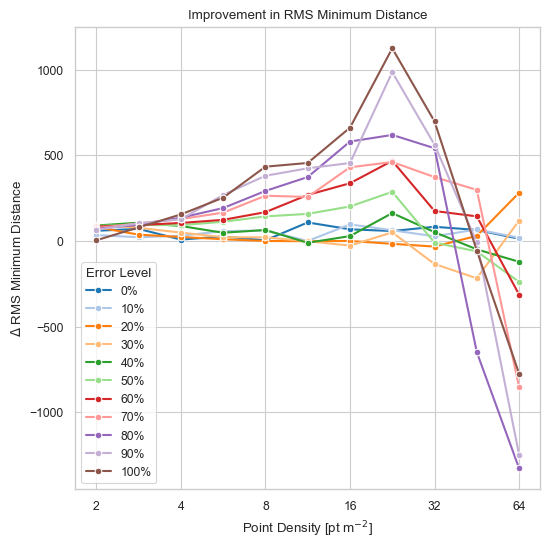

In [195]:
plot_optim_results(opt_results_diff_best_default, "rms_min_dist_22_mean_diff", "$\Delta$ RMS Minimum Distance", "Improvement in RMS Minimum Distance", log_x=True)

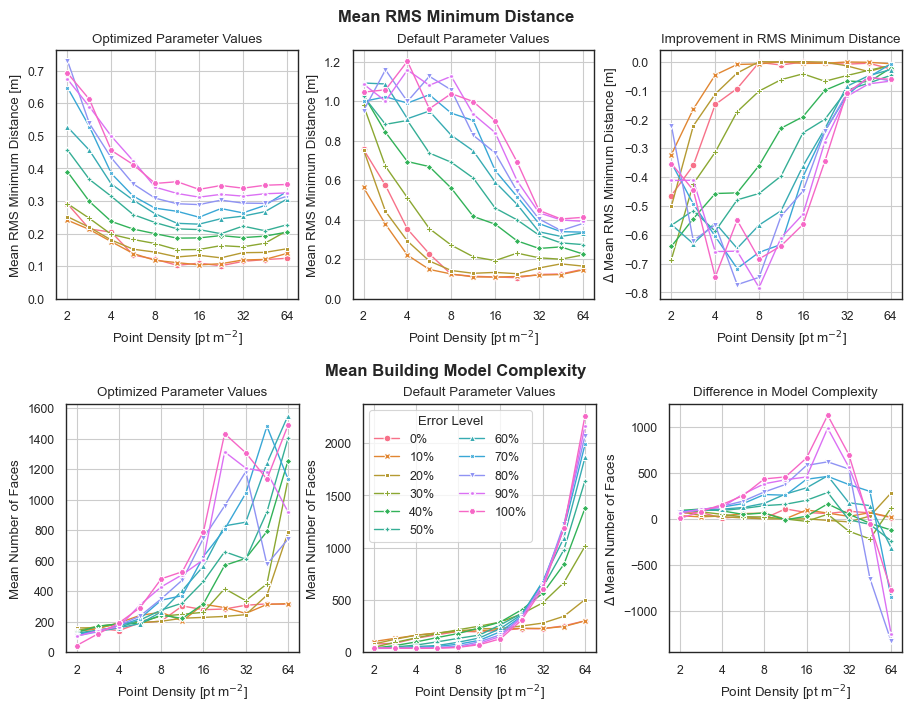

In [222]:
# A single figure with two subfigures (with independent titles) with three subplots each

sns.set_theme(style="white", context="paper")

font_size = 12
line_width = 1
plt.rcParams["font.size"] = font_size  # must be set before plt.figure() if using plot_optim_results() within subplots

# ==================================================================================
# Figure

fig = plt.figure(figsize=(9, 7), constrained_layout=True)
subfigs = fig.subfigures(nrows=2, ncols=1)

# ----------------------------------------------------------------------------------
# Subfigure 1

subfigs[0].suptitle("Mean RMS Minimum Distance", fontweight="bold", fontsize=12)
axs = subfigs[0].subplots(nrows=1, ncols=3, sharey=False) #, constrained_layout=True) #, sharex=True, sharey="row")

opt_results_table = opt_results_min_faces_within_range["0"]
plot_optim_results(
    opt_results_table,
    "rms_min_dist_22_mean",
    "Mean RMS Minimum Distance [m]",
    "Optimized Parameter Values",
    font_size=font_size,
    log_x=True,
    lower_ylim=0,
    legend=False,
    line_width=line_width,
    grid=True,
    palette="husl",
    ax = axs[0]
)
# axs[0].legend(title="Error Level", fontsize=9, ncols=2)

opt_results_table = opt_results_default_params[~opt_results_default_params["n_faces_22_mean"].isna()]
plot_optim_results(
    opt_results_table,
    "rms_min_dist_22_mean",
    "Mean RMS Minimum Distance [m]",
    "Default Parameter Values",
    font_size=font_size,
    log_x=True,
    lower_ylim=0,
    legend=False,
    line_width=line_width,
    grid=True,
    palette="husl",
    ax = axs[1]
)

opt_results_table = opt_results_diff_best_default
plot_optim_results(
    opt_results_table,
    "rms_min_dist_22_mean_diff",
    "$\Delta$ Mean RMS Minimum Distance [m]",
    "Improvement in RMS Minimum Distance",
    font_size=font_size,
    log_x=True,
    legend=False,
    line_width=line_width,
    grid=True,
    palette="husl",
    ax = axs[2]
)

# ----------------------------------------------------------------------------------
# Subfigure 2

subfigs[1].suptitle("Mean Building Model Complexity", fontweight="bold", fontsize=12)
axs = subfigs[1].subplots(nrows=1, ncols=3, sharey=False) #, constrained_layout=True) #, sharex=True, sharey="row")

opt_results_table = opt_results_min_faces_within_range["0"]
plot_optim_results(
    opt_results_table,
    "n_faces_22_mean",
    "Mean Number of Faces",
    "Optimized Parameter Values",
    font_size=font_size,
    log_x=True,
    # log_y=True,
    # ylim=(0, 2400), #1700),
    lower_ylim=0,
    legend=False,
    line_width=line_width,
    grid=True,
    palette="husl",
    ax = axs[0]
)

opt_results_table = opt_results_default_params[~opt_results_default_params["n_faces_22_mean"].isna()]
plot_optim_results(
    opt_results_table,
    "n_faces_22_mean",
    "Mean Number of Faces",
    "Default Parameter Values",
    font_size=font_size,
    log_x=True,
    # log_y=True,
    # ylim=(0, 2400), #1700),
    lower_ylim=0,
    legend=True,
    line_width=line_width,
    grid=True,
    palette="husl",
    ax = axs[1]
)
axs[1].legend(title="Error Level", fontsize=9, ncols=2)

opt_results_table = opt_results_diff_best_default
plot_optim_results(
    opt_results_table,
    "n_faces_22_mean_diff",
    "$\Delta$ Mean Number of Faces",
    "Difference in Model Complexity",
    font_size=font_size,
    log_x=True,
    legend=False,
    line_width=line_width,
    grid=True,
    palette="husl",
    ax = axs[2]
)

plt.savefig("figures/recon_optim_results_incl_diff.png", dpi=300, bbox_inches="tight")
plt.show()

#### No difference plots

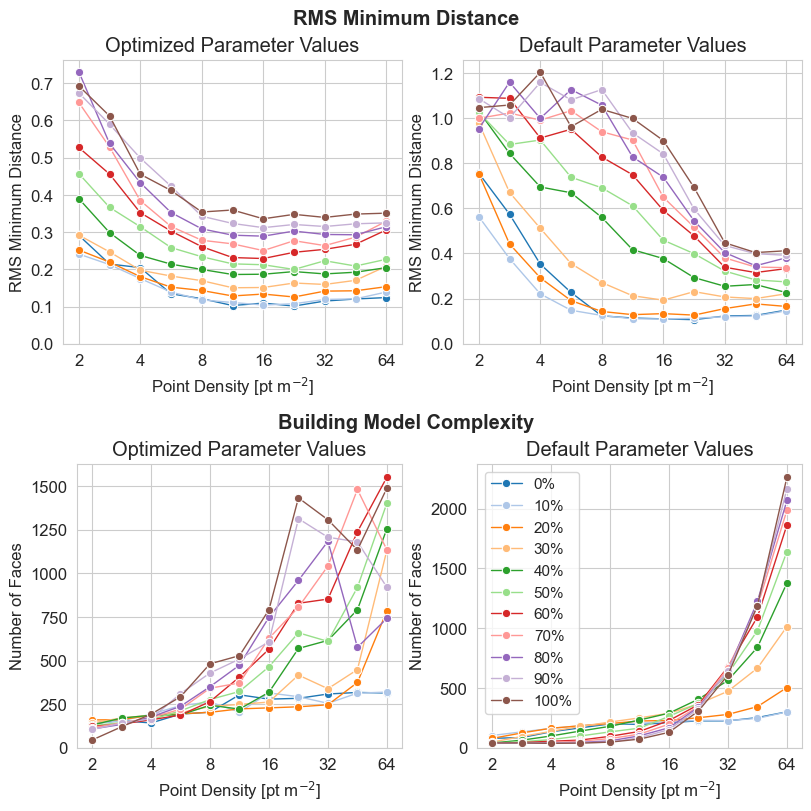

In [131]:
# A single figure with two subfigures (with independent titles) with two subplots each

font_size = 12
line_width = 1
plt.rcParams["font.size"] = font_size  # must be set before plt.figure() if using plot_optim_results() within subplots

fig = plt.figure(figsize=(8, 8), constrained_layout=True)  # (16, 14)
subfigs = fig.subfigures(nrows=2, ncols=1)

subfigs[0].suptitle("RMS Minimum Distance", fontweight="bold")
axs = subfigs[0].subplots(nrows=1, ncols=2, sharey=False) #, constrained_layout=True) #, sharex=True, sharey="row")

opt_results_table = opt_results_min_faces_within_range["0"]
plot_optim_results(
    opt_results_table,
    "rms_min_dist_22_mean",
    "RMS Minimum Distance",
    "Optimized Parameter Values",
    font_size=font_size,
    log_x=True,
    lower_ylim=0,
    legend=False,
    line_width=line_width,
    ax = axs[0]
)

opt_results_table = opt_results_default_params[~opt_results_default_params["n_faces_22_mean"].isna()]
plot_optim_results(
    opt_results_table,
    "rms_min_dist_22_mean",
    "RMS Minimum Distance",
    "Default Parameter Values",
    font_size=font_size,
    log_x=True,
    lower_ylim=0,
    legend=False,
    line_width=line_width,
    ax = axs[1]
)

subfigs[1].suptitle("Building Model Complexity", fontweight="bold")
axs = subfigs[1].subplots(nrows=1, ncols=2, sharey=False) #, constrained_layout=True) #, sharex=True, sharey="row")

opt_results_table = opt_results_min_faces_within_range["0"]
plot_optim_results(
    opt_results_table,
    "n_faces_22_mean",
    "Number of Faces",
    "Optimized Parameter Values",
    font_size=font_size,
    log_x=True,
    # log_y=True,
    # ylim=(0, 2400), #1700),
    lower_ylim=0,
    legend=False,
    line_width=line_width,
    ax = axs[0]
)

opt_results_table = opt_results_default_params[~opt_results_default_params["n_faces_22_mean"].isna()]
plot_optim_results(
    opt_results_table,
    "n_faces_22_mean",
    "Number of Faces",
    "Default Parameter Values",
    font_size=font_size,
    log_x=True,
    # log_y=True,
    # ylim=(0, 2400), #1700),
    lower_ylim=0,
    legend=True,
    line_width=line_width,
    ax = axs[1]
)
axs[1].legend(fontsize=11)

# plt.savefig("figures/recon_optim_results_complete.png", dpi=300, bbox_inches="tight")
plt.show()

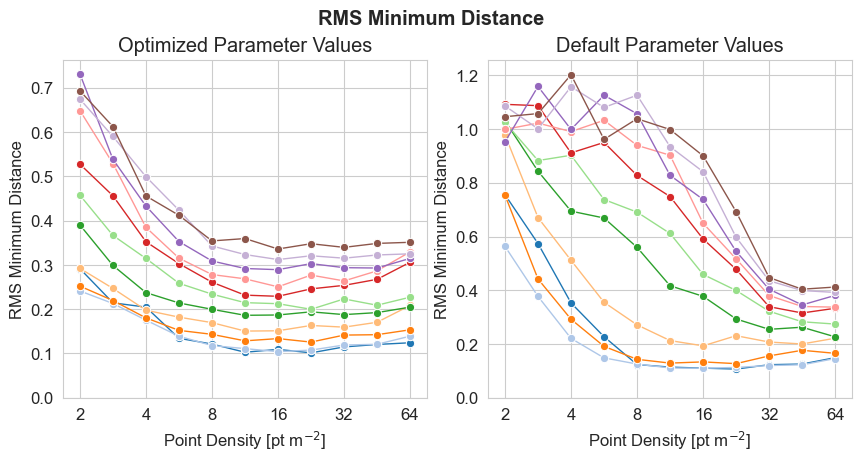

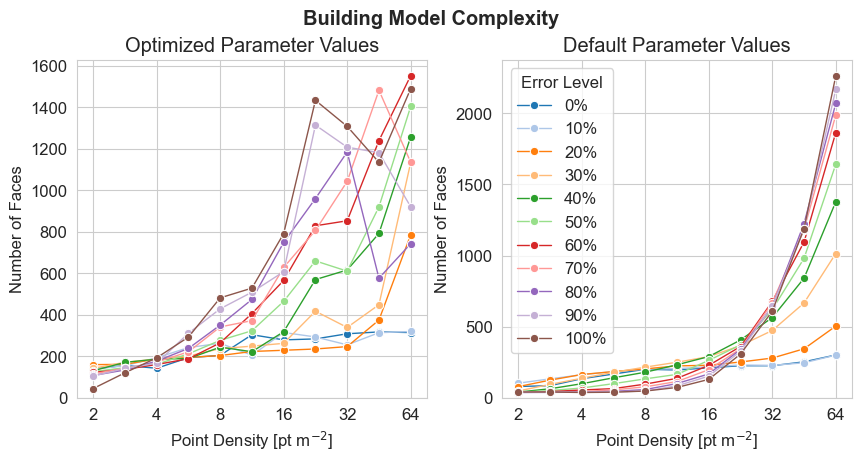

In [91]:
# Two figures with two subplots each

font_size = 12
line_width = 1
plt.rcParams["font.size"] = font_size  # must be set before plt.figure() if using plot_optim_results() within subplots

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(8.5, 4.5), sharey=False, layout="constrained")
fig.suptitle("RMS Minimum Distance", fontweight="bold")

opt_results_table = opt_results_min_faces_within_range["0"]
plot_optim_results(
    opt_results_table,
    "rms_min_dist_22_mean",
    "RMS Minimum Distance",
    "Optimized Parameter Values",
    font_size=font_size,
    log_x=True,
    lower_ylim=0,
    legend=False,
    line_width=line_width,
    ax = axs[0]
)

opt_results_table = opt_results_default_params[~opt_results_default_params["n_faces_22_mean"].isna()]
plot_optim_results(
    opt_results_table,
    "rms_min_dist_22_mean",
    "RMS Minimum Distance",
    "Default Parameter Values",
    font_size=font_size,
    log_x=True,
    lower_ylim=0,
    legend=False,
    line_width=line_width,
    ax = axs[1]
)

fig.savefig("figures/recon_optim_results_rmsmindist.png", dpi=300, bbox_inches="tight")
plt.show()

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(8.5, 4.5), sharey=False, layout="constrained")
fig.suptitle("Building Model Complexity", fontweight="bold")

opt_results_table = opt_results_min_faces_within_range["0"]
plot_optim_results(
    opt_results_table,
    "n_faces_22_mean",
    "Number of Faces",
    "Optimized Parameter Values",
    font_size=font_size,
    log_x=True,
    # log_y=True,
    # ylim=(0, 2400), #1700),
    lower_ylim=0,
    legend=False,
    line_width=line_width,
    ax = axs[0]
)

opt_results_table = opt_results_default_params[~opt_results_default_params["n_faces_22_mean"].isna()]
plot_optim_results(
    opt_results_table,
    "n_faces_22_mean",
    "Number of Faces",
    "Default Parameter Values",
    font_size=font_size,
    log_x=True,
    # log_y=True,
    # ylim=(0, 2400), #1700),
    lower_ylim=0,
    legend=True,
    line_width=line_width,
    ax = axs[1]
)

# axs[1].legend(ncols=2)

plt.savefig("figures/recon_optim_results_complexity.png", dpi=300, bbox_inches="tight")
plt.show()

In [ ]:
# A single figure with 4 subplots

opt_results_table = opt_results_default_params[~opt_results_default_params["n_faces_22_mean"].isna()]

fig, axs = plt.subplots(2, 2, figsize=(14, 14)) #, constrained_layout=True) #, sharex=True, sharey="row")

plot_optim_results(
    opt_results_table,
    "n_faces_22_mean",
    "Number of Faces",
    "Building Model Complexity",
    font_size=12,
    log_x=True,
    ax = axs[1, 1]
)

plot_optim_results(
    opt_results_table,
    "rms_min_dist_22_mean",
    "RMS Minimum Distance",
    "RMS Minimum Distance",
    font_size=12,
    log_x=True,
    ax = axs[0, 1]
)

opt_results_table = opt_results_min_faces_within_range["0"]

plot_optim_results(
    opt_results_table,
    "n_faces_22_mean",
    "Number of Faces",
    "Building Model Complexity",
    font_size=12,
    log_x=True,
    ax = axs[1, 0]
)

plot_optim_results(
    opt_results_table,
    "rms_min_dist_22_mean",
    "RMS Minimum Distance",
    "RMS Minimum Distance",
    font_size=12,
    log_x=True,
    ax = axs[0, 0]
)

plt.show()

### Face number

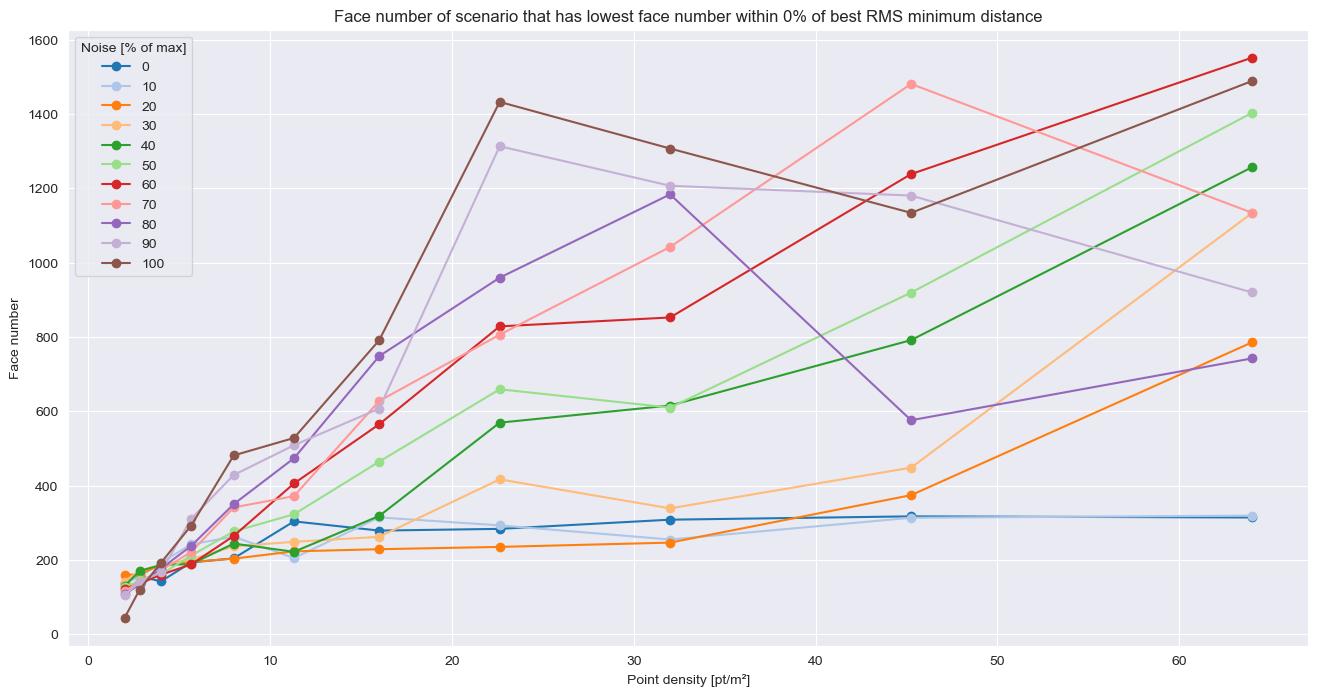

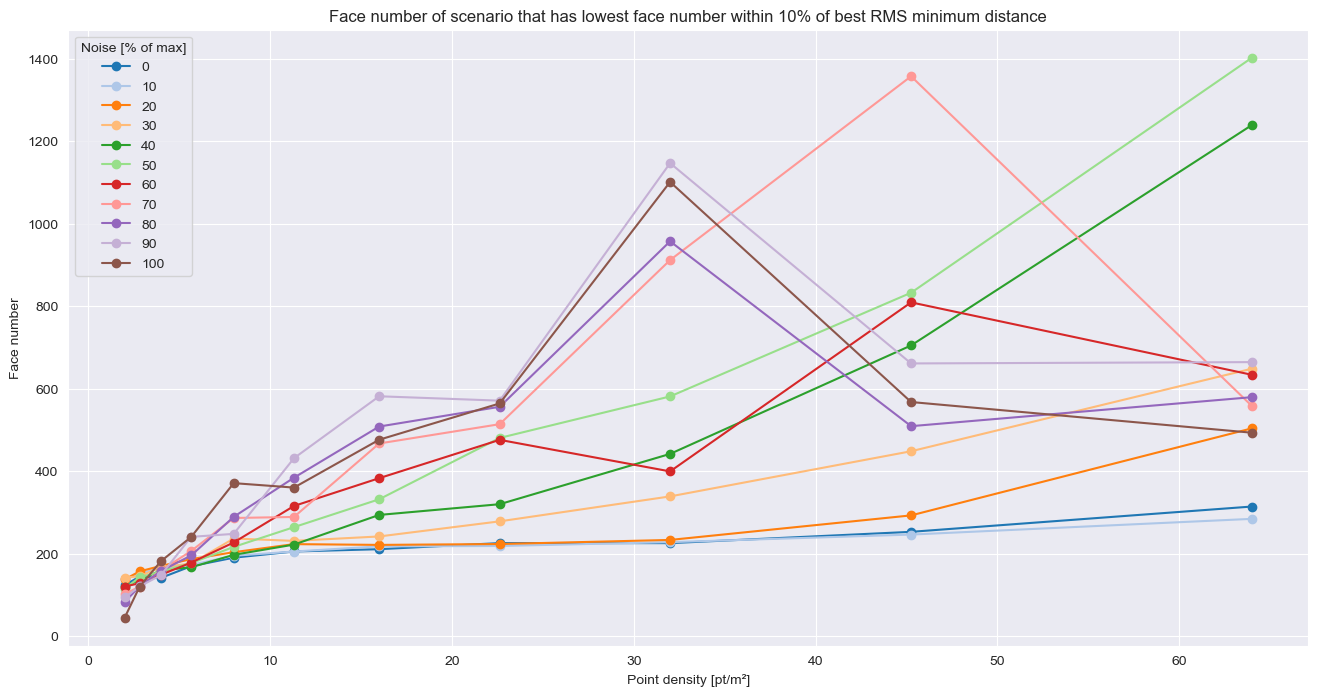

In [9]:
# opt_results_table = opt_results_min_faces_within_range[0]

for within_pct, opt_results_table in {k: v for k, v in opt_results_min_faces_within_range.items() if int(k) in [0, 10]}.items():

    fig, ax = plt.subplots(1, 1, figsize=(16, 8))
    cmap = plt.get_cmap("tab20")
    for i, error_lvl in enumerate(opt_results_table.error_level.unique()):
        df_slice = opt_results_table[(opt_results_table.error_level == error_lvl) & (opt_results_table.target_density < 70)]
        ax.plot(df_slice["target_density"], df_slice["n_faces_22_mean"], label=str(int(error_lvl * 100)), marker="o", color=cmap(i))  # for continuous colormap: color=cmap(i*25)
    plt.legend(title="Noise [% of max]")
    plt.xlabel("Point density [pt/m²]")
    plt.ylabel("Face number")
    plt.title(f"Face number of scenario that has lowest face number within {within_pct}% of best RMS minimum distance")
    # plt.ylabel("Max$_{Optimization}$ ( Mean$_{Buildings}$ ( number of faces ) ) [m]")
    # plt.title("Face number per building:\nMaximum across 50 optimization scenarios of\nmean across 100 buildings")

With Geoflow default params:

Text(0.5, 1.0, 'Face number of scenario using Geoflow default parameters')

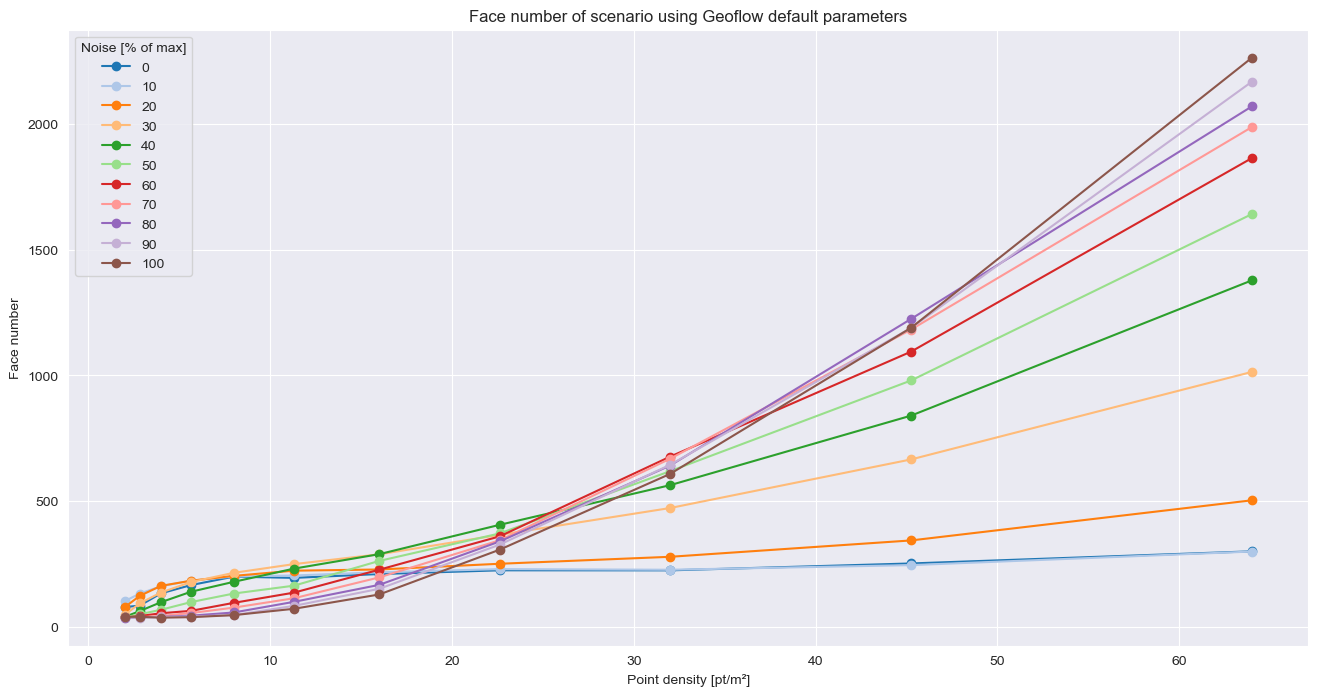

In [10]:
opt_results_table = opt_results_default_params

fig, ax = plt.subplots(1, 1, figsize=(16, 8))
cmap = plt.get_cmap("tab20")
for i, error_lvl in enumerate(opt_results_table.error_level.unique()):
    df_slice = opt_results_table[(opt_results_table.error_level == error_lvl) & (opt_results_table.target_density < 70)]
    ax.plot(df_slice["target_density"], df_slice["n_faces_22_mean"], label=str(int(error_lvl * 100)), marker="o", color=cmap(i))  # for continuous colormap: color=cmap(i*25)
plt.legend(title="Noise [% of max]")
plt.xlabel("Point density [pt/m²]")
plt.ylabel("Face number")
plt.title(f"Face number of scenario using Geoflow default parameters")
# plt.ylabel("Max$_{Optimization}$ ( Mean$_{Buildings}$ ( number of faces ) ) [m]")
# plt.title("Face number per building:\nMaximum across 50 optimization scenarios of\nmean across 100 buildings")

### RMS minimum distance

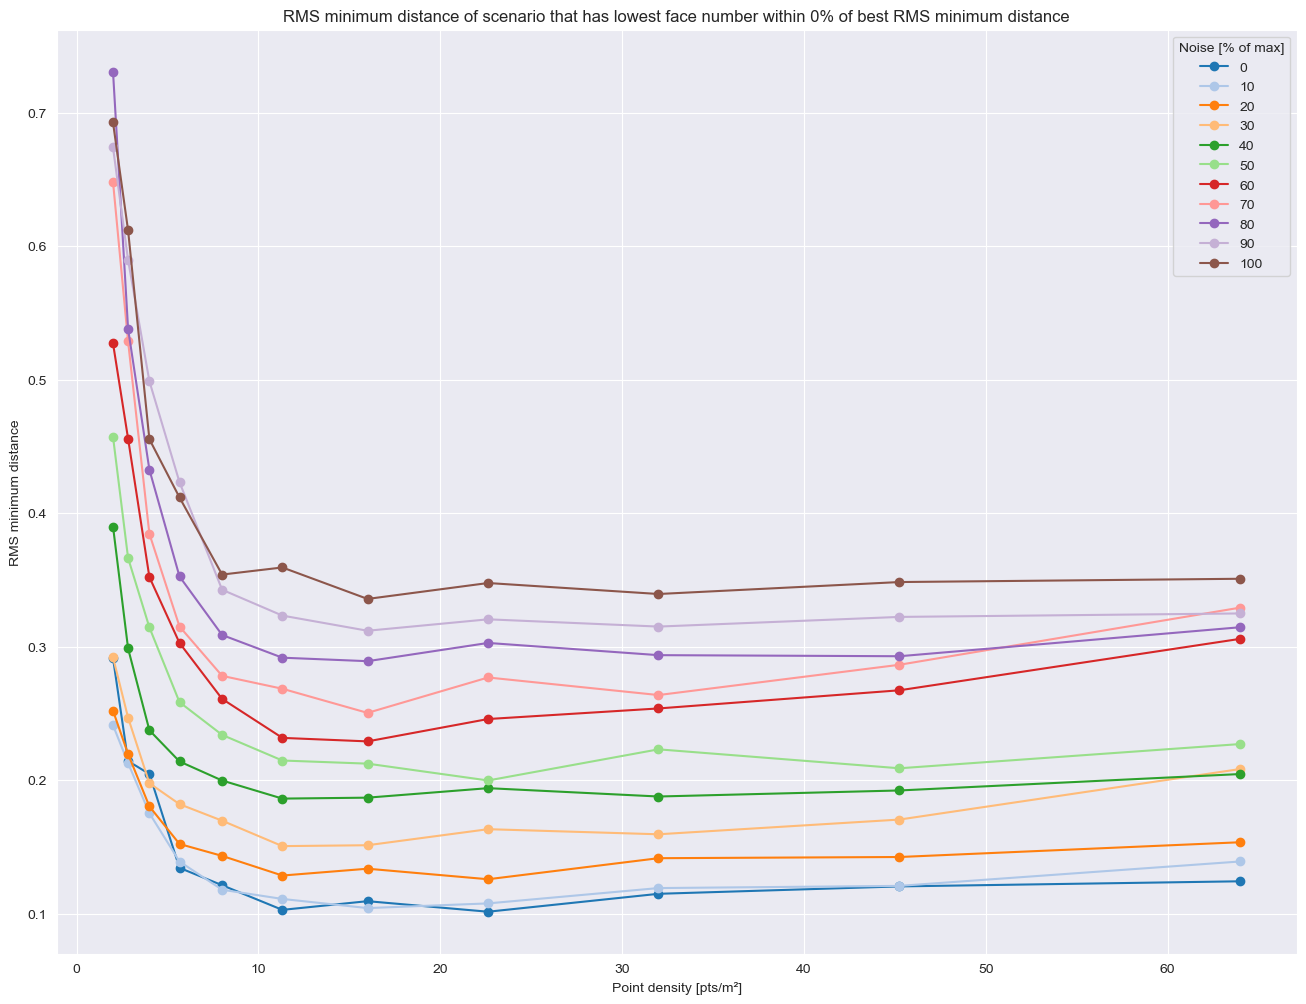

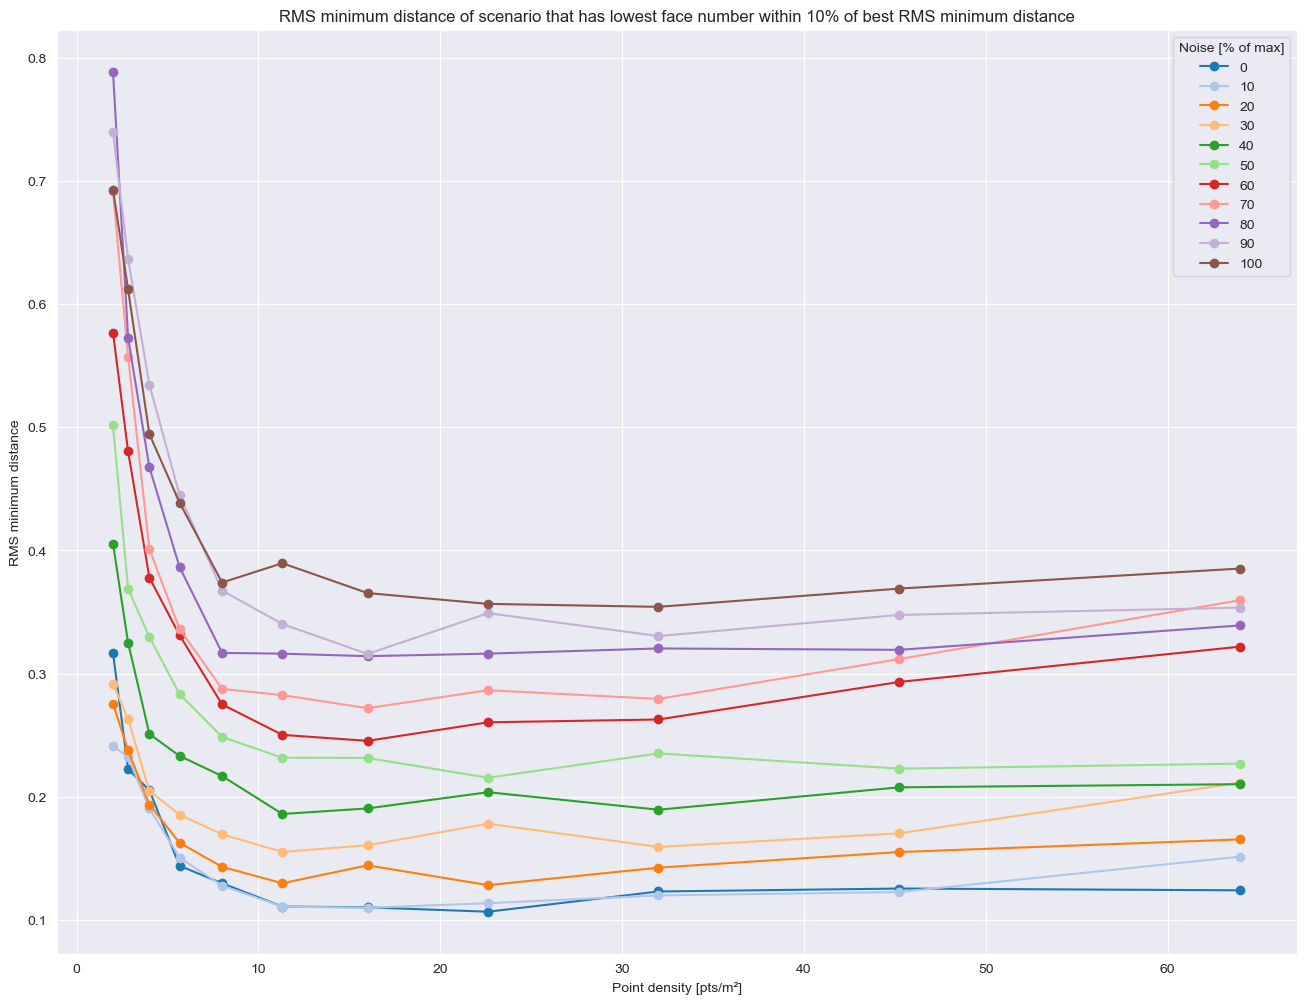

In [11]:
# opt_results_table = opt_results_min_faces_within_range[0]

for within_pct, opt_results_table in {k: v for k, v in opt_results_min_faces_within_range.items() if int(k) in [0, 10]}.items():
    
    fig, ax = plt.subplots(1, 1, figsize=(16, 12))
    cmap = plt.get_cmap("tab20")
    for i, error_lvl in enumerate(opt_results_table.error_level.unique()):
        df_slice = opt_results_table[(opt_results_table.error_level == error_lvl) & (opt_results_table.target_density < 70)]
        ax.plot(df_slice["target_density"], df_slice["rms_min_dist_22_mean"], label=str(int(error_lvl * 100)), marker="o", color=cmap(i))
    plt.legend(title="Noise [% of max]")
    plt.xlabel("Point density [pts/m²]")
    plt.ylabel("RMS minimum distance")
    plt.title(f"RMS minimum distance of scenario that has lowest face number within {(within_pct)}% of best RMS minimum distance")
    # plt.ylabel("Min$_{Optimization}$ ( Mean$_{Buildings}$ ( RMS min distance ) ) [m]")
    # plt.title("RMS minimum distance:\nMinimum across 50 optimization scenarios of\nmean across 100 buildings")

With Geoflow default params:

Text(0.5, 1.0, 'RMS minimum distance of scenario that uses Geoflow default parameter values')

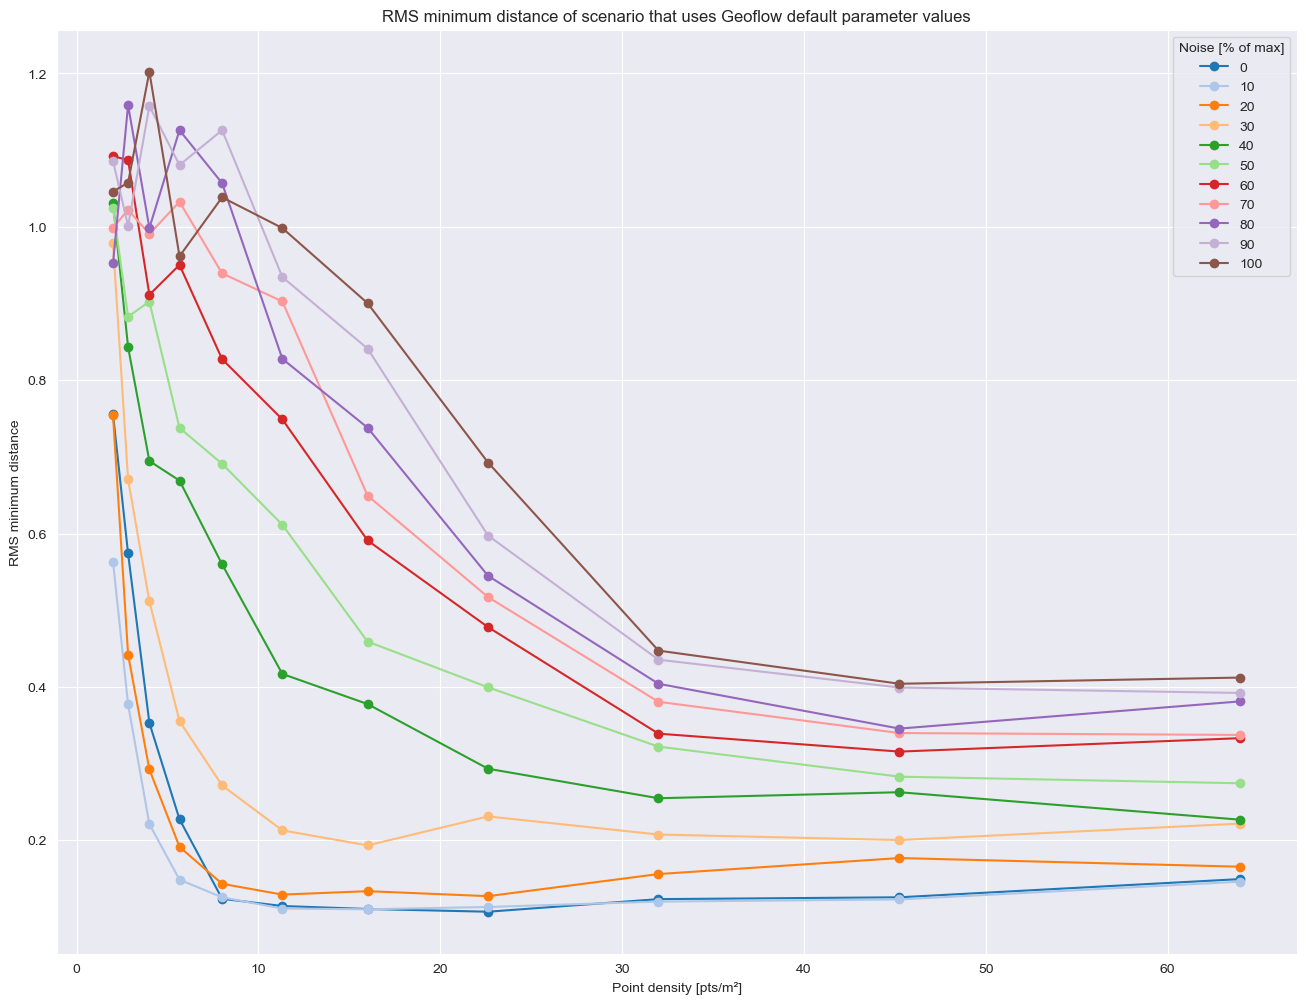

In [12]:
opt_results_table = opt_results_default_params

fig, ax = plt.subplots(1, 1, figsize=(16, 12))
cmap = plt.get_cmap("tab20")
for i, error_lvl in enumerate(opt_results_table.error_level.unique()):
    df_slice = opt_results_table[(opt_results_table.error_level == error_lvl) & (opt_results_table.target_density < 70)]
    ax.plot(df_slice["target_density"], df_slice["rms_min_dist_22_mean"], label=str(int(error_lvl * 100)), marker="o", color=cmap(i))
plt.legend(title="Noise [% of max]")
plt.xlabel("Point density [pts/m²]")
plt.ylabel("RMS minimum distance")
plt.title(f"RMS minimum distance of scenario that uses Geoflow default parameter values")
# plt.ylabel("Min$_{Optimization}$ ( Mean$_{Buildings}$ ( RMS min distance ) ) [m]")
# plt.title("RMS minimum distance:\nMinimum across 50 optimization scenarios of\nmean across 100 buildings")

## Face number distribution

Looking more closely at the distribution of the number of faces, and the scenarios with the least number of faces on average

In [ ]:
s[s.n_faces_22_mean < s.n_faces_22_mean.quantile(q=0.1)].loc[:, relevant_columns]

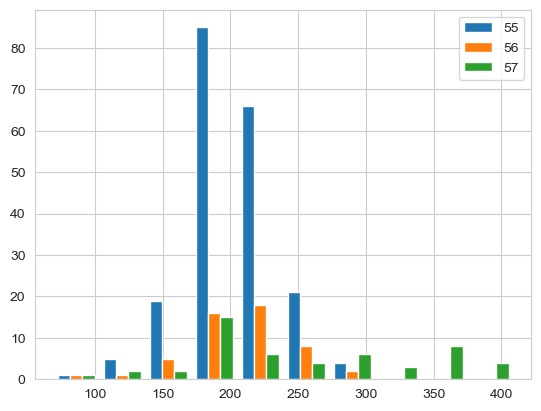

In [20]:
id_first, id_last = 55, 57
scenario_ids = [id_first+i for i in range(0, 1+id_last-id_first)]
plt.hist([s.n_faces_22_mean for s in ss[id_first:(id_last+1)]])
plt.legend(scenario_ids)  # ["55", "56", "58"])
plt.show()

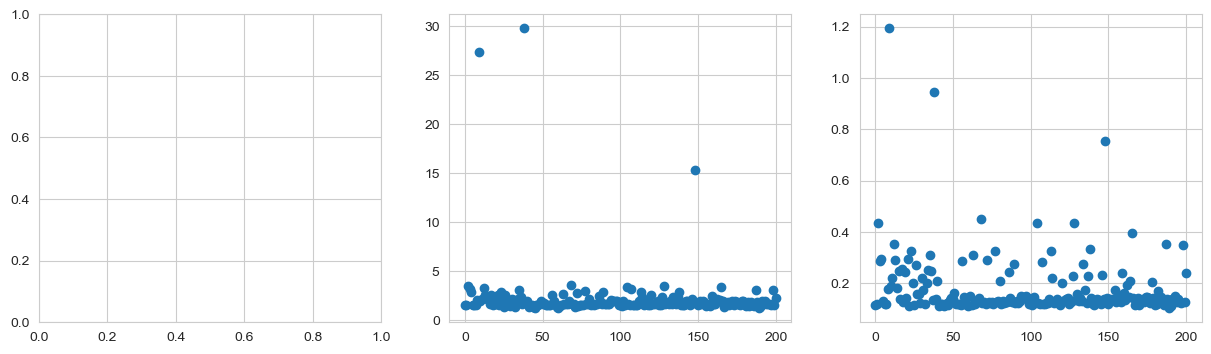

In [21]:
s = ss[55]
fig, ax = plt.subplots(1, 3, figsize=(15, 4))
# ax[0].scatter(range(s.shape[0]), s["iou_22_mean"])
ax[1].scatter(range(s.shape[0]), s["hausdorff_22_rms"])
ax[2].scatter(range(s.shape[0]), s["rms_min_dist_22_mean"])
# plt.legend(["iou_22_mean", "hausdorff_22_rms", "rms_min_dist_22_mean"])
# plt.legend(["hausdorff_22_rms", "rms_min_dist_22_mean"])
# plt.ylim(.2, 0.95)
plt.show()

## Plotting functions

In [99]:
opt_params = [m.split("_", 1)[1] for m in glb.geoflow_optim_parameter_space_narrow.keys()]

def plot_metric_vs_parameter(es: list[Experiment] | Experiment, target_metric: str, xlim=None, ylim=None):
    if isinstance(es, Experiment):
        es = [es]
    stats = [e.summary_stats for e in es]
    nrows, ncols = len(opt_params), len(stats)
    fig, axs = plt.subplots(nrows, ncols, figsize=(6*ncols, 4.5*nrows), sharey="all", layout="constrained")
    
    for i, opt_param in enumerate(opt_params):
        for j, s in enumerate(stats):
            if ncols == 1:
                ax = axs[i]
            else:
                ax = axs[i, j]
            s.plot.scatter(opt_param, target_metric, ax=ax)
            if xlim is not None:
                ax.set_xlim(xlim)
            if ylim is not None:
                ax.set_ylim(ylim)
            if i == 0:
                ax.set_title(es[j].name)
    
    plt.show()

In [100]:
def plot_metric_vs_metric(es: list[Experiment] | Experiment, x, ys):
    if isinstance(es, Experiment):
        es = [es]
    if isinstance(ys, str):
        ys = [ys]
    stats = [e.summary_stats for e in es]
    nrows, ncols = len(ys), len(stats)
    fig, axs = plt.subplots(nrows, ncols, figsize=(6*ncols, 4.5*nrows), sharey="row", sharex="row", layout="constrained")
    
    for i, y in enumerate(ys):
        for j, s in enumerate(stats):
            if ncols == 1:
                ax = axs[i]
            else:
                if nrows == 1:
                    ax = axs[j]
                else:
                    ax = axs[i, j]
            s.plot.scatter(x, y, ax=ax)
            if i == 0:
                ax.set_title(es[j].name)
    
    plt.show()

In [101]:
def plot_metric_vs_metric_2(es: list[Experiment] | Experiment, xs, ys, sharex=None, sharey="row", xlim=None, ylim=None, **kwargs):
    if isinstance(es, Experiment):
        es = [es]
    if isinstance(xs, str):
        xs = [xs]
    if isinstance(ys, str):
        ys = [ys]
    stats = [e.summary_stats for e in es]
    n_dependents = len(ys)
    n_independents = len(xs)
    nrows, ncols = n_independents * n_dependents, len(stats)
    fig, axs = plt.subplots(nrows, ncols, figsize=(6*ncols, 4.5*nrows), sharex=sharex, sharey=sharey, layout="constrained")
    
    for h, x in enumerate(xs):
        for i, y in enumerate(ys):
            for j, s in enumerate(stats):
                if ncols == 1:
                    if nrows == 1:
                        ax = axs
                    else:
                        ax = axs[(h * n_dependents) + i]
                else:
                    if nrows == 1:
                        ax = axs[j]
                    else:
                        ax = axs[(h * n_dependents) + i, j]
                s.plot.scatter(x, y, ax=ax, **kwargs)
                if xlim is not None:
                    ax.set_xlim(xlim)
                if ylim is not None:
                    ax.set_ylim(ylim)
                if (h + i) == 0:
                    ax.set_title(es[j].name)
                # if (i + 1) == len(ys):
                #     ax.tick_params(axis="both", reset=True)
        
    plt.show()

## Reconstruction Parameters as Optimized

### Scatter plot

With connected dots.

In [ ]:
opt_results_table = opt_results_min_faces_within_range["0"]

for param_name in [s.split("_", 1)[1] for s in glb.geoflow_optim_parameter_space_narrow.keys()]:

    fig, ax = plt.subplots(1, 1, figsize=(16, 8))
    cmap = plt.get_cmap("viridis")
    for i, error_lvl in enumerate(opt_results_table.error_level.unique()):
        df_slice = opt_results_table[(opt_results_table.error_level == error_lvl) & (opt_results_table.target_density < 70)]
        ax.plot(df_slice["target_density"], df_slice[param_name], label=str(int(error_lvl * 100)), marker="o", color=cmap(i * 25), )
        # offset = width * multiplier
        # multiplier += 1
        # rects = ax.bar(x + offset, df_slice[param_name], width, label=str(int(error_lvl * 100)), color=cmap(i * 25), )
        # ax.bar_label(rects, padding=3)
        ax.set_xscale("log")
        ax.set_xticks([2**i for i in range(1, 7)])
        ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    
    # ax.set_xticks(x + width, df_slice["target_density"].astype(str))
    
    plt.legend(title="Noise [% of max]")
    plt.xlabel("Point density [pts/m²]")
    plt.ylabel(param_name)
    plt.title(param_name)
    # plt.ylabel("Max$_{Optimization}$ ( Mean$_{Buildings}$ ( number of faces ) ) [m]")
    # plt.title("Face number per building:\nMaximum across 50 optimization scenarios of\nmean across 100 buildings")

### Bar plots

With error-level bars grouped by point density.

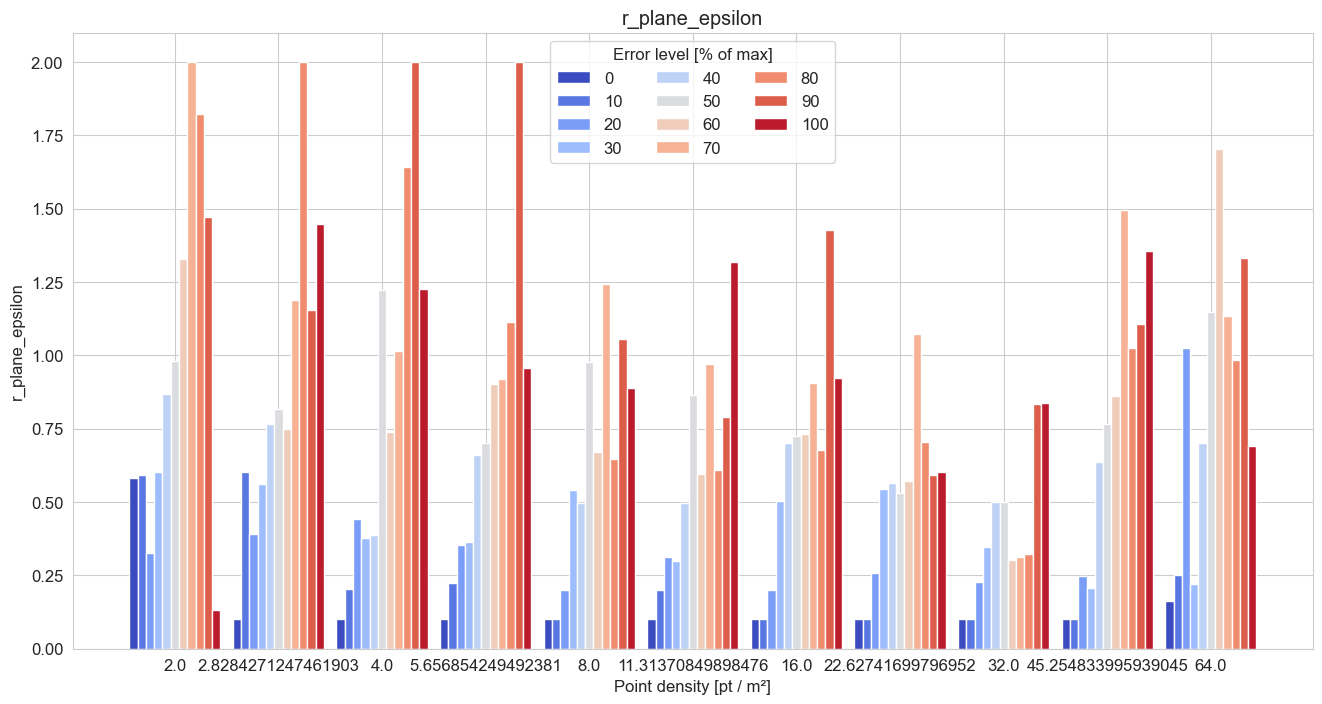

In [102]:
opt_results_table = opt_results_min_faces_within_range["0"]

# for k, opt_results_table in enumerate(opt_results_min_faces_within_range[0:1]):

for param_name in [s.split("_", 1)[1] for s in glb.geoflow_optim_parameter_space_narrow.keys()][:1]:

    fig, ax = plt.subplots(1, 1, figsize=(16, 8))
    cmap = plt.get_cmap("coolwarm")
    
    x = np.arange(len(df_slice["target_density"].unique()))  # the label locations
    width = 0.08  # the width of the bars
    multiplier = 0

    for i, error_lvl in enumerate(opt_results_table.error_level.unique()):
        df_slice = opt_results_table[(opt_results_table.error_level == error_lvl) & (opt_results_table.target_density < 70)]
        
        offset = width * multiplier
        multiplier += 1
        rects = ax.bar(x + offset - 0.2*8/5, df_slice[param_name], width, label=str(int(error_lvl * 100)), color=cmap(i*25))
        # ax.bar_label(rects, padding=3)
    
    ax.set_xticks(x + width, df_slice["target_density"].astype(str))
    
    plt.legend(title="Error level [% of max]", ncols=3)
    plt.xlabel("Point density [pt / m²]")
    plt.ylabel(param_name)
    plt.title(param_name)
    # plt.ylabel("Max$_{Optimization}$ ( Mean$_{Buildings}$ ( number of faces ) ) [m]")
    # plt.title("Face number per building:\nMaximum across 50 optimization scenarios of\nmean across 100 buildings")

### Heatmap

In [289]:
data = opt_results_table.pivot(columns="target_density", index="error_level", values="r_plane_epsilon").sort_index(ascending=False)

# annot = data
annot = np.round(data, 2)
annot = annot.map('{:2g}'.format)
# annot = annot.map(lambda x: x.lstrip('0'))

display(data)
display(annot)

target_density  2.000000   2.828427   4.000000   5.656854   8.000000   \
error_level                                                             
1.0              0.131649   1.447508   1.224425   0.958029   0.889504   
0.9              1.470281   1.155185   2.000000   2.000000   1.056873   
0.8              1.823339   2.000000   1.640458   1.112117   0.647785   
0.7              2.000000   1.189244   1.013481   0.919802   1.243847   
0.6              1.329934   0.749966   0.740139   0.900884   0.669560   
0.5              0.980535   0.816457   1.223012   0.702314   0.977713   
0.4              0.868233   0.765076   0.387694   0.661838   0.498212   
0.3              0.601503   0.560694   0.376717   0.365017   0.539153   
0.2              0.325942   0.392498   0.442353   0.353875   0.200000   
0.1              0.592631   0.602914   0.201677   0.222789   0.100000   
0.0              0.580951   0.100000   0.100000   0.100000   0.100000   

target_density  11.313708  16.000000  22.627417  32.000000  45.254834  \
error_level                                                             
1.0              1.318852   0.921525   0.603124   0.836305   1.354836   
0.9              0.790871   1.426710   0.591400   0.834864   1.107259   
0.8              0.608688   0.676969   0.706004   0.322762   1.026396   
0.7              0.969914   0.907111   1.073951   0.312659   1.496550   
0.6              0.594414   0.732396   0.571014   0.301870   0.862382   
0.5              0.864860   0.725836   0.529257   0.500338   0.764318   
0.4              0.495656   0.702436   0.566246   0.501237   0.635898   
0.3              0.297990   0.502986   0.543684   0.347455   0.207333   
0.2              0.313501   0.200000   0.256827   0.225527   0.247721   
0.1              0.200000   0.100000   0.100000   0.100000   0.100000   
0.0              0.100000   0.100000   0.100000   0.100000   0.100000   

target_density  64.000000  
error_level                
1.0              0.690088  
0.9              1.332219  
0.8              0.984084  
0.7              1.133674  
0.6              1.703370  
0.5              1.146247  
0.4              0.702058  
0.3              0.219588  
0.2              1.024315  
0.1              0.250456  
0.0              0.163984

target_density 2.000000  2.828427  4.000000  5.656854  8.000000  11.313708  \
error_level                                                                  
1.0                 0.13      1.45      1.22      0.96      0.89      1.32   
0.9                 1.47      1.16         2         2      1.06      0.79   
0.8                 1.82         2      1.64      1.11      0.65      0.61   
0.7                    2      1.19      1.01      0.92      1.24      0.97   
0.6                 1.33      0.75      0.74       0.9      0.67      0.59   
0.5                 0.98      0.82      1.22       0.7      0.98      0.86   
0.4                 0.87      0.77      0.39      0.66       0.5       0.5   
0.3                  0.6      0.56      0.38      0.37      0.54       0.3   
0.2                 0.33      0.39      0.44      0.35       0.2      0.31   
0.1                 0.59       0.6       0.2      0.22       0.1       0.2   
0.0                 0.58       0.1       0.1       0.1       0.1       0.1   

target_density 16.000000 22.627417 32.000000 45.254834 64.000000  
error_level                                                       
1.0                 0.92       0.6      0.84      1.35      0.69  
0.9                 1.43      0.59      0.83      1.11      1.33  
0.8                 0.68      0.71      0.32      1.03      0.98  
0.7                 0.91      1.07      0.31       1.5      1.13  
0.6                 0.73      0.57       0.3      0.86       1.7  
0.5                 0.73      0.53       0.5      0.76      1.15  
0.4                  0.7      0.57       0.5      0.64       0.7  
0.3                  0.5      0.54      0.35      0.21      0.22  
0.2                  0.2      0.26      0.23      0.25      1.02  
0.1                  0.1       0.1       0.1       0.1      0.25  
0.0                  0.1       0.1       0.1       0.1      0.16

In [352]:
plt.rcParams["font.size"] = 13

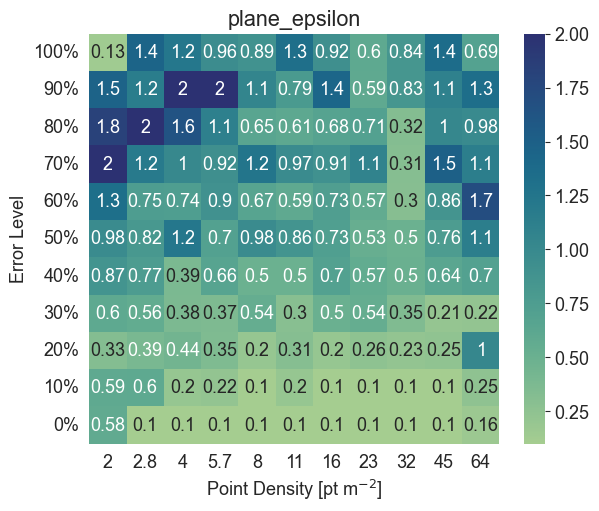

In [353]:
opt_results_table = opt_results_min_faces_within_range["0"]

annot_2_decimal_places = False
annot_drop_leading_zero = False

for param_name in [s.split("_", 1)[1] for s in glb.geoflow_optim_parameter_space_narrow.keys()][:1]:
    data = opt_results_table.pivot(columns="target_density", index="error_level", values=param_name).sort_index(ascending=False)
    if annot_2_decimal_places:
        annot = np.round(data, 2)
        annot = annot.map('{:.3g}'.format)
        if annot_drop_leading_zero:
            annot = annot.map(lambda x: x.lstrip('0'))
    else:
        annot = True
    
    fig, ax = plt.subplots(layout="constrained", figsize=(6, 5))
    sns.heatmap(
        data,
        ax=ax,
        annot=annot,
        fmt="" if isinstance(annot, pd.DataFrame) else ".2g",
        square=True,
        xticklabels=[f"{v:.2g}" for v in [2**(i/2) for i in range(2, 13)]],
        yticklabels=[f"{int(10*(10-v))}%" for v in range(0, 11)],
        cmap="crest"
    )
    plt.yticks(rotation=0)
    plt.xlabel("Point Density [pt m$^{-2}$]")
    plt.ylabel("Error Level")
    plt.title(glb.gf_param_names_thesis[param_name])
    # plt.tight_layout()
    plt.show()
    

In [ ]:
# must be applied to achieve same appearance as in thesis
# however, do not apply any context (as is done in set_theme() or set_context())
sns.set_style("white")

nrows = 3
ncols = 3

min_face_num_within_pct_range = "10"  # 0, 5, 10, 15, or 20, as string

cmap="crest"
annot_2_decimal_places = False
annot_drop_leading_zero = False
sharey=False
bold_plot_titles = False

size_multiplier = 1.5
col_width = 6 * size_multiplier
row_height = 5 * size_multiplier
fontsize_suplabel = 20 * size_multiplier
fontsize_axtitle = 18 * size_multiplier
plt.rcParams["font.size"] = 12 * size_multiplier  # default is 10

# end of settings

opt_results_table = opt_results_min_faces_within_range[min_face_num_within_pct_range]
bold_plot_titles = "bold" if bold_plot_titles else "normal"

density_levels_one_decimal_place = [floor(2**(i/2)*10 + 0.5)/10 for i in range(2, 13)]
xticklabels = [f"{v:.3g}" for v in density_levels_one_decimal_place]
yticklabels = [f"{int(10 * (10 - v))}%" for v in range(0, 11)]

# figsize=(12,20) works well with 2 columns and 4 rows
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*col_width, nrows*row_height), layout="constrained", sharey=sharey)  #, sharex=True, sharey=True)

for a, param_name in enumerate([s.split("_", 1)[1] for s in glb.geoflow_optim_parameter_space_narrow.keys()]):
    data = opt_results_table.pivot(columns="target_density", index="error_level", values=param_name).sort_index(ascending=False)
    if annot_2_decimal_places:
        annot = np.round(data, 2)
        annot = annot.map('{:.3g}'.format)
        if annot_drop_leading_zero:
            annot = annot.map(lambda x: x.lstrip('0'))
    else:
        annot = True
    
    ax = axs[int((a - a%ncols) / ncols), a%ncols]

    sns.heatmap(
        data,
        ax=ax,
        annot=annot,
        fmt="" if isinstance(annot, pd.DataFrame) else ".2g",
        square=True,
        xticklabels=xticklabels,
        yticklabels=yticklabels,
        cmap=cmap
    )
    ax.tick_params(axis="y", rotation=0)
    ax.set_xlabel(None) #"Point Density [pt m$^{-2}$]")
    ax.set_ylabel(None) #"Error Level")
    ax.set_title(glb.gf_param_names_thesis[param_name], fontdict={"fontsize": fontsize_axtitle, "fontweight": bold_plot_titles})
    
    # Keep axis ticks only on the leftmost and bottom-most subplots (for a 3x3 grid)
    # if a not in [4, 5, 6]:
    #     ax.get_xaxis().set_ticks([])
    # if a not in [0, 3, 6]:
    #     ax.get_yaxis().set_ticks([])

for i in range(7, nrows*ncols):
    axs.flat[i].set_axis_off()
# axs[3, 1].set_axis_off()

# plt.tight_layout()
# plt.yticks(rotation=0)
# fig.suptitle("Optimized Reconstruction Parameters for all Scenarios")
# fig.subplots_adjust(hspace=0.3)
# fig.get_layout_engine().set(
#     w_pad=4 / 72,
#     h_pad=4 / 72,
#     hspace=0.05,
#     wspace=0.05
# )
fig.supxlabel("Point Density [pt m$^{-2}$]", fontsize=fontsize_suplabel, fontweight="bold")
fig.supylabel("Error Level", fontsize=fontsize_suplabel, fontweight="bold")

plt.savefig(f"figures/heatmaps_optimized_parameters_best{min_face_num_within_pct_range}pct_{ncols}x{nrows}_{cmap}_size{size_multiplier}{'_2dp' * annot_2_decimal_places}{'_sharey' * sharey}.png")

plt.show()

In [ ]:
opt_results_table = opt_results_min_faces_within_range["0"]

nrows = 4
ncols = 2

density_levels_one_decimal_place = [floor(2**(i/2)*10 + 0.5)/10 for i in range(2, 13)]
xticklabels = [f"{v:.3g}" for v in density_levels_one_decimal_place]
yticklabels = [f"{int(10 * (10 - v))}%" for v in range(0, 11)]

# figsize=(12,20) works well with 2 columns and 4 rows
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*6, nrows*5), layout="constrained")  #, sharex=True, sharey=True)

for a, param_name in enumerate([s.split("_", 1)[1] for s in glb.geoflow_optim_parameter_space_narrow.keys()]):
    data = opt_results_table.pivot(columns="target_density", index="error_level", values=param_name).sort_index(ascending=False)
    
    ax = axs[int((a - a%ncols) / ncols), a%ncols]

    sns.heatmap(
        data,
        ax=ax,
        annot=True,
        square=True,
        xticklabels=xticklabels,
        yticklabels=yticklabels
    )
    ax.tick_params(axis="y", rotation=0)
    ax.set_xlabel(None) #"Point Density [pt m$^{-2}$]")
    ax.set_ylabel(None) #"Error Level")
    ax.set_title(glb.gf_param_names_thesis[param_name])

for i in range(7, nrows*ncols):
    axs.flat[i].set_axis_off()
# axs[3, 1].set_axis_off()

# plt.tight_layout()
# plt.yticks(rotation=0)
# fig.suptitle("Optimized Reconstruction Parameters for all Scenarios")
# fig.subplots_adjust(hspace=0.3)
fig.get_layout_engine().set(
    # w_pad=4 / 72,
    h_pad=8 / 72,
    # hspace=0,
    # wspace=0
)
fig.supxlabel("Point Density [pt m$^{-2}$]")
fig.supylabel("Error Level")
plt.savefig("figures/heatmaps_optimized_parameters_hpad.png")
plt.show()

## RMS min dist vs. recon params

In [ ]:
plot_metric_vs_metric_2(eos[55:57], opt_params, "rms_min_dist_22_mean")

In [ ]:
plot_metric_vs_parameter([eos[i*11] for i in range(0, 4)], "rms_min_dist_22_mean", ylim=(0,1))

In [ ]:
plot_metric_vs_parameter([eos[i*11] for i in range(4, 8)], "rms_min_dist_22_mean", ylim=(0,1))

In [ ]:
plot_metric_vs_parameter([eos[i*11] for i in range(8, 11)], "rms_min_dist_22_mean", ylim=(0,1))

## Face number vs. RMS min dist

### Seaborn

#### Individual Scenarios

In [153]:
s = ss[55]
s["pareto"] = is_pareto_optimal_min(s[["rms_min_dist_22_mean", "n_faces_22_mean"]])
s = s.sort_values(by="pareto", ascending=True)

In [162]:
s["pareto_or_best"] = s["pareto"].astype(int)
s.loc[s["rms_min_dist_22_mean"].idxmin(), "pareto_or_best"] = 2
s.loc[s[s.rms_min_dist_22_mean <= 1.1 * s.rms_min_dist_22_mean.min()].n_faces_22_mean.idxmin(), "pareto_or_best"] = 3
s = s.sort_values(by="pareto_or_best", ascending=True)
s.pareto_or_best = s.pareto_or_best.apply(lambda x: {0: "_Other", 1: "Pareto Front", 2: "Best", 3: "Selected"}[x])

In [170]:
color_indices = [9, 0, 3, 1]
colors = [sns.color_palette("deep")[i] for i in color_indices]

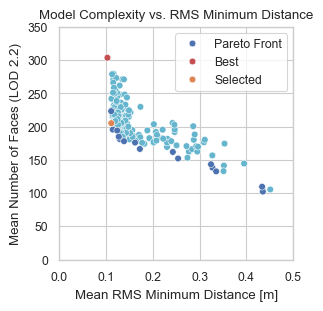

In [171]:
sns.set_theme(style="whitegrid", context="paper")
fig, ax = plt.subplots(1, 1, figsize=(3, 3), layout="constrained")
ax = sns.scatterplot(ax=ax, data=s, x="rms_min_dist_22_mean", y="n_faces_22_mean", hue="pareto_or_best", palette=colors)
ax.set_xlim(0, 0.5)
ax.set_ylim(0, 350)
ax.set_xlabel("Mean RMS Minimum Distance [m]")
ax.set_ylabel("Mean Number of Faces (LOD 2.2)")
ax.set_title("Model Complexity vs. RMS Minimum Distance")
ax.legend(title="")
plt.savefig("figures/pareto_parameter_selection_v2.png", dpi=300, bbox_inches="tight")
plt.show()

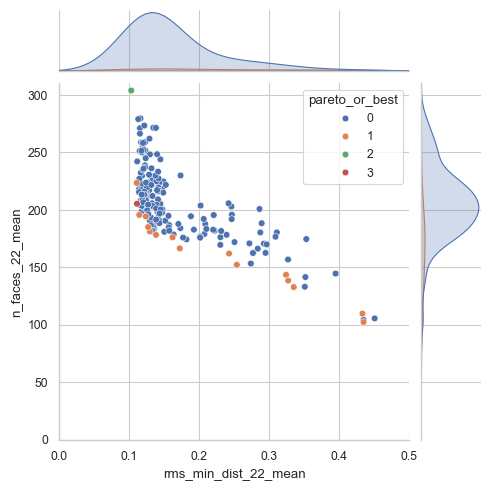

In [67]:
sns.set_theme(style="whitegrid", context="paper")
g = sns.jointplot(data=s, x="rms_min_dist_22_mean", y="n_faces_22_mean", hue="pareto_or_best", xlim=(0, 0.5), ylim=(0, 310), height=5, palette="deep")


#### All Scenarios

In [ ]:
density_levels_one_decimal_place = [floor(2**(i/2)*10 + 0.5)/10 for i in range(2, 13)]
xticklabels = [f"{v:.3g}" for v in density_levels_one_decimal_place]

In [120]:
ss_all = pd.concat([s for s in ss])
ss_all["Point Density"] = ss_all["target_density"].apply(lambda x: f"{x:.1f}")
ss_all["Error Level"] = (ss_all["error_level"] * 100).astype(int).astype(str) + "%"

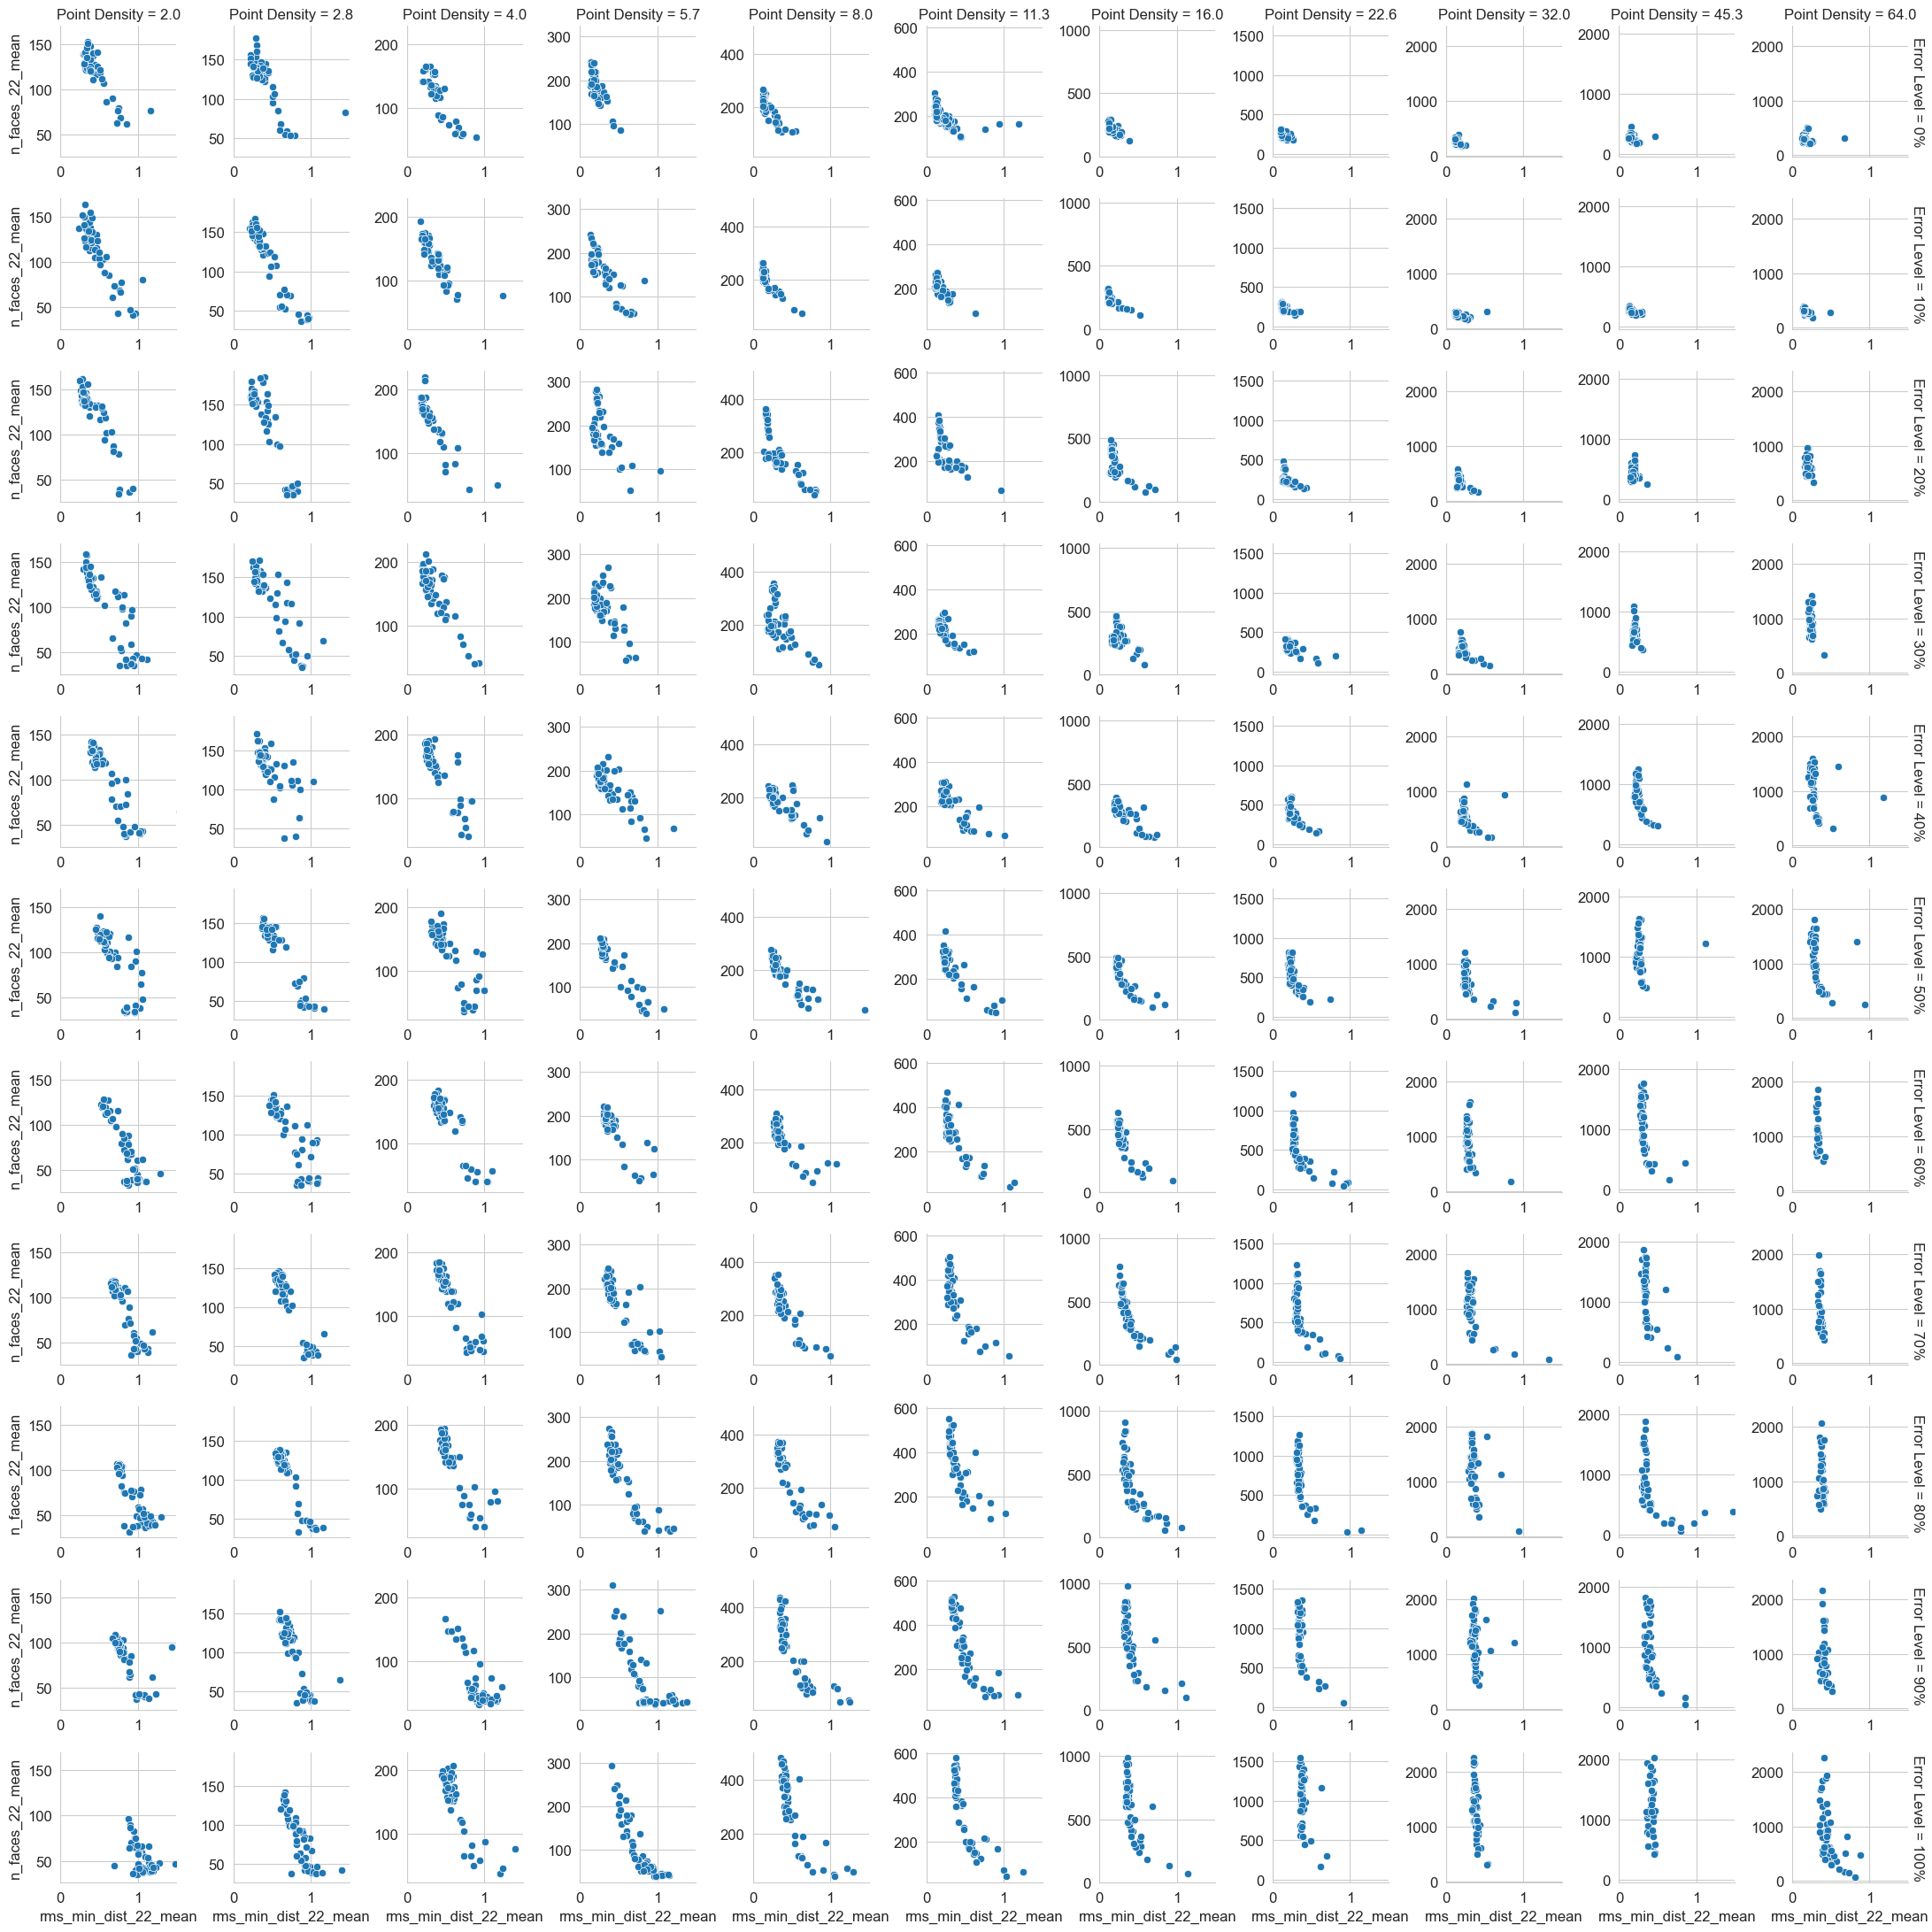

In [125]:
g = sns.FacetGrid(ss_all, row="Error Level", col="Point Density", margin_titles=True, sharey="col", sharex="row", xlim=(0, 1.5), height=2)
g.map(sns.scatterplot, "rms_min_dist_22_mean", "n_faces_22_mean")
# for (row_val, col_val), ax in g.axes_dict.items():
#     ymin, ymax = ax.get_ylim()
#     ax.set_ylim((0, ymax))

### Individual / few scenarios

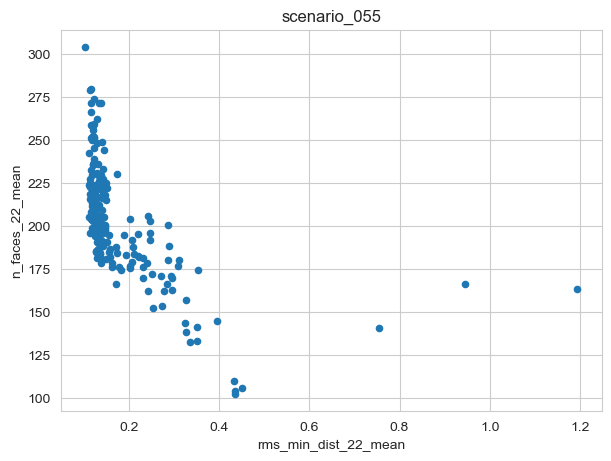

In [23]:
plot_metric_vs_metric_2(eos[55:56], "rms_min_dist_22_mean", "n_faces_22_mean", sharex="row")

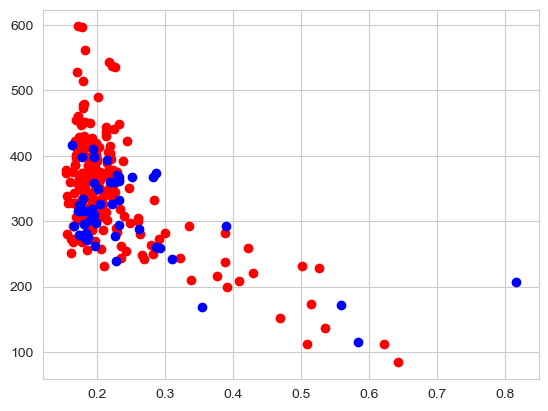

In [79]:
plt.scatter(ss80["rms_min_dist_22_mean"], ss80["n_faces_22_mean"], c = "red")
plt.scatter(ss[80]["rms_min_dist_22_mean"], ss[80]["n_faces_22_mean"], c = "blue")
plt.show()

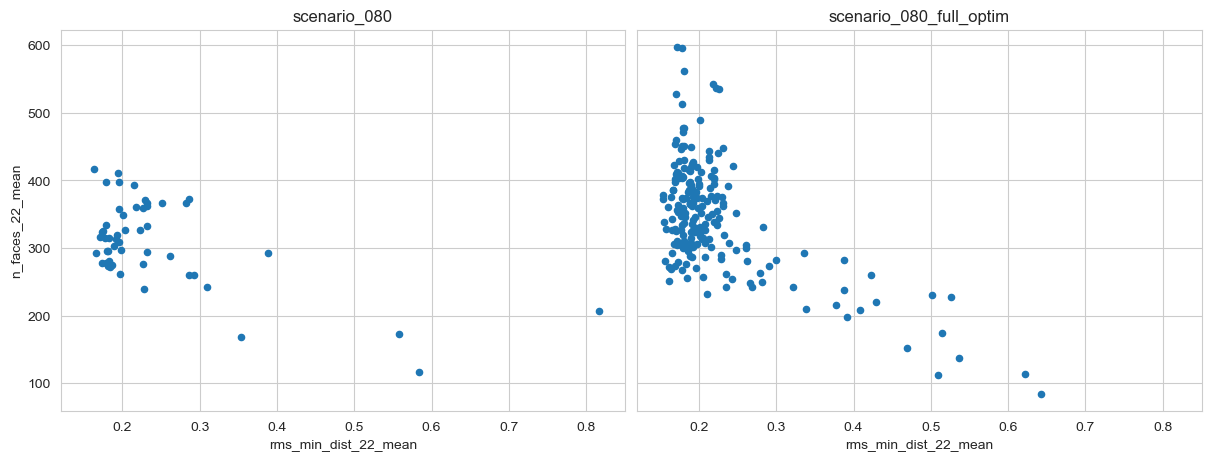

In [69]:
plot_metric_vs_metric_2([eos[80], eo80], "rms_min_dist_22_mean", "n_faces_22_mean", sharex="row")

### All scenarios

In [10]:
# Create a column that indicates the scenarios that are not worse by more than a certain amount than the best target metric value
for i in range(len(ss)):
    # ss[i]["best_pct"] = (ss[i]["rms_min_dist_22_mean"] <= 1.10 * ss[i]["rms_min_dist_22_mean"].min()).astype(int)
    ss[i]["best_pct"] = 0
    ss[i].loc[ss[i]["rms_min_dist_22_mean"] <= 1.20 * ss[i]["rms_min_dist_22_mean"].min(), "best_pct"] = 1
    ss[i].loc[ss[i]["rms_min_dist_22_mean"] <= 1.15 * ss[i]["rms_min_dist_22_mean"].min(), "best_pct"] = 2
    ss[i].loc[ss[i]["rms_min_dist_22_mean"] <= 1.10 * ss[i]["rms_min_dist_22_mean"].min(), "best_pct"] = 3
    # ss[i].loc[ss[i]["rms_min_dist_22_mean"] <= 1.05 * ss[i]["rms_min_dist_22_mean"].min(), "best_pct"] = 4

In [ ]:
for i in range(len(ss)):
    ss[i]["best_pct_or_best"] = ss[i]["best_pct"]
    ss[i].loc[ss[i]["is_best"] == 1, "best_pct_or_best"] = 2

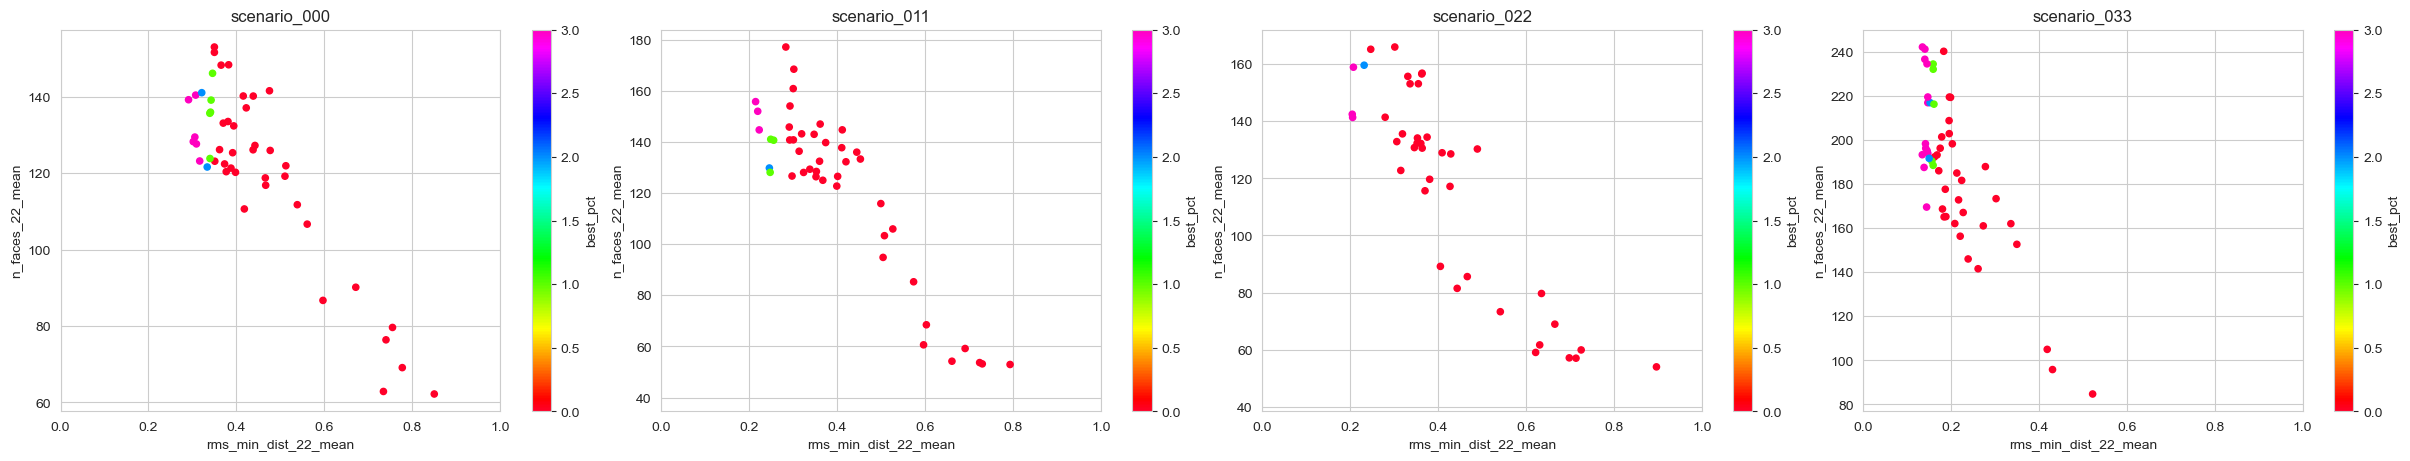

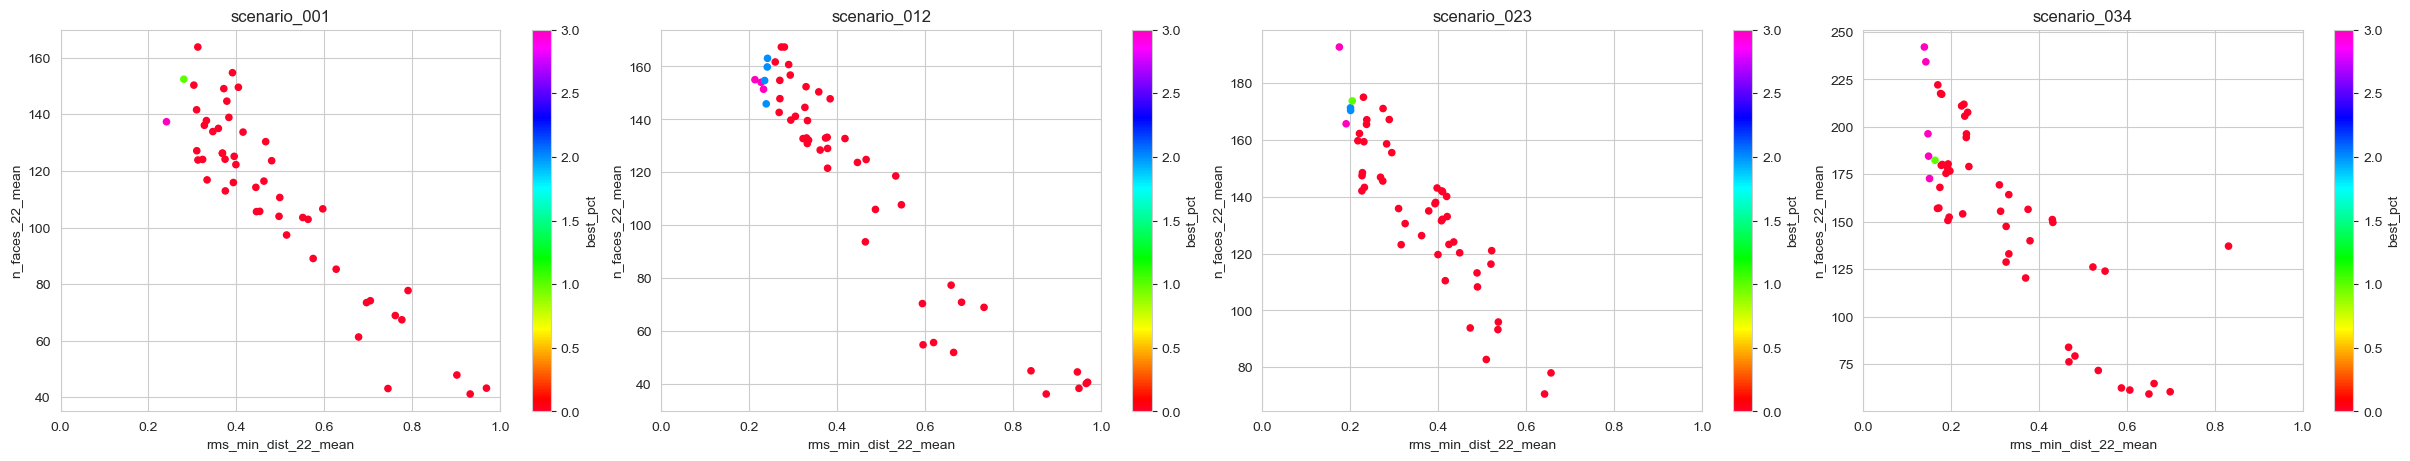

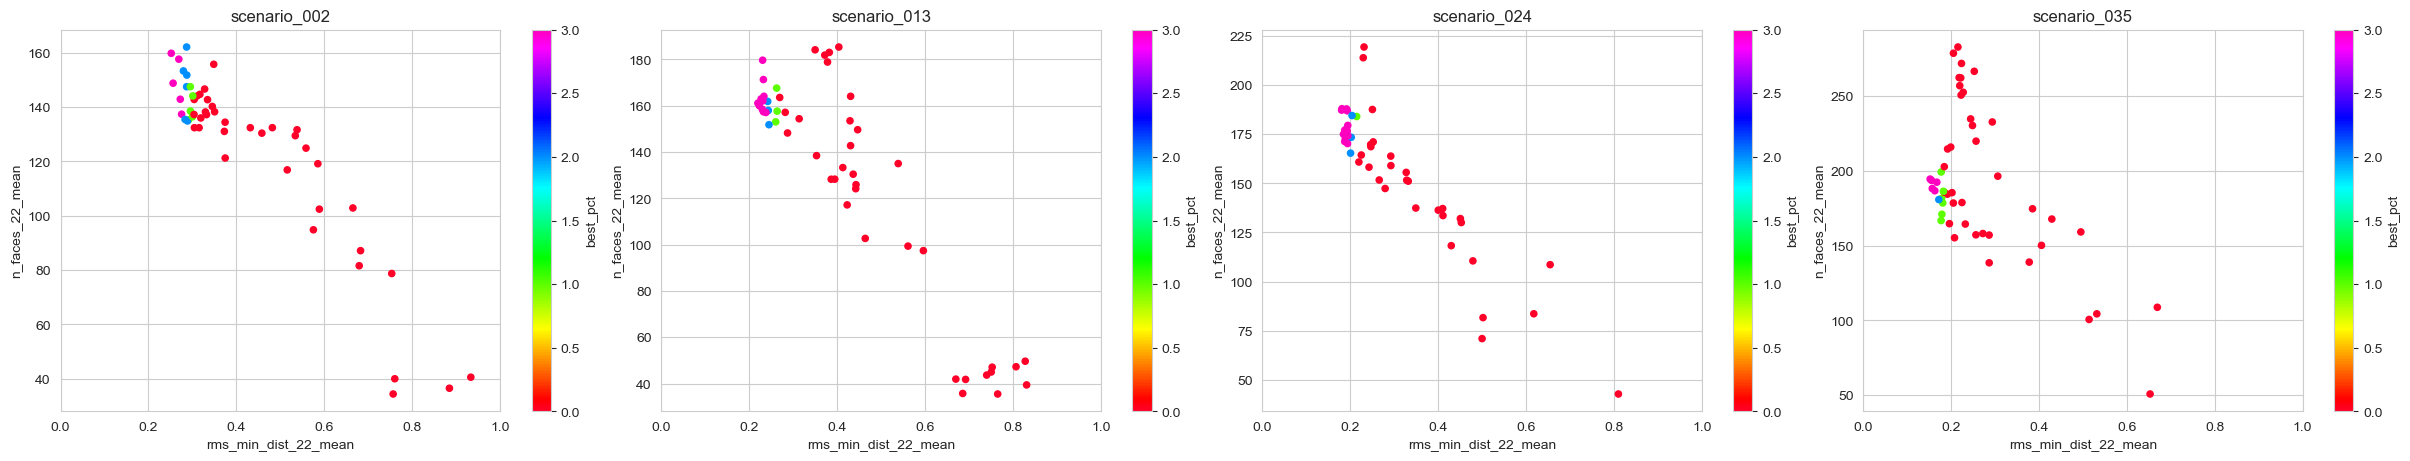

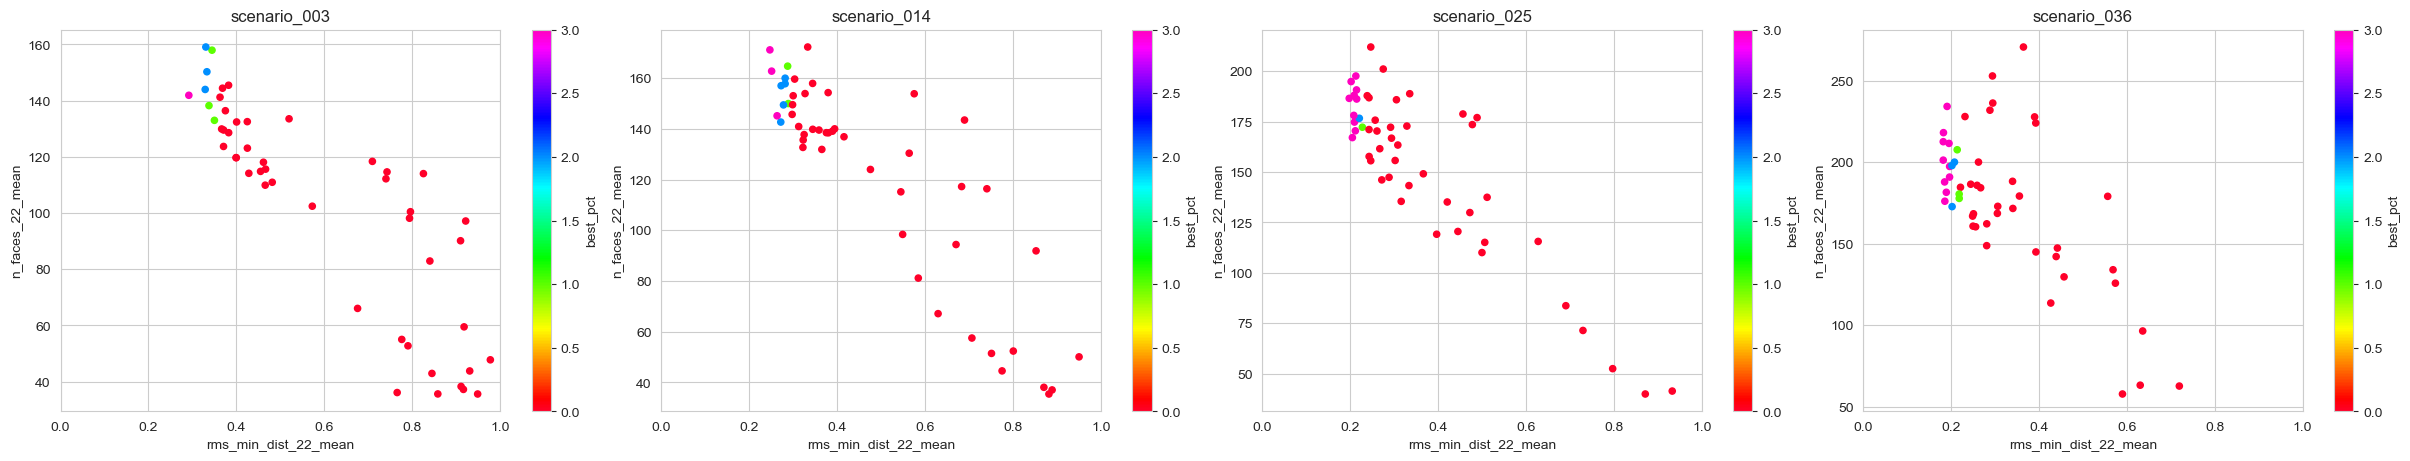

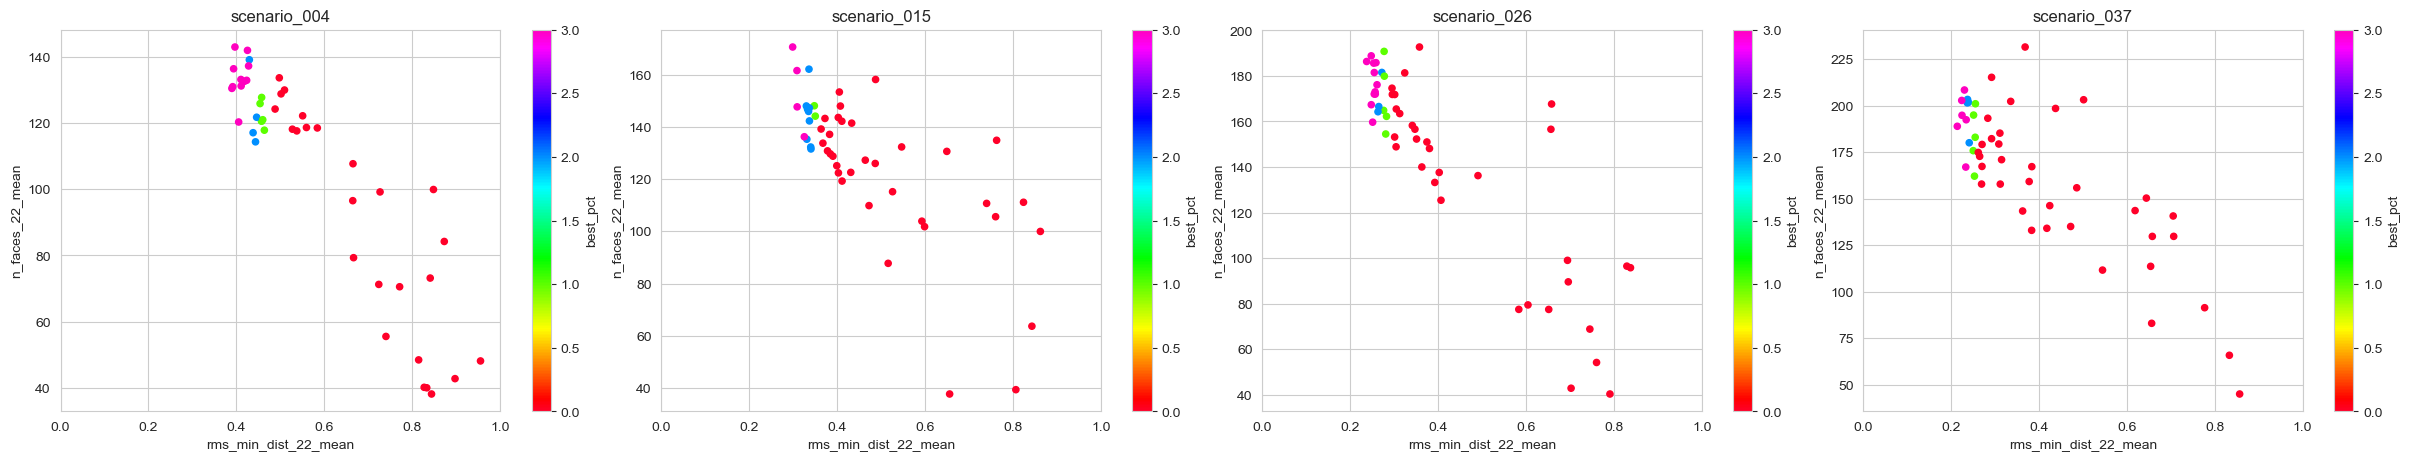

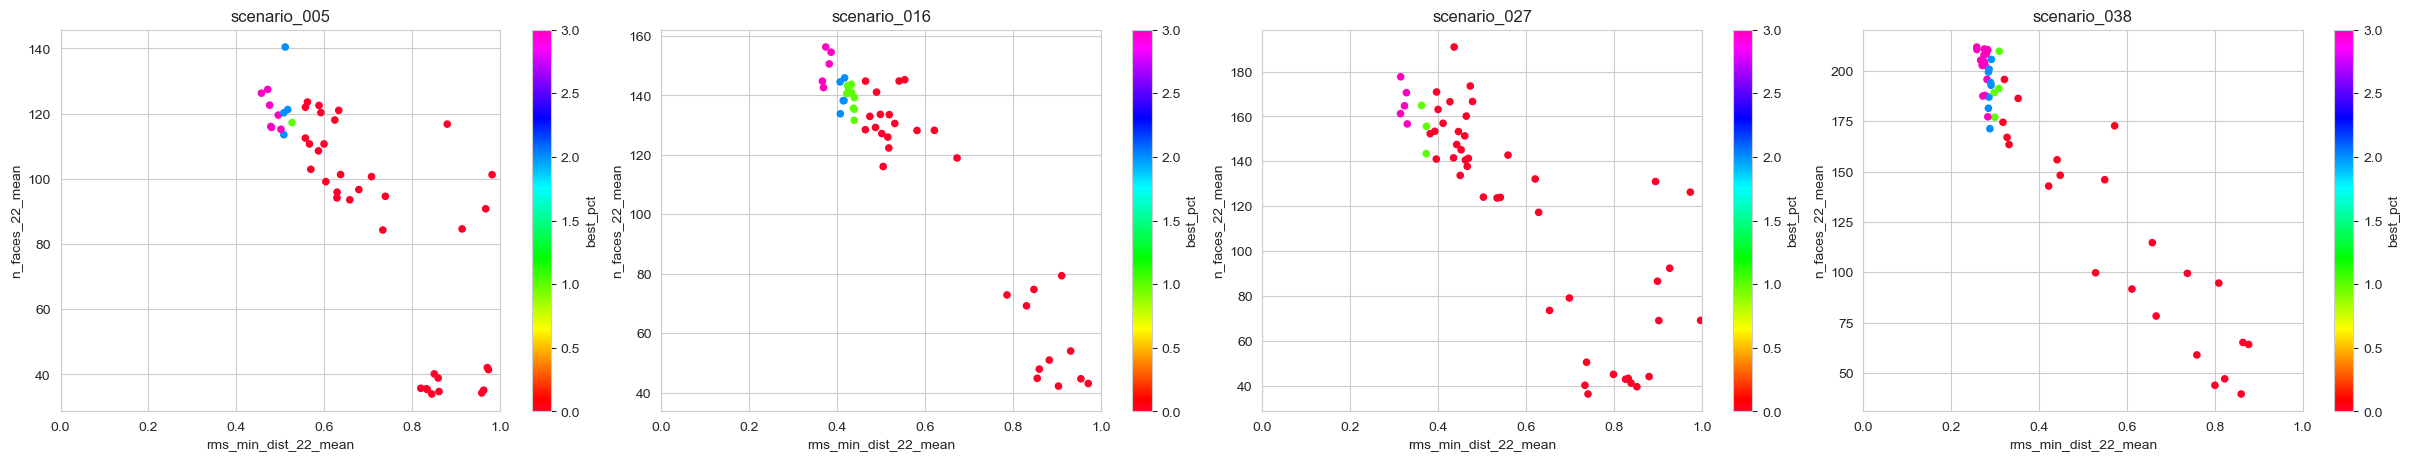

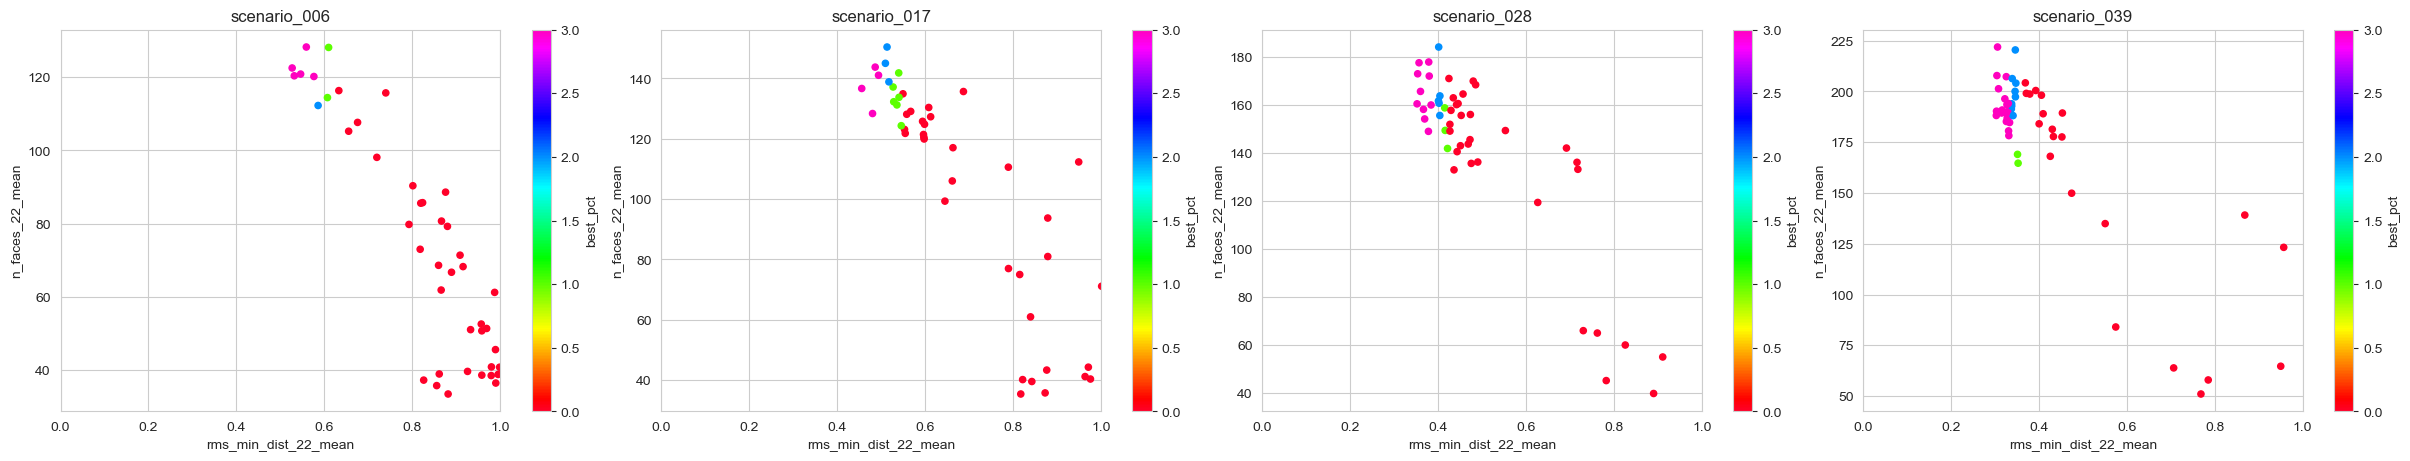

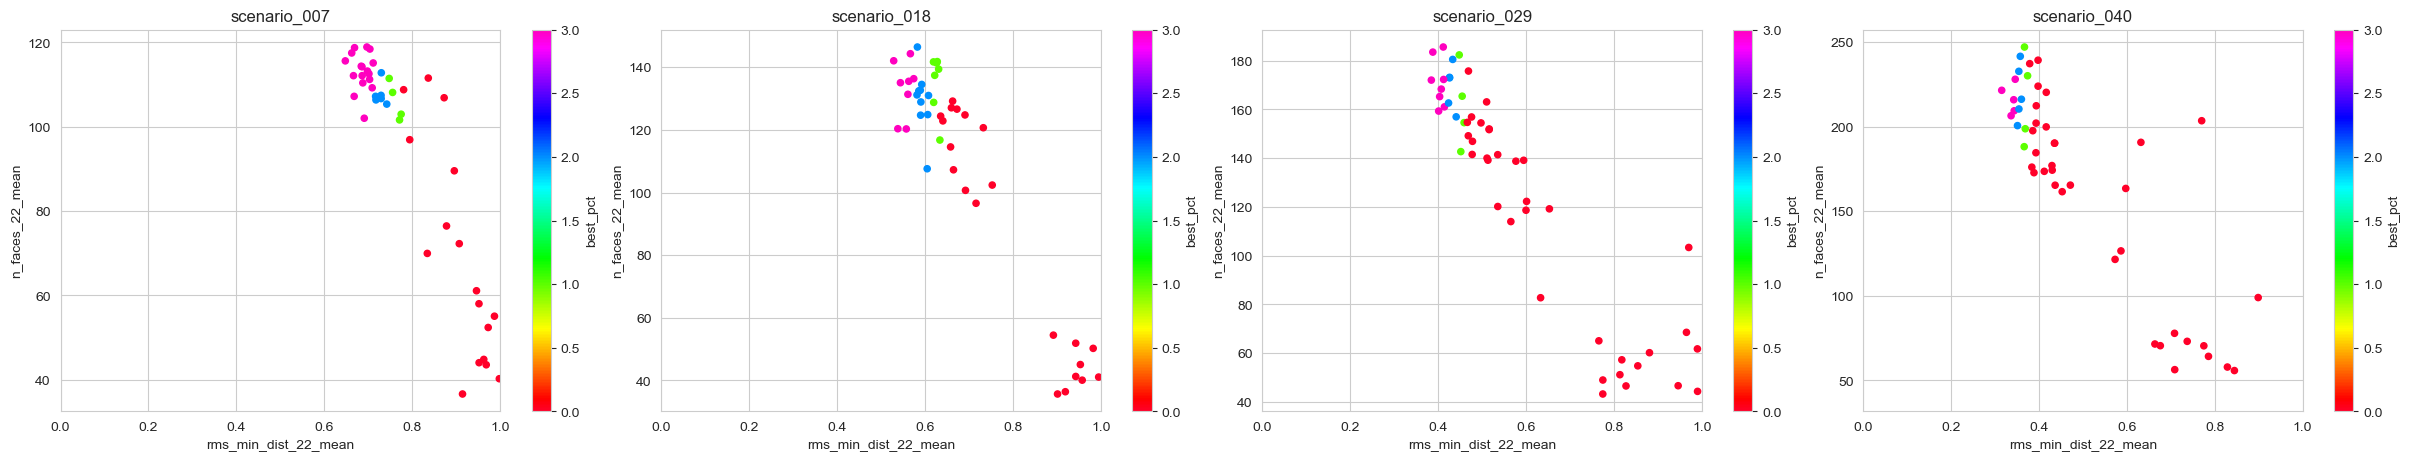

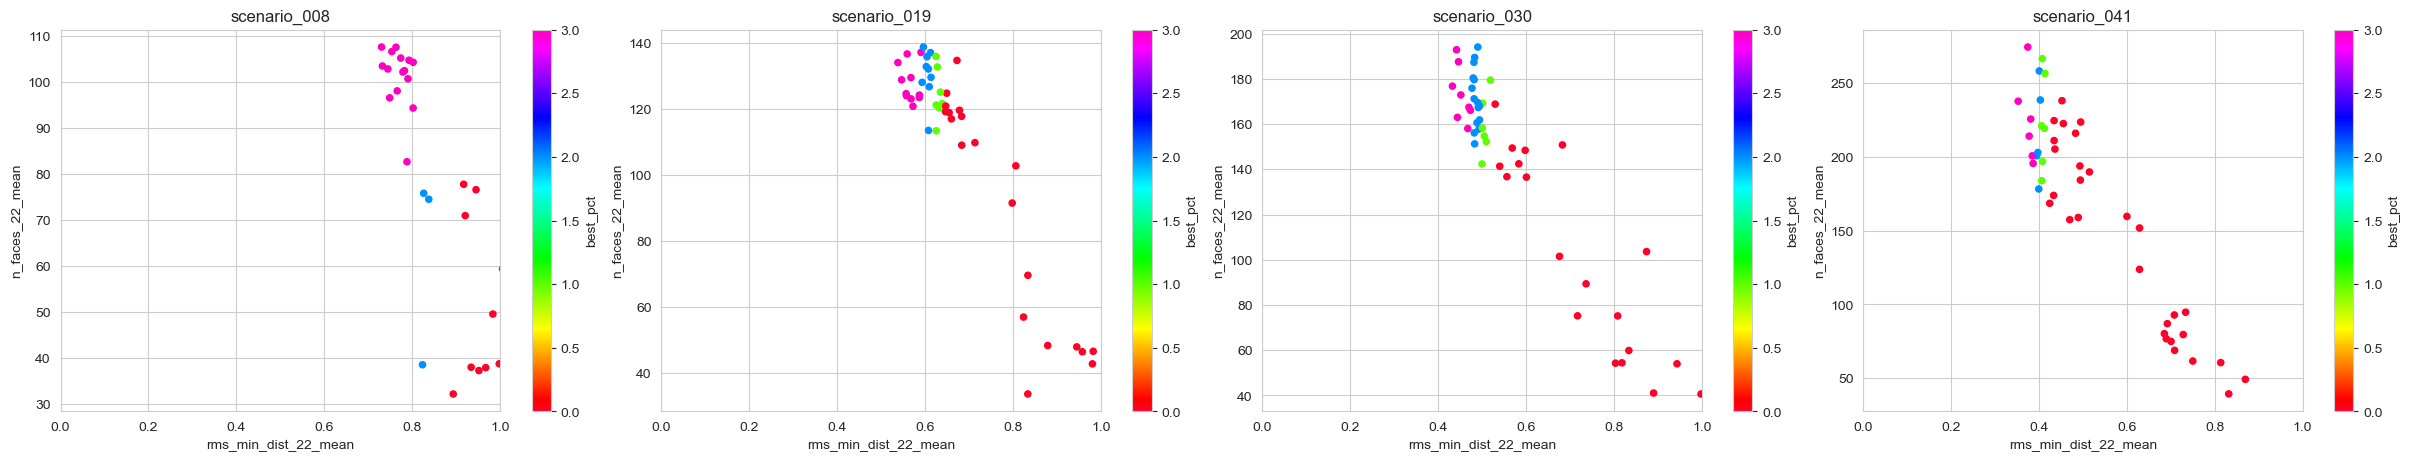

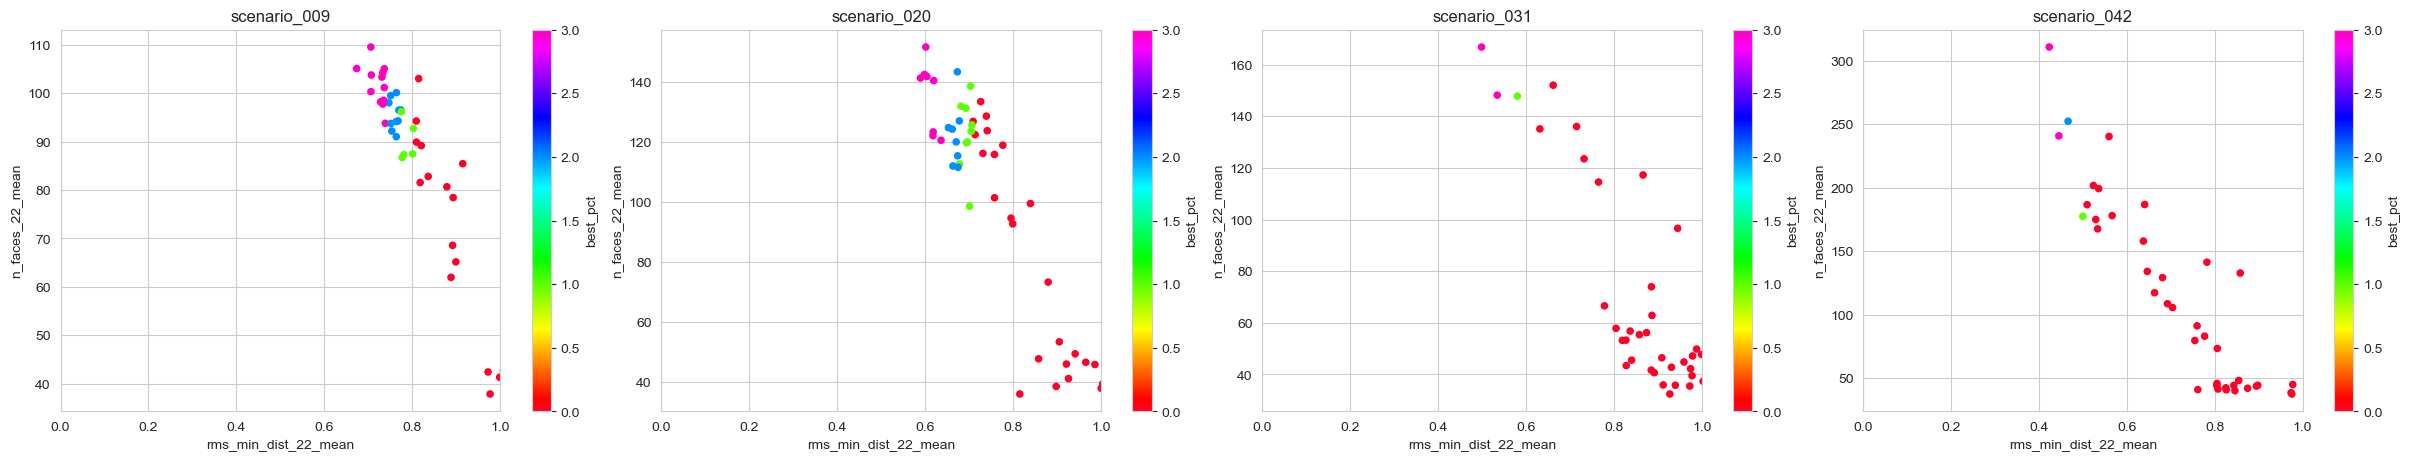

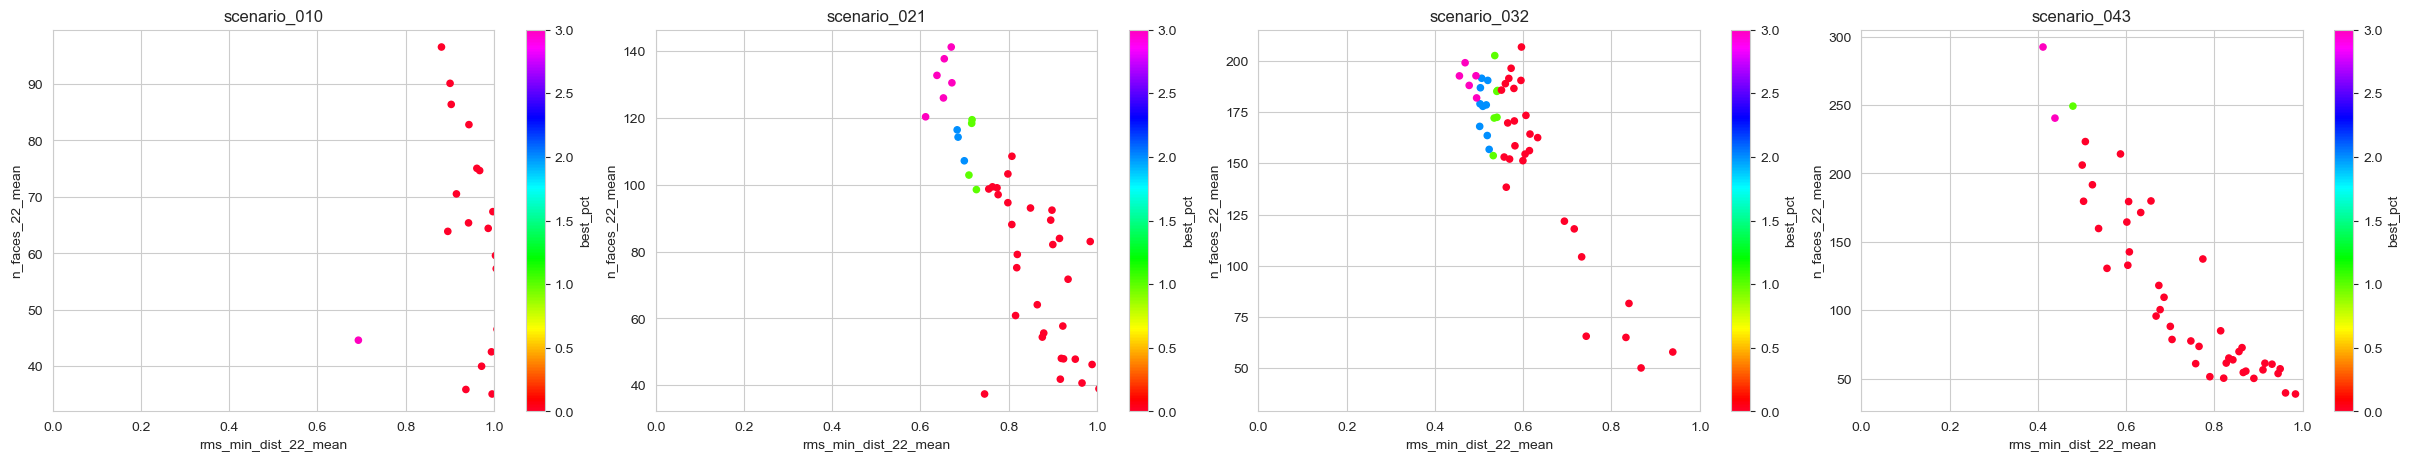

In [11]:
rows_error_levels = range(0, 11)
cols_density_levels = range(0, 4)
# cols_density_levels = range(0, 2)
for i in rows_error_levels:
    plot_metric_vs_metric_2([eos[j*11 + i] for j in cols_density_levels], ["rms_min_dist_22_mean"], ["n_faces_22_mean"], c="best_pct", colormap="gist_rainbow", sharex=None, sharey=None, xlim=(0,1))  # more colors: brg

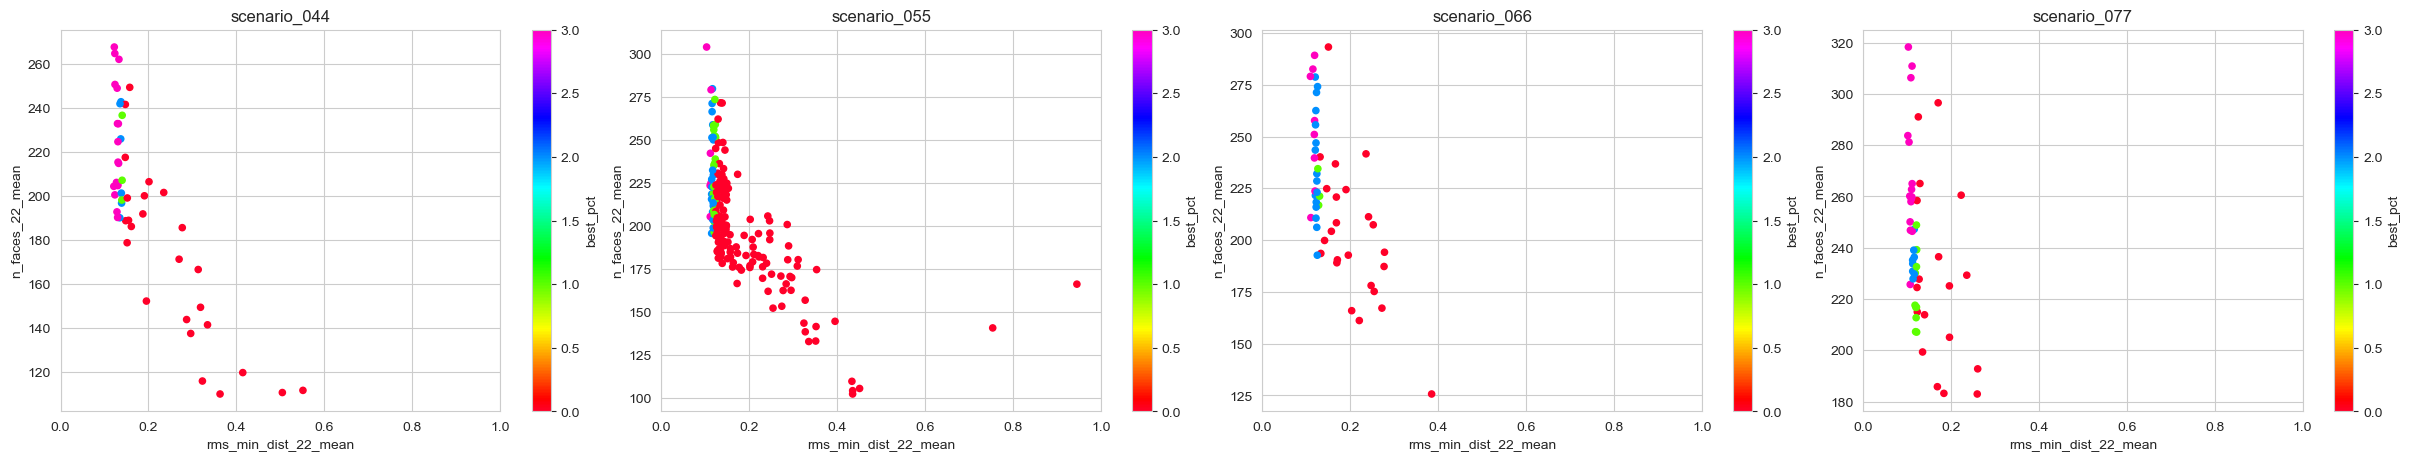

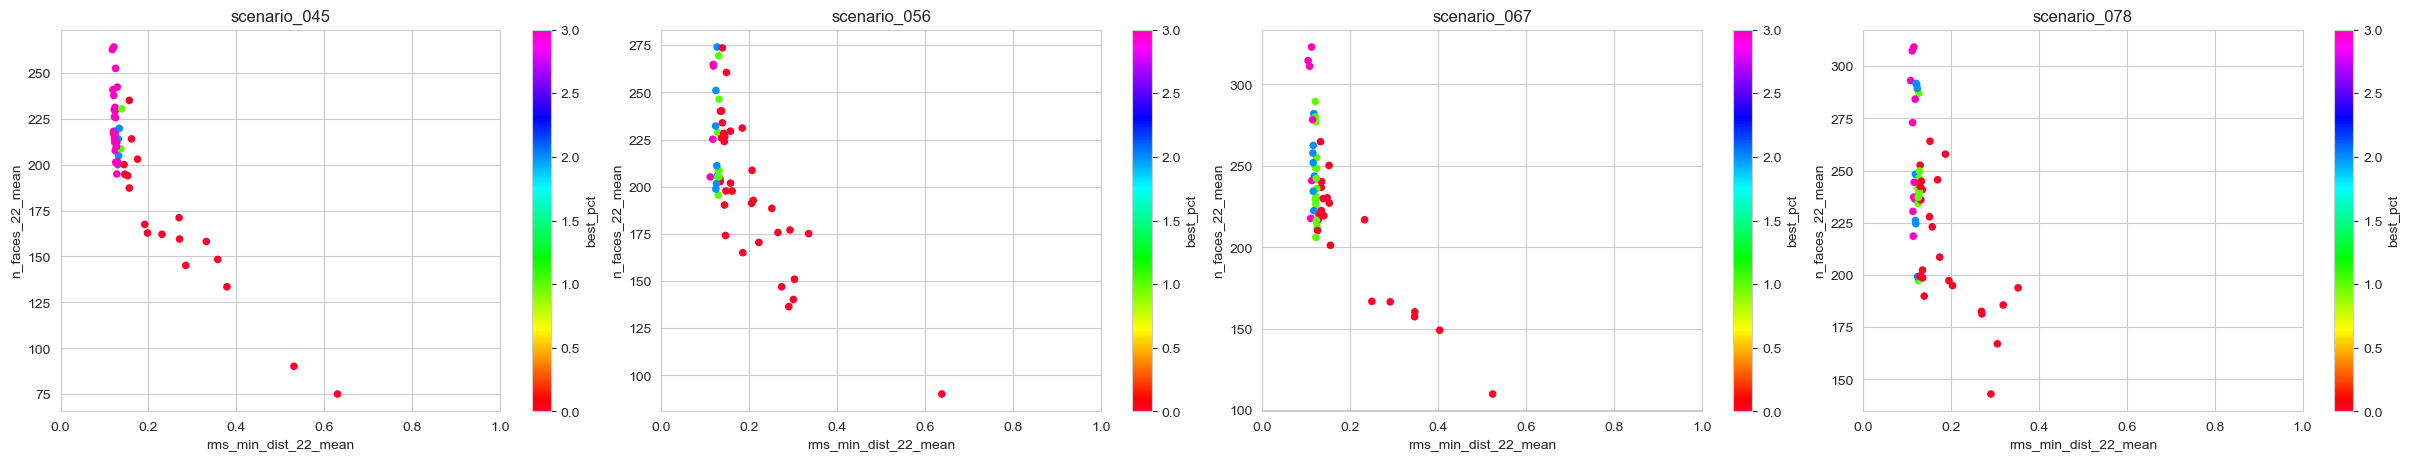

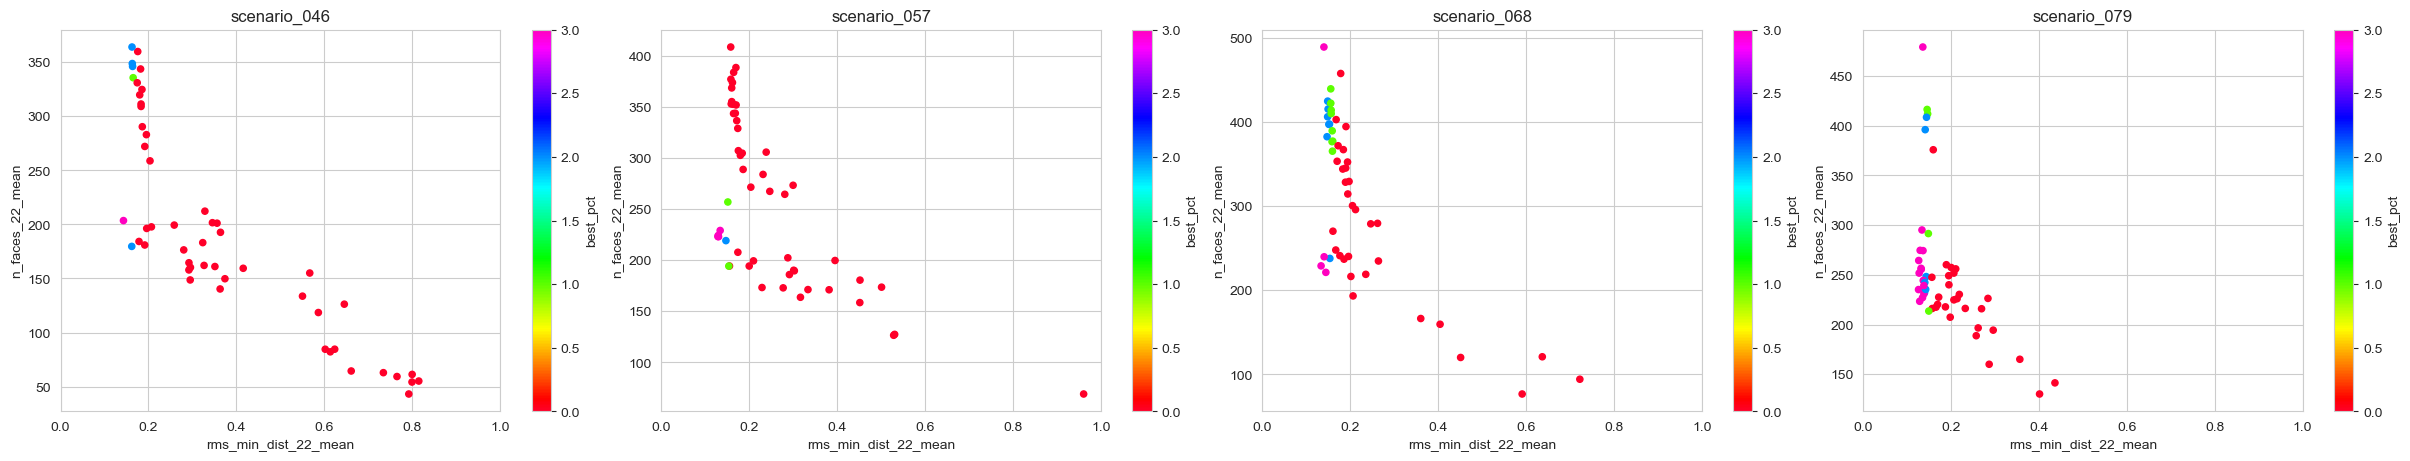

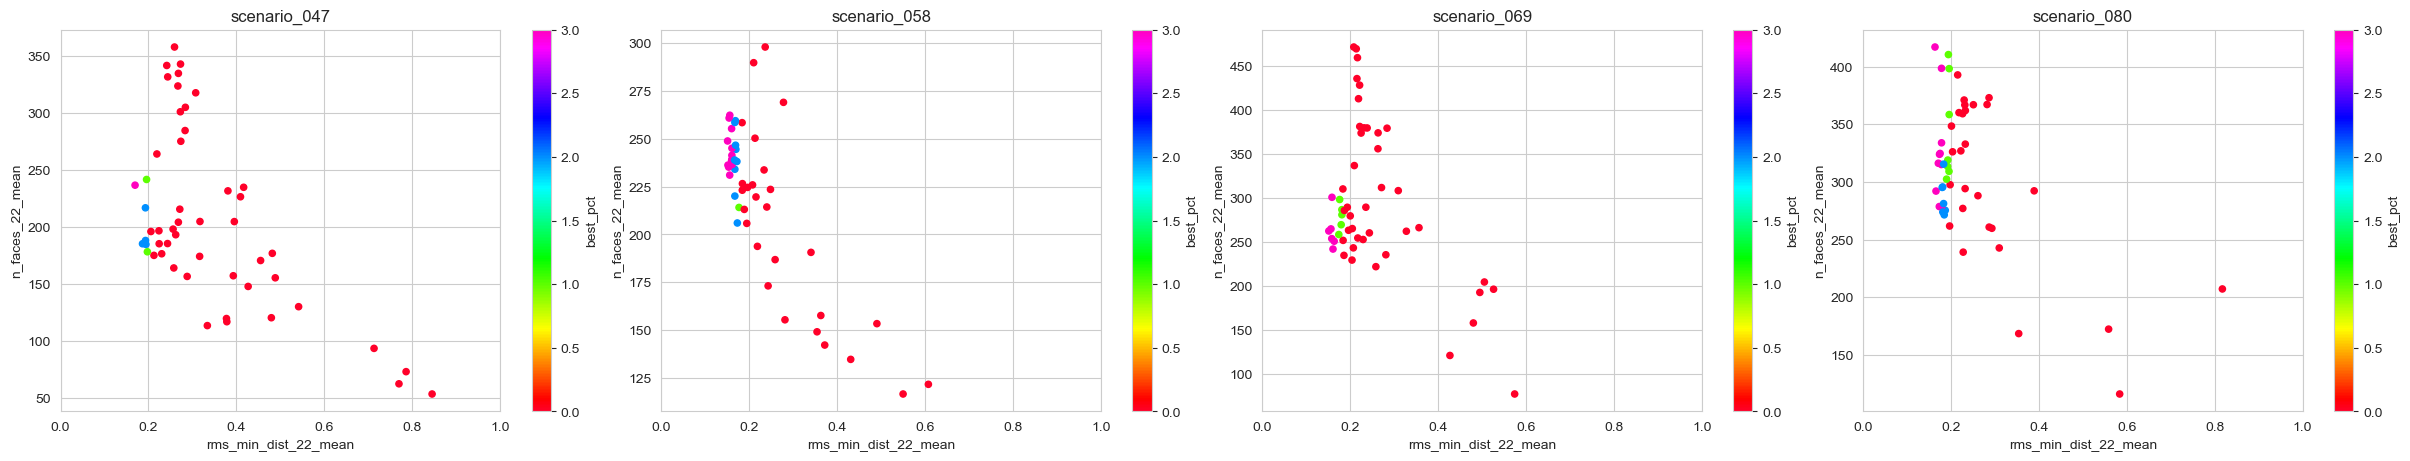

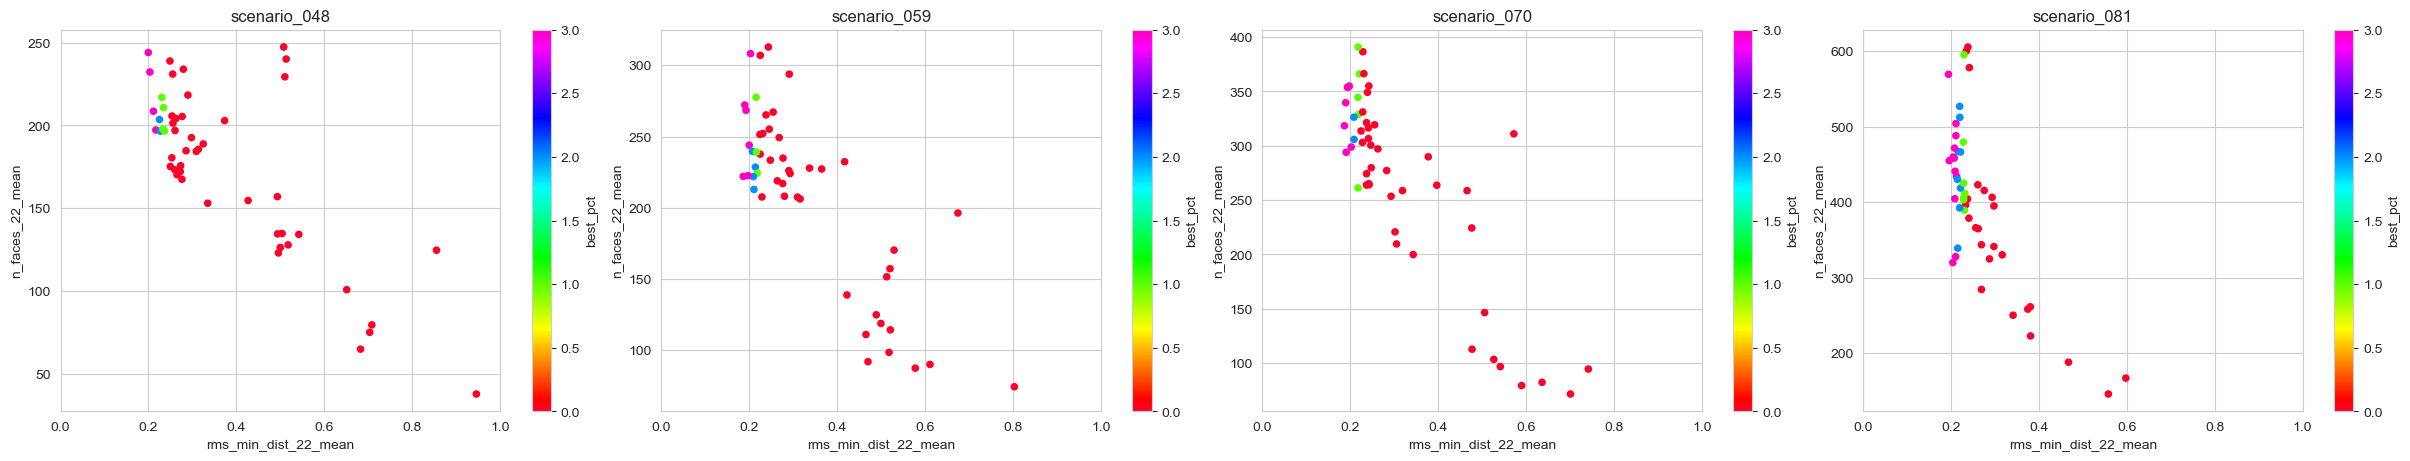

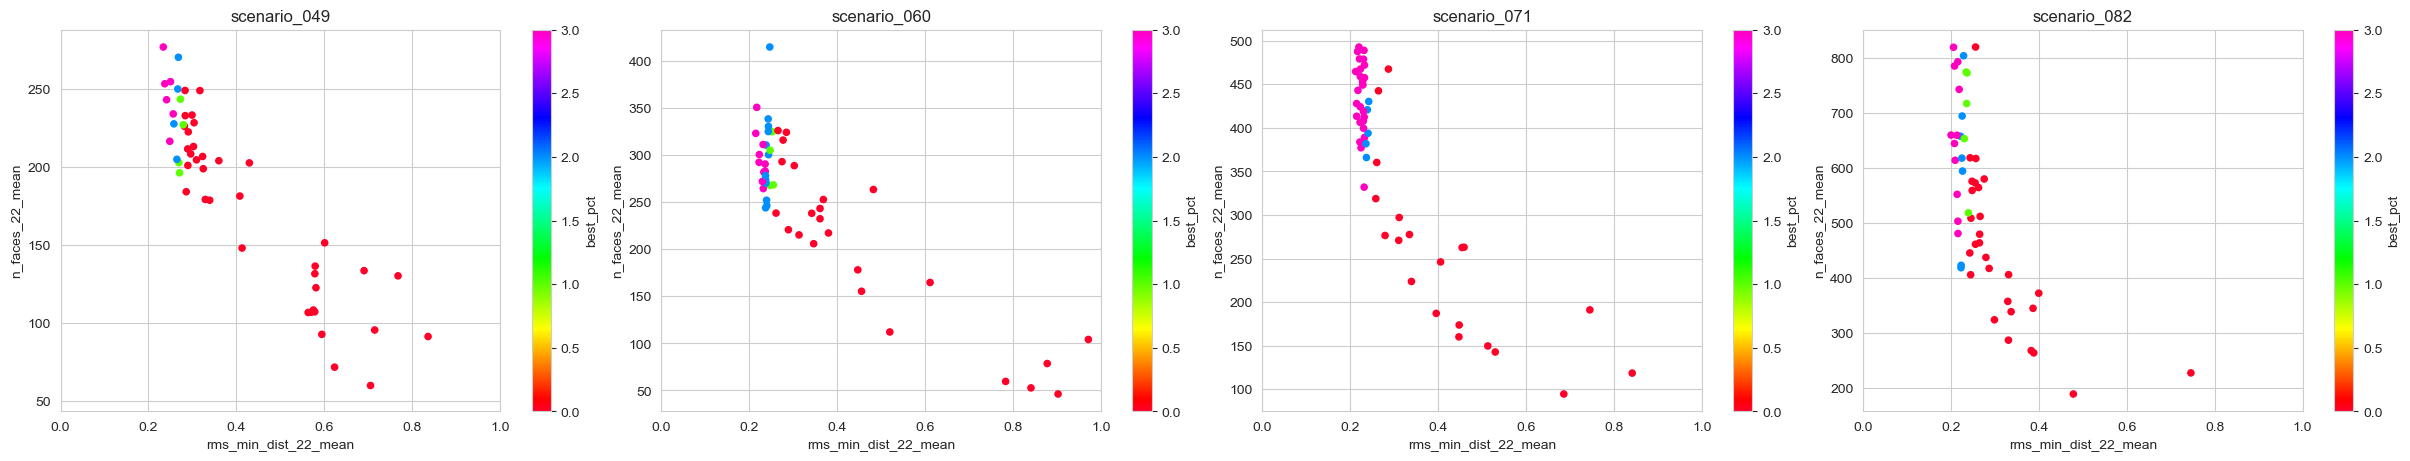

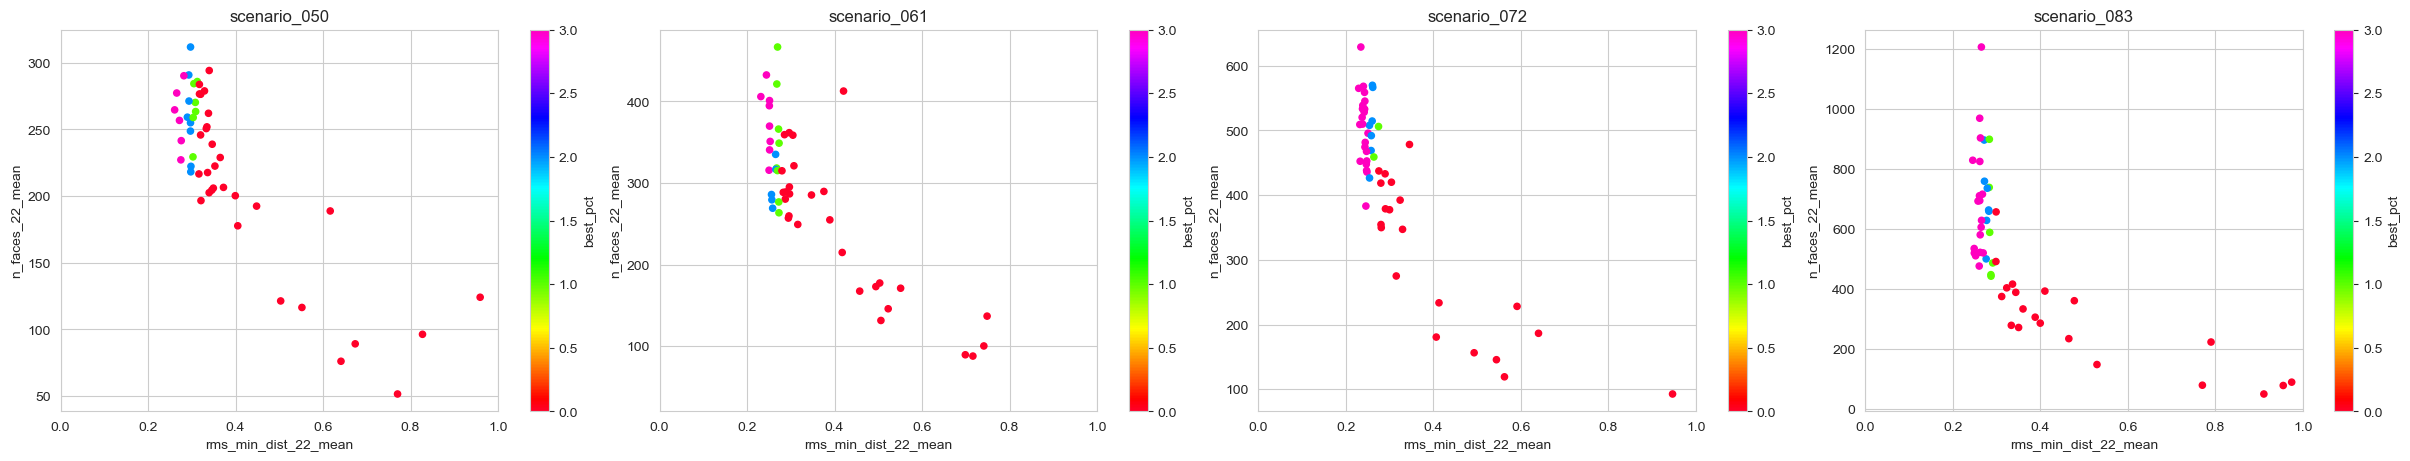

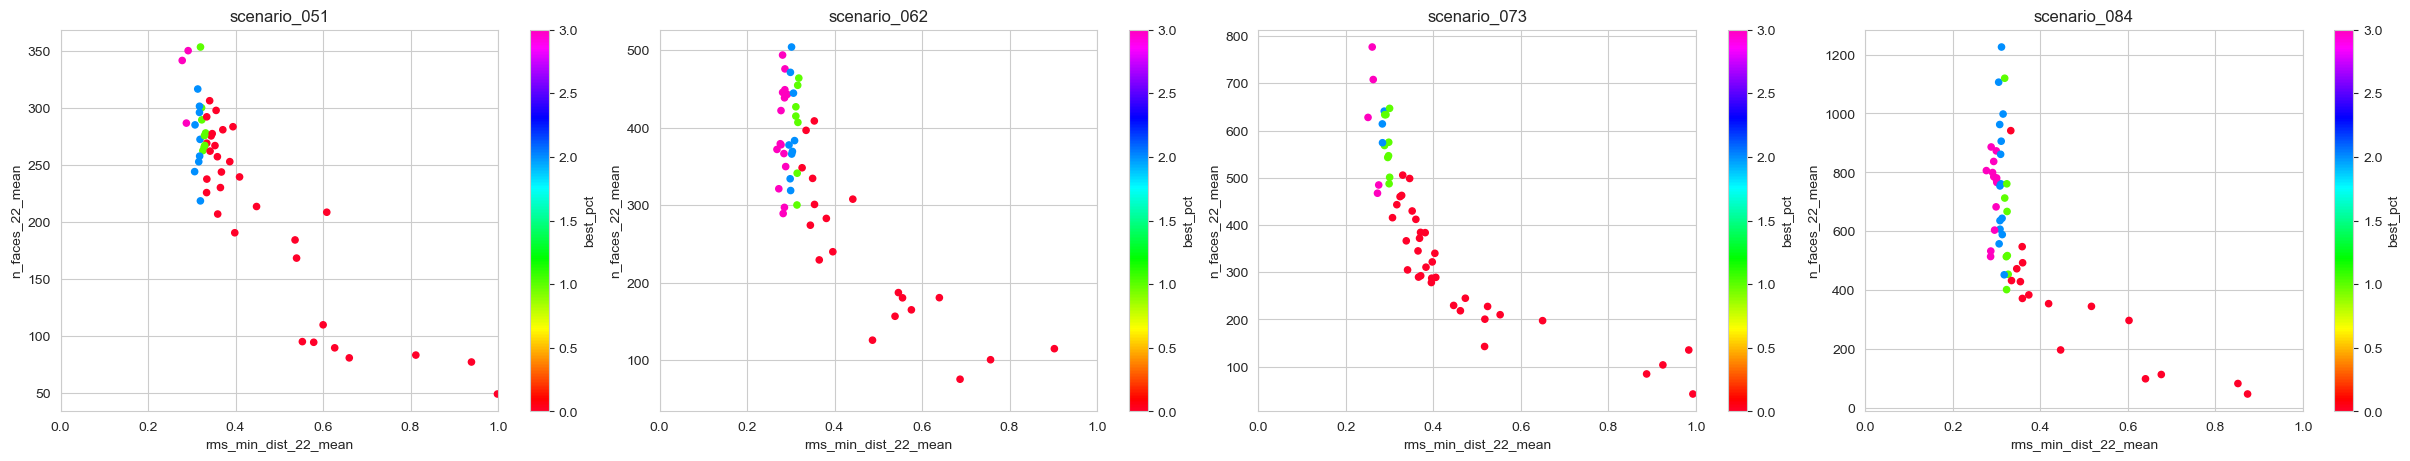

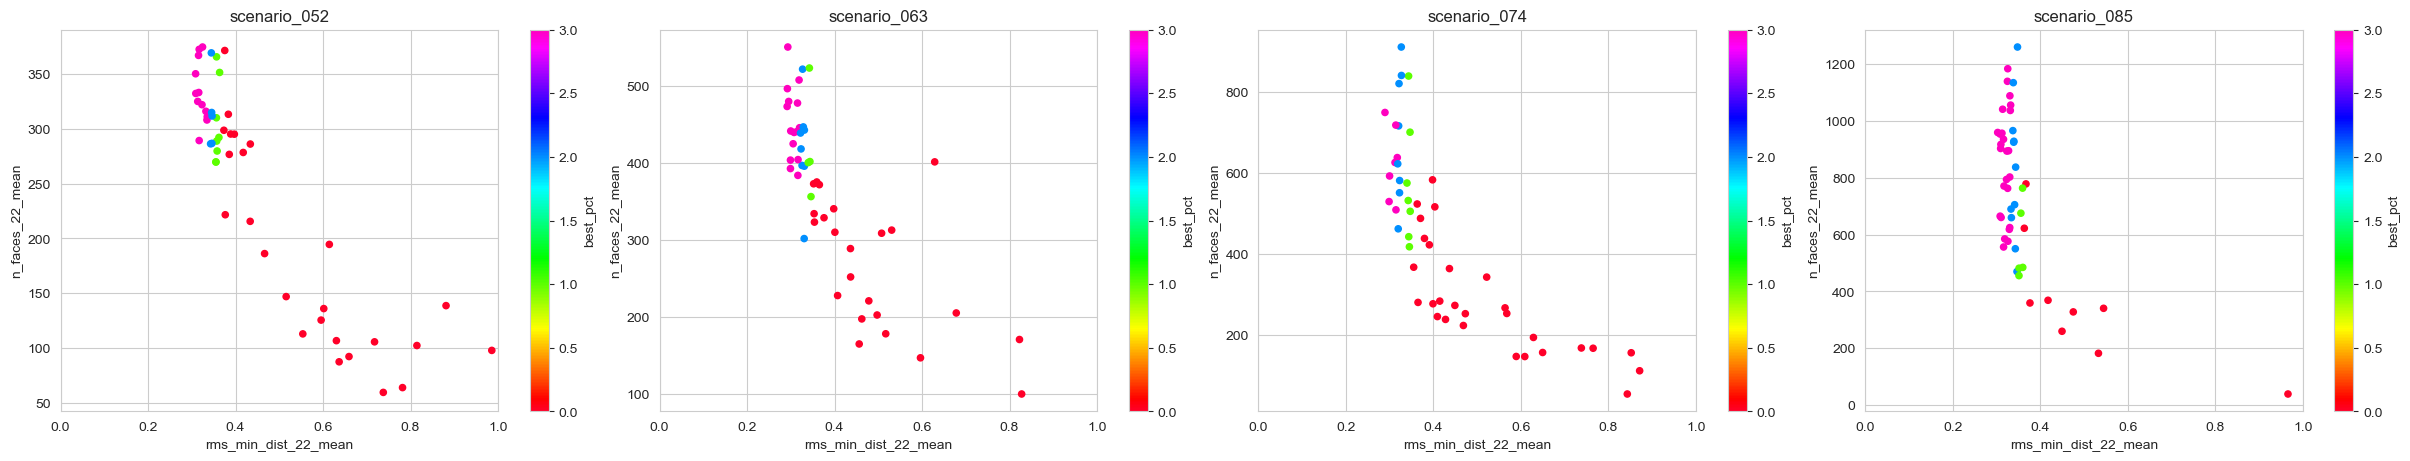

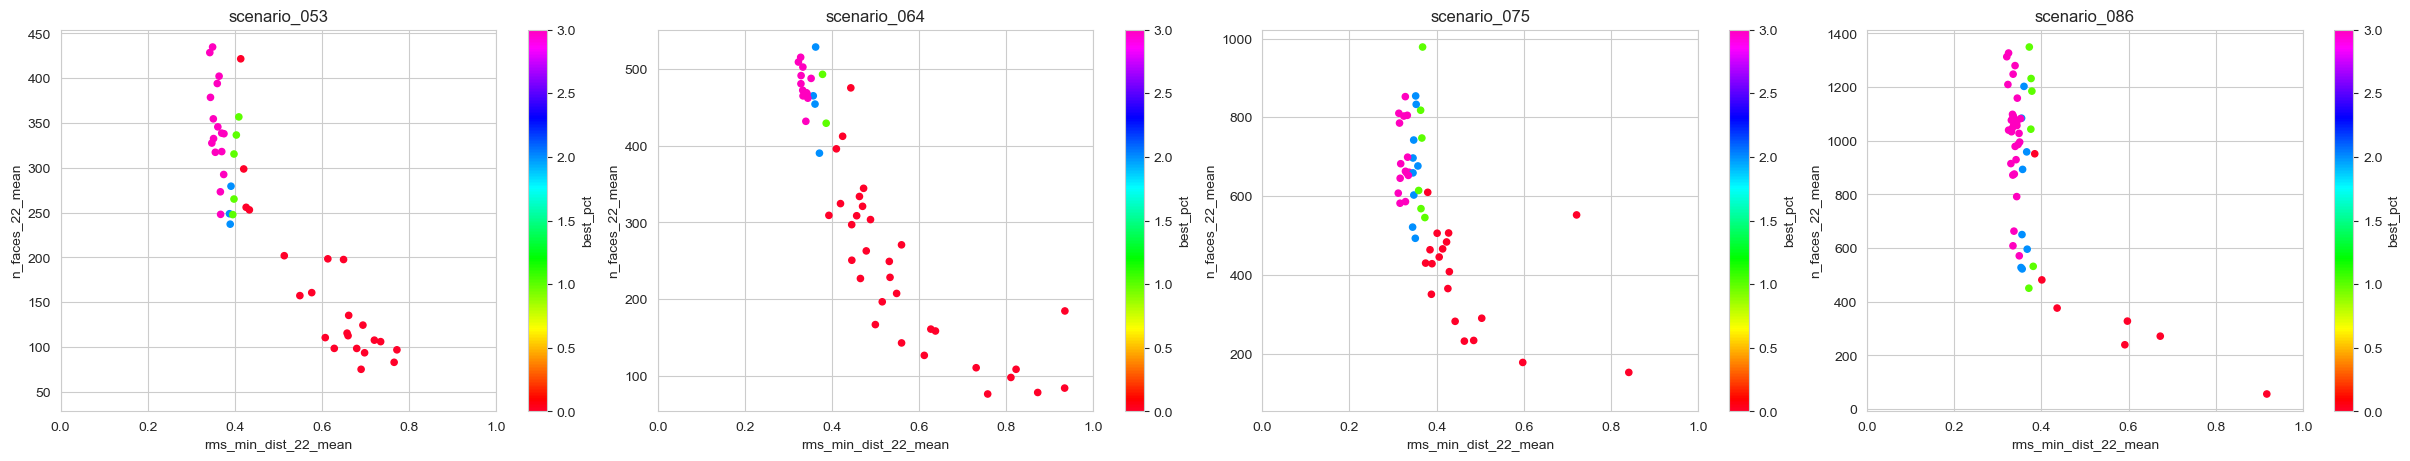

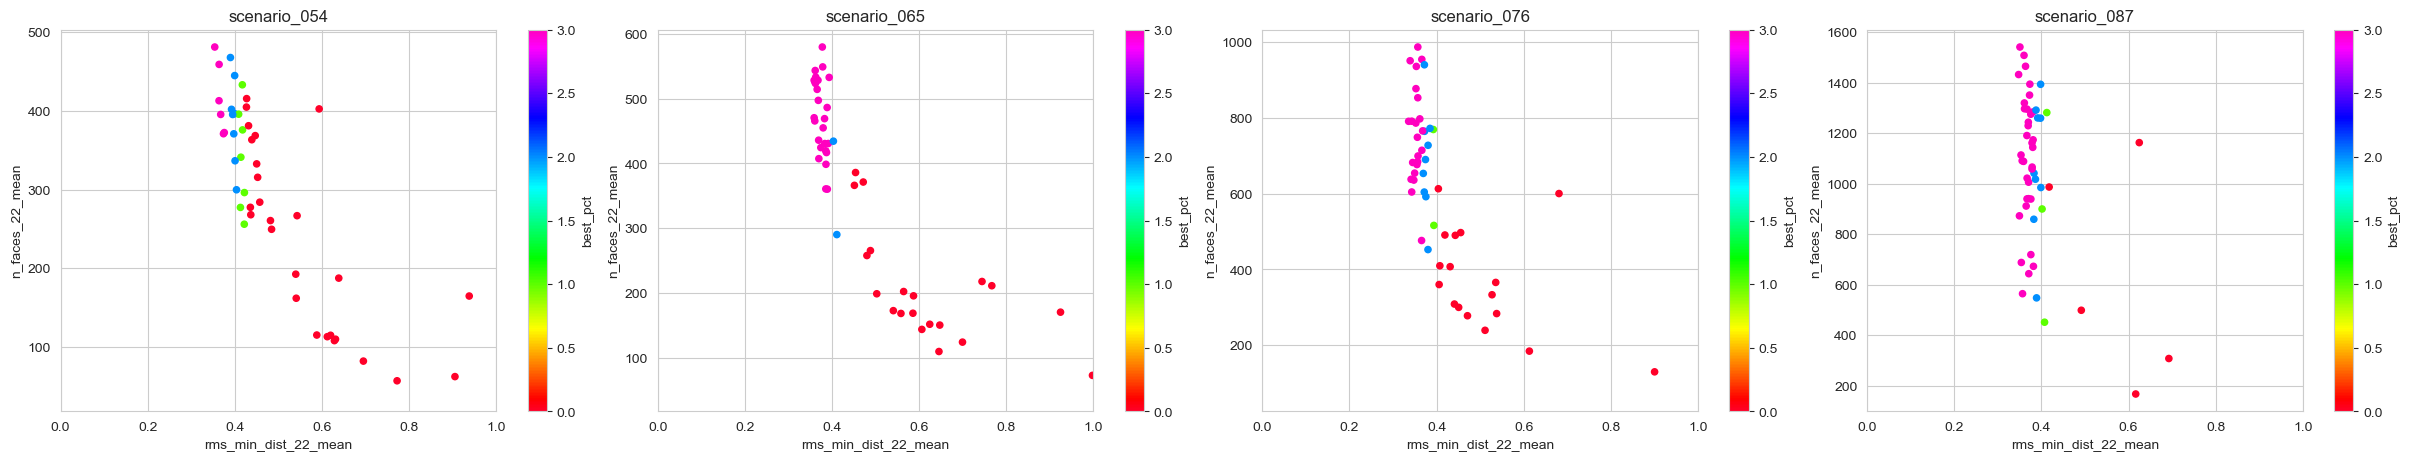

In [12]:
rows_error_levels = range(0, 11)
cols_density_levels = range(4, 8)
for i in rows_error_levels:
    plot_metric_vs_metric_2([eos[j*11 + i] for j in cols_density_levels], ["rms_min_dist_22_mean"], ["n_faces_22_mean"], c="best_pct", colormap="gist_rainbow", sharex=None, sharey=None, xlim=(0, 1))

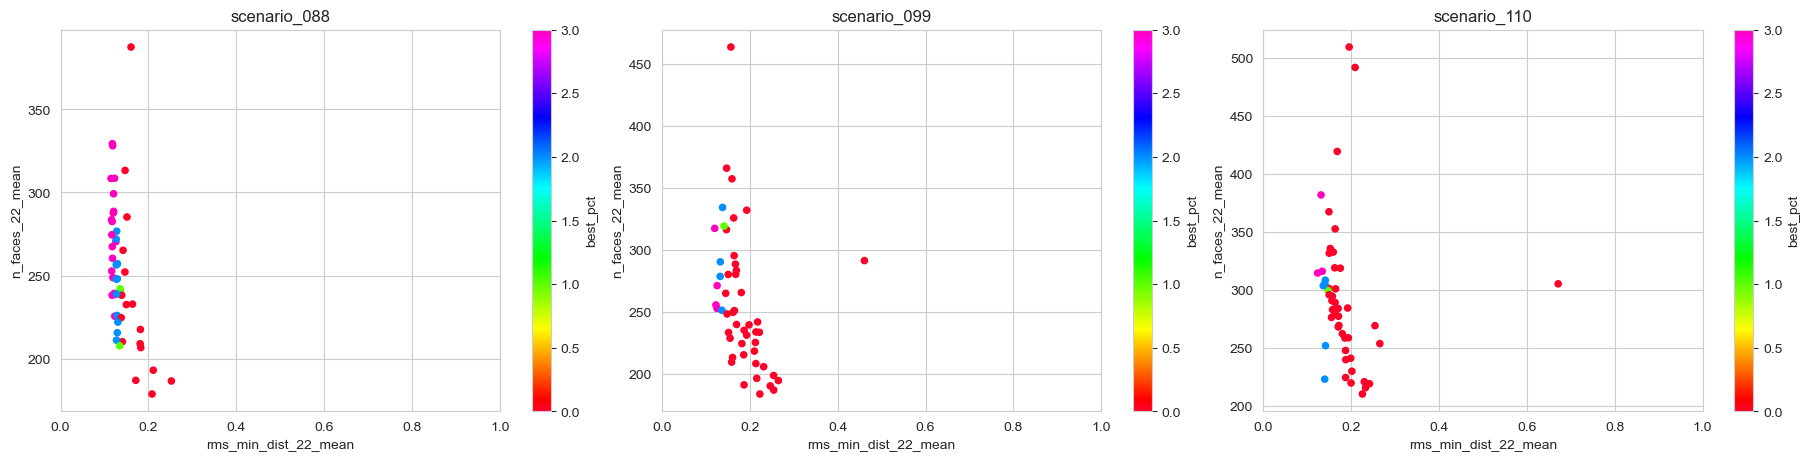

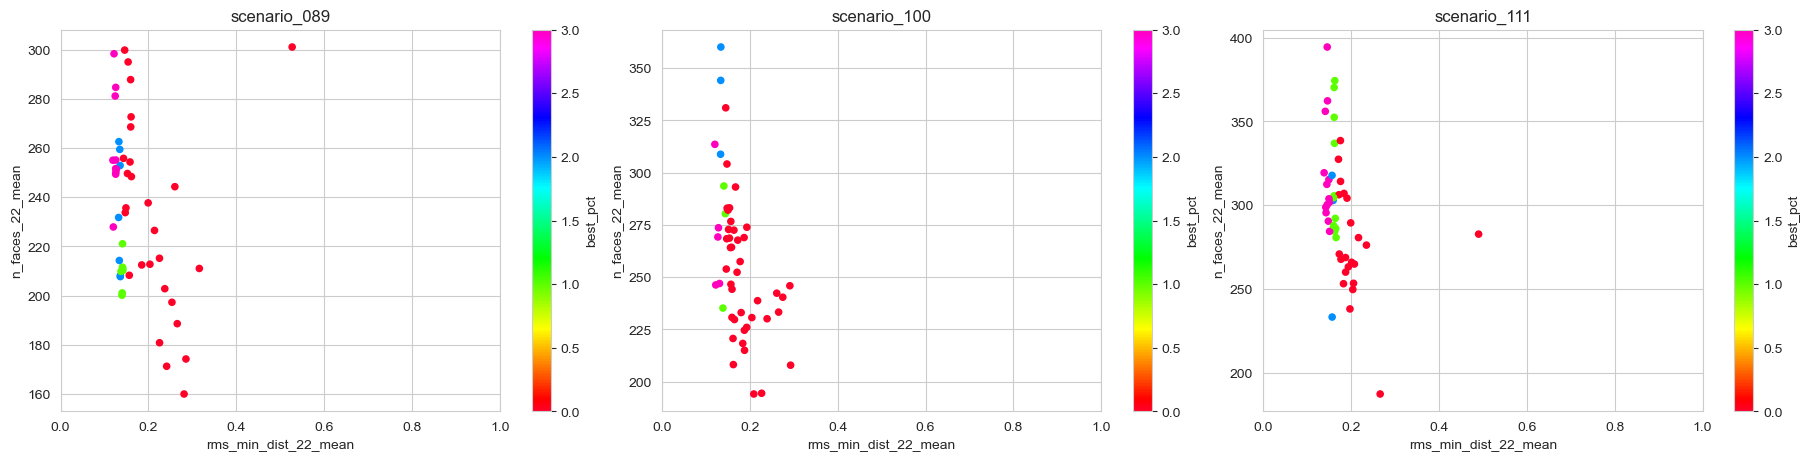

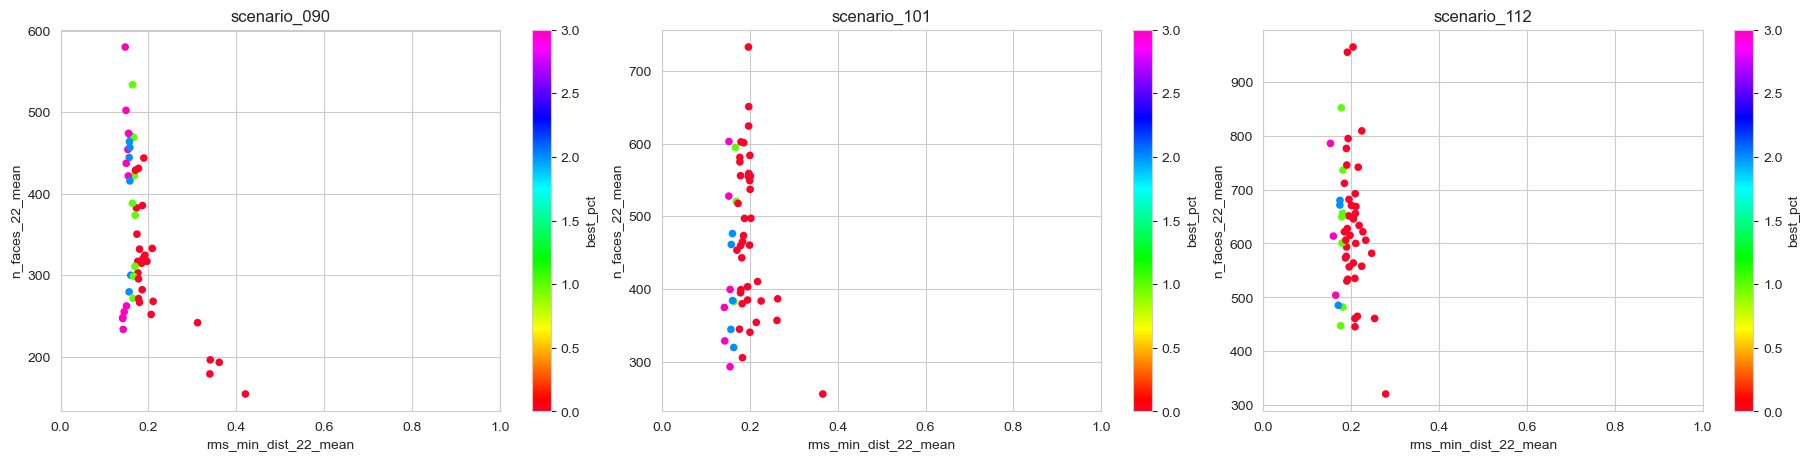

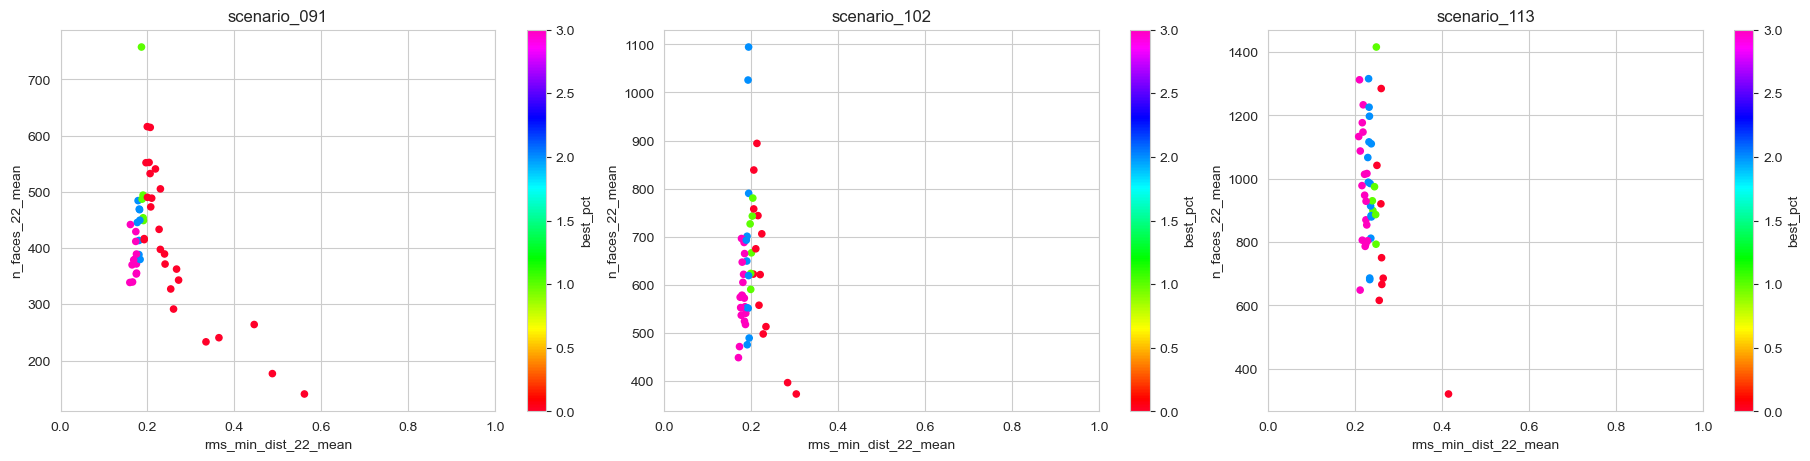

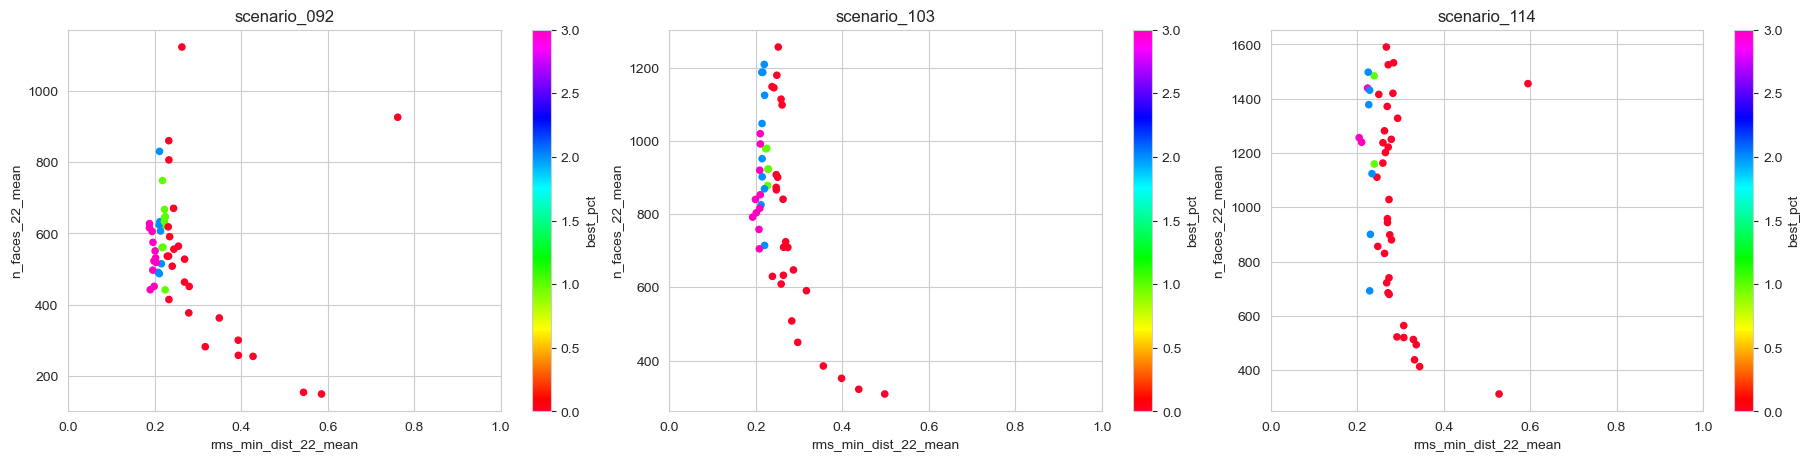

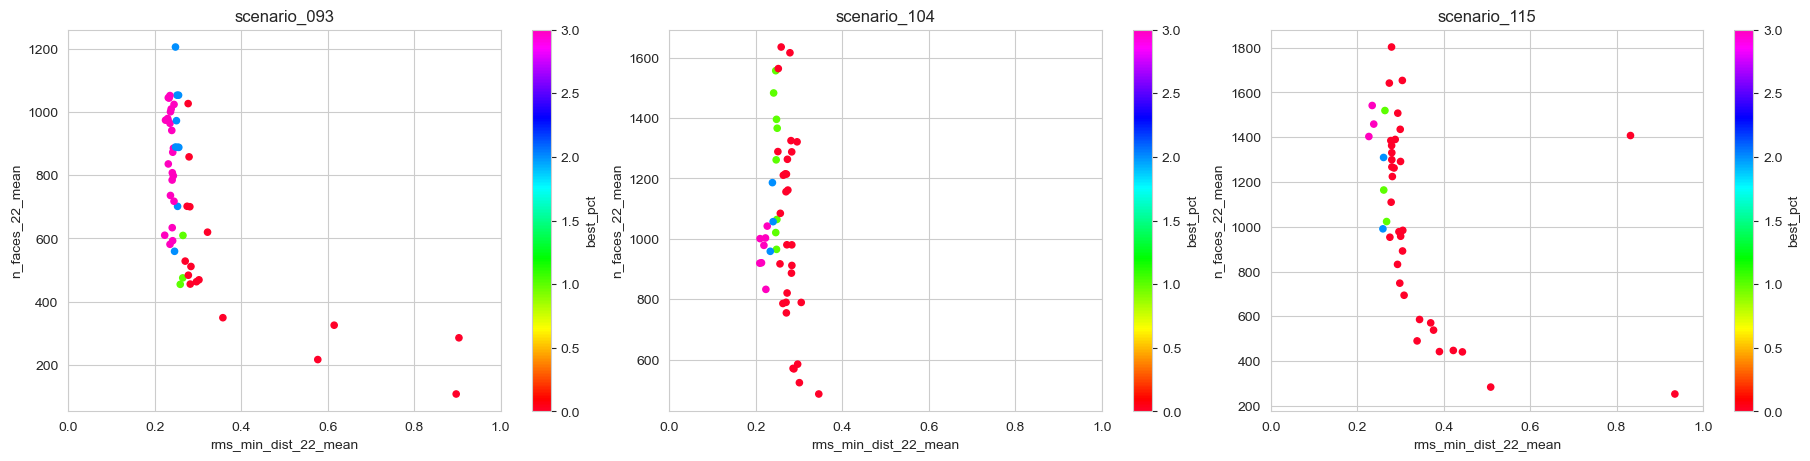

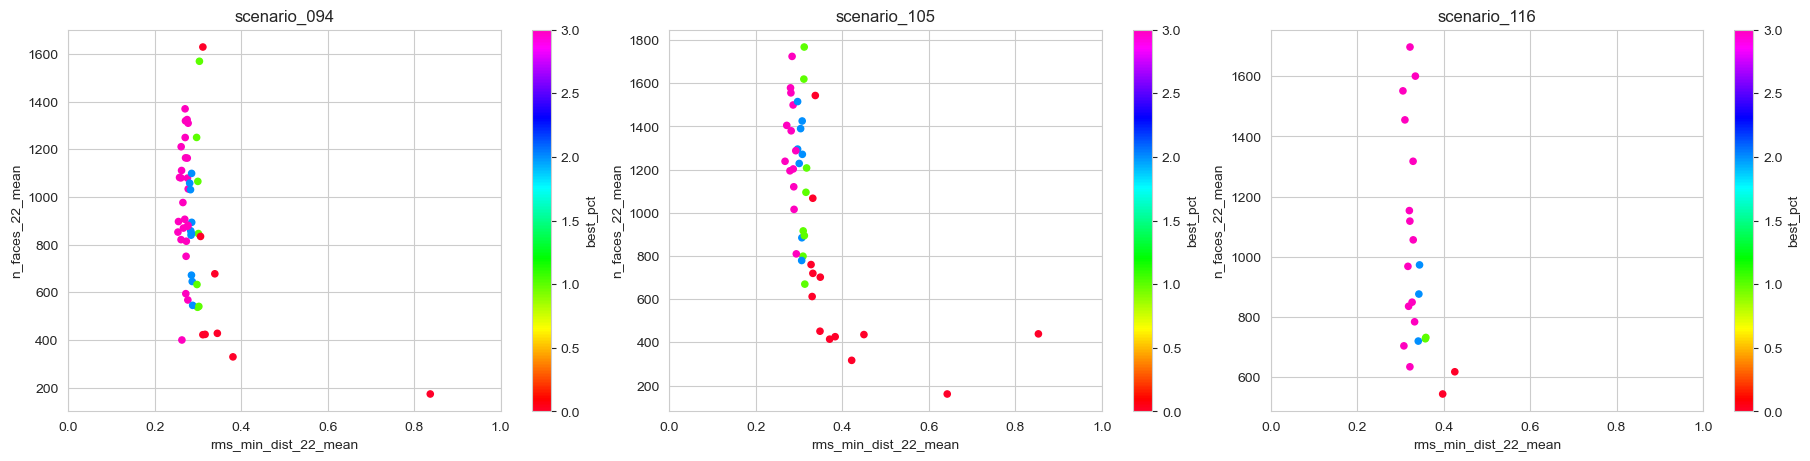

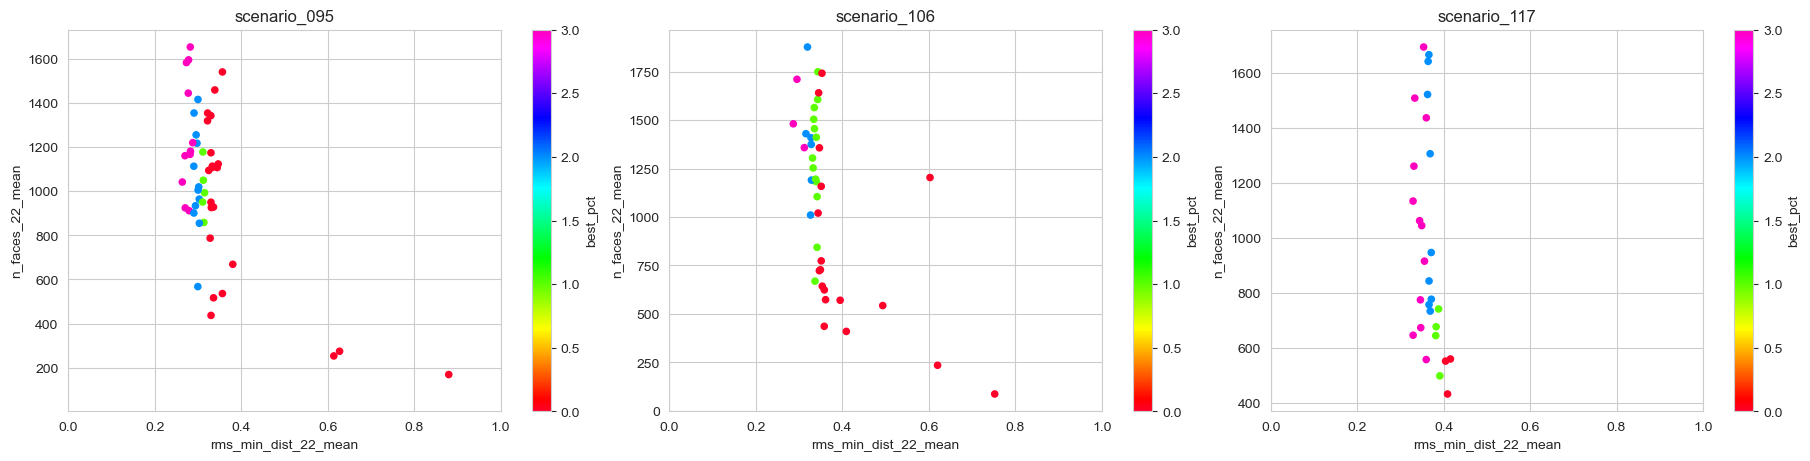

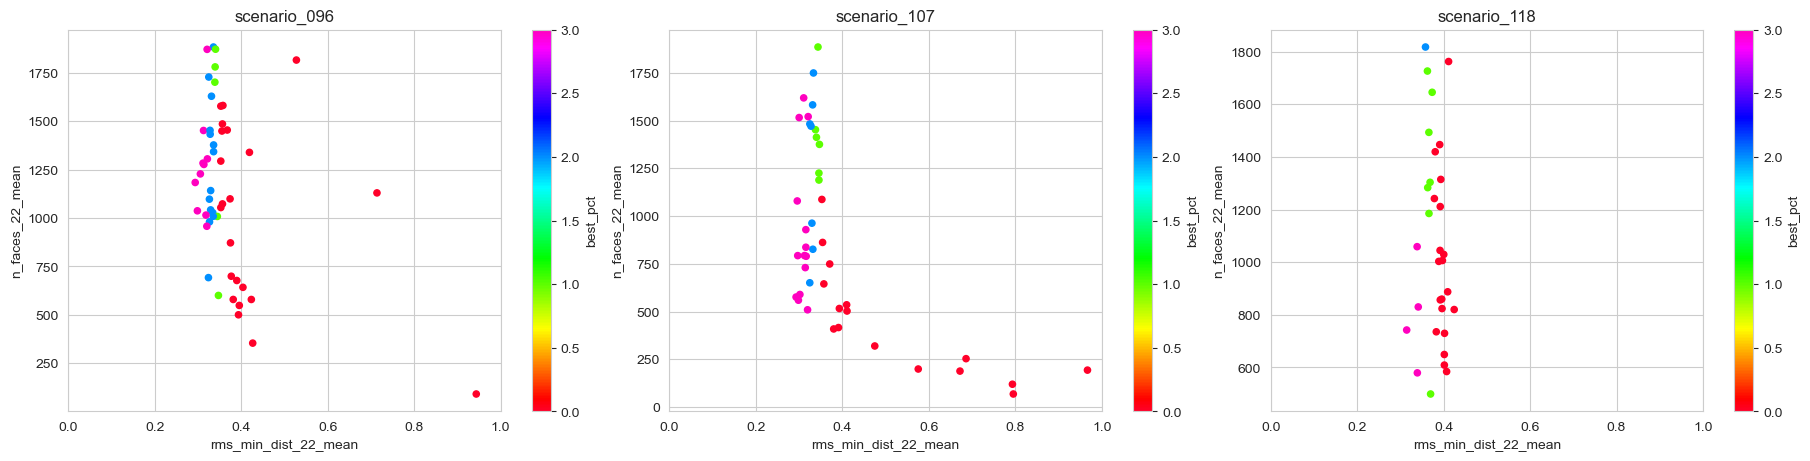

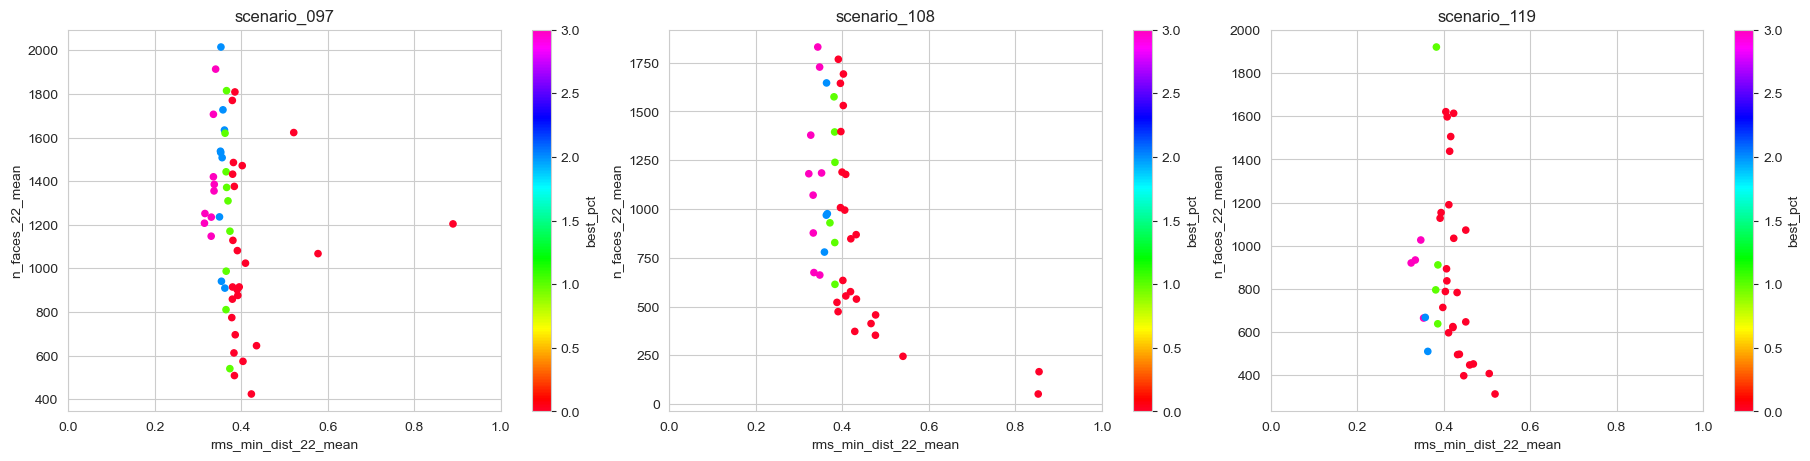

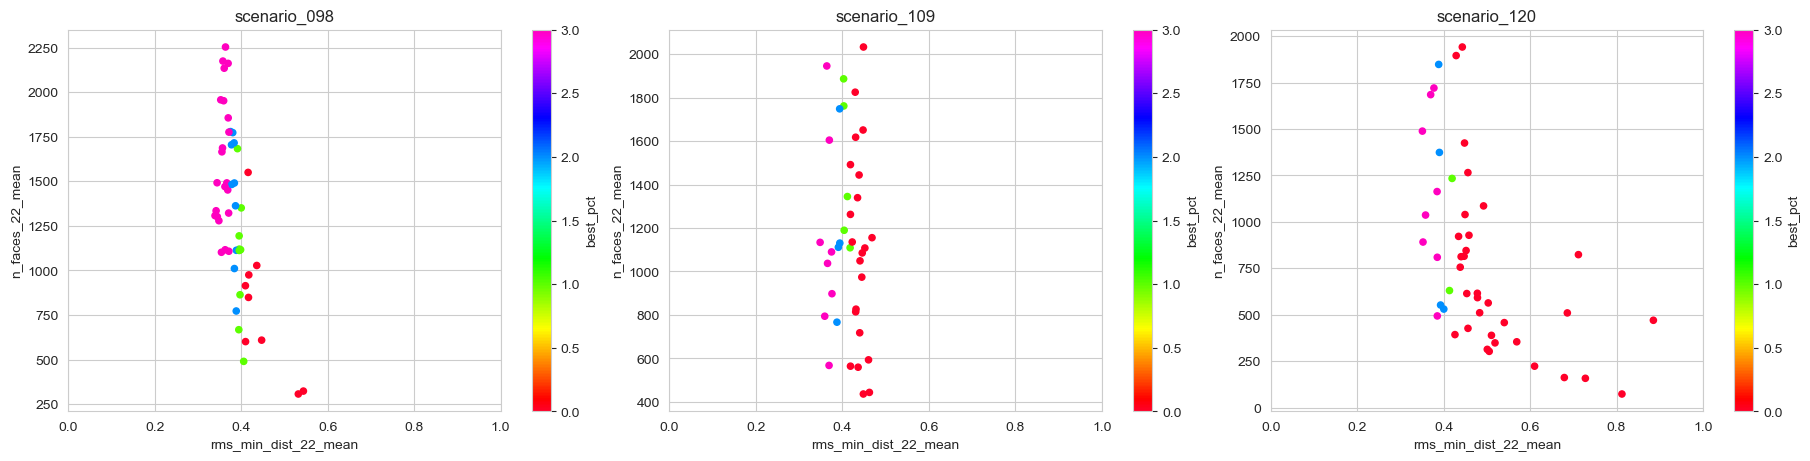

In [13]:
rows_error_levels = range(0, 11)
cols_density_levels = range(8, 11)
for i in rows_error_levels:
    plot_metric_vs_metric_2([eos[j*11 + i] for j in cols_density_levels], ["rms_min_dist_22_mean"], ["n_faces_22_mean"], c="best_pct", colormap="gist_rainbow", sharex=None, sharey=None, xlim=(0, 1))

In [ ]:
plot_metric_vs_metric_2(eos, opt_params, "rms_min_dist_22_mean", c="n_faces_22_mean", colormap="coolwarm")

## Metrics correlations

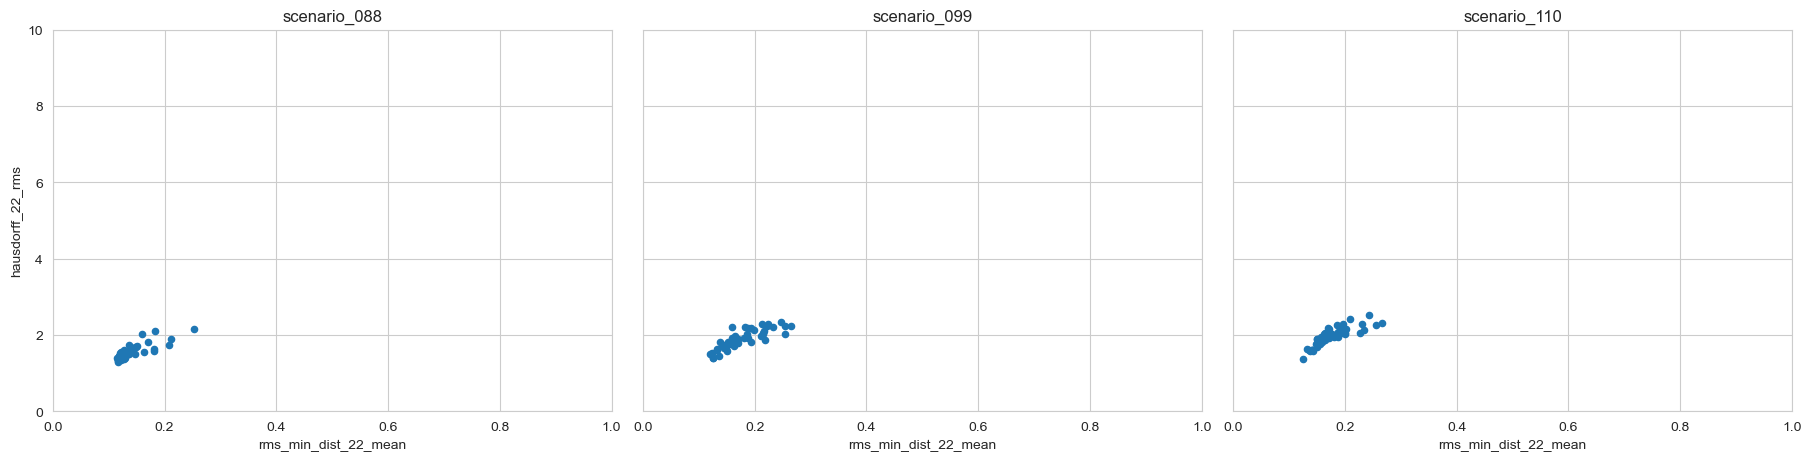

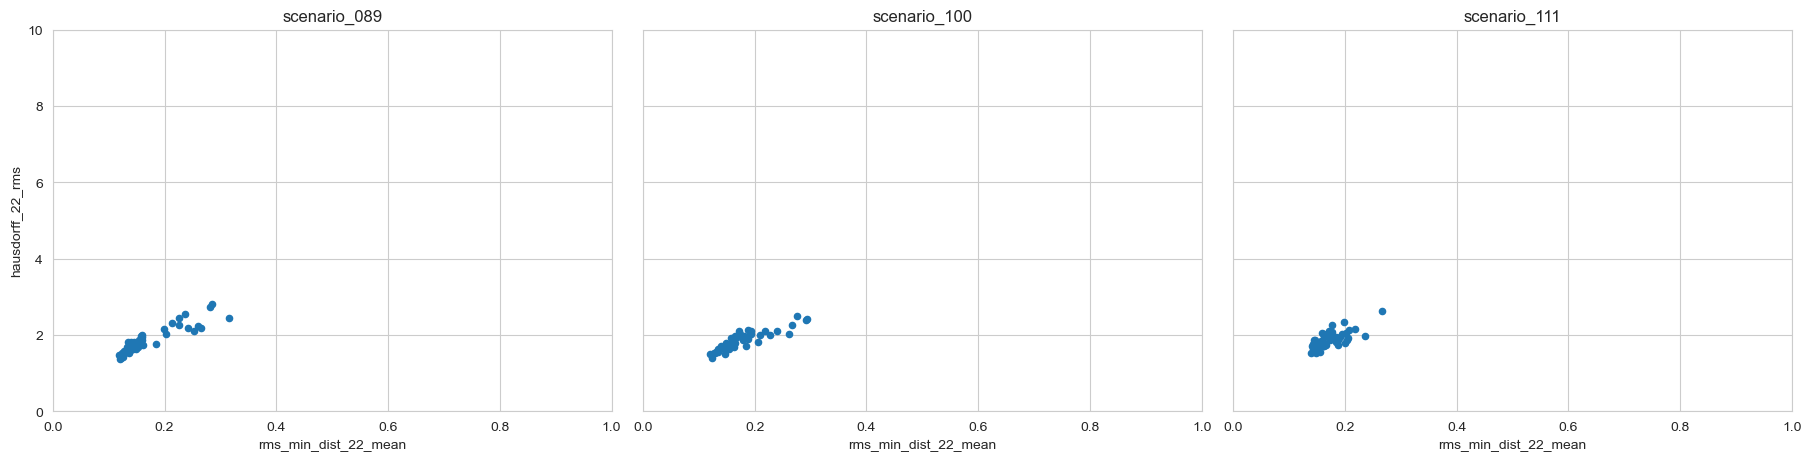

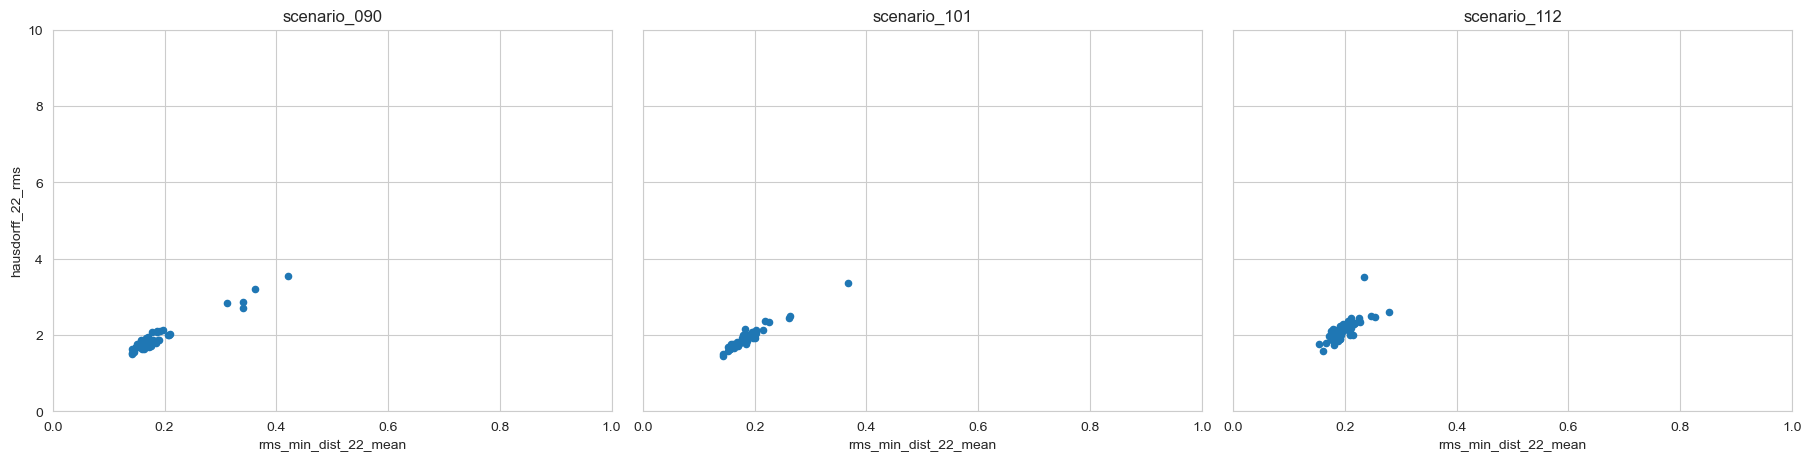

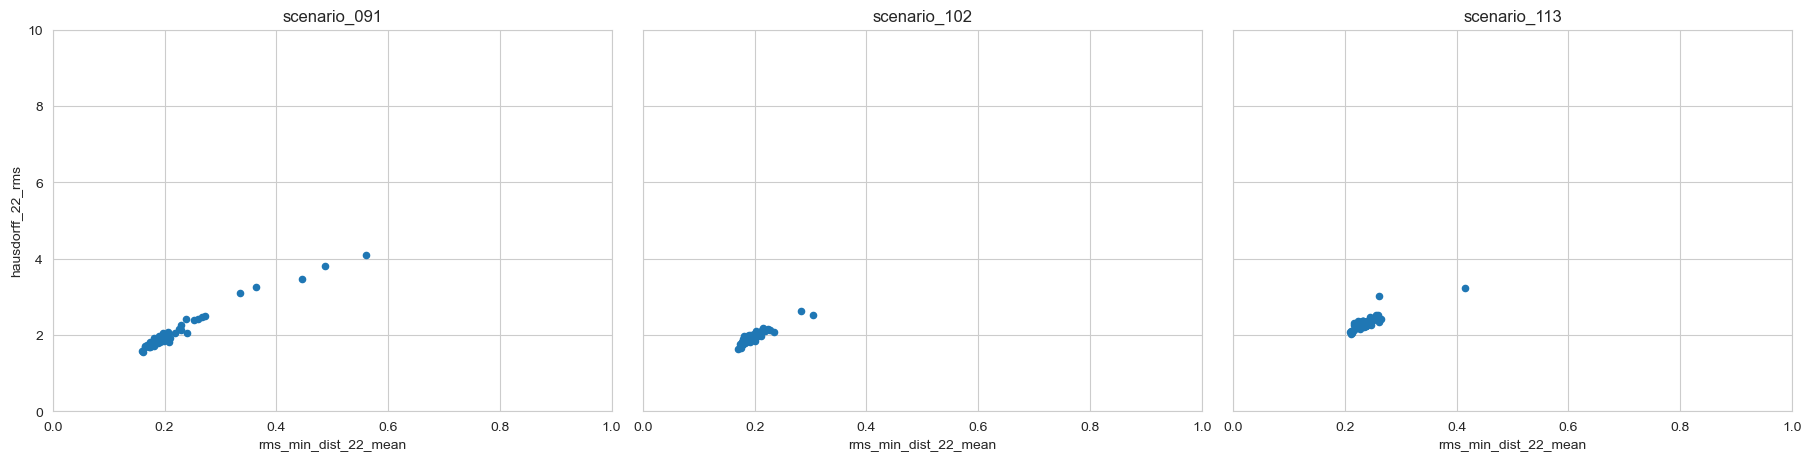

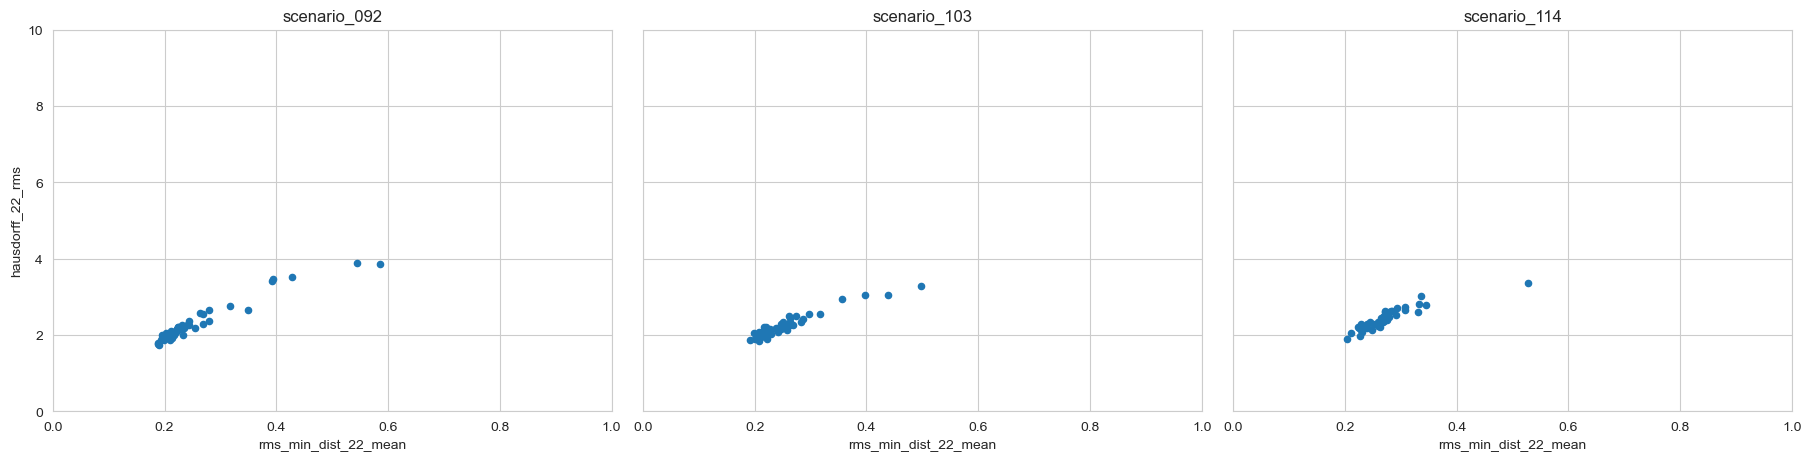

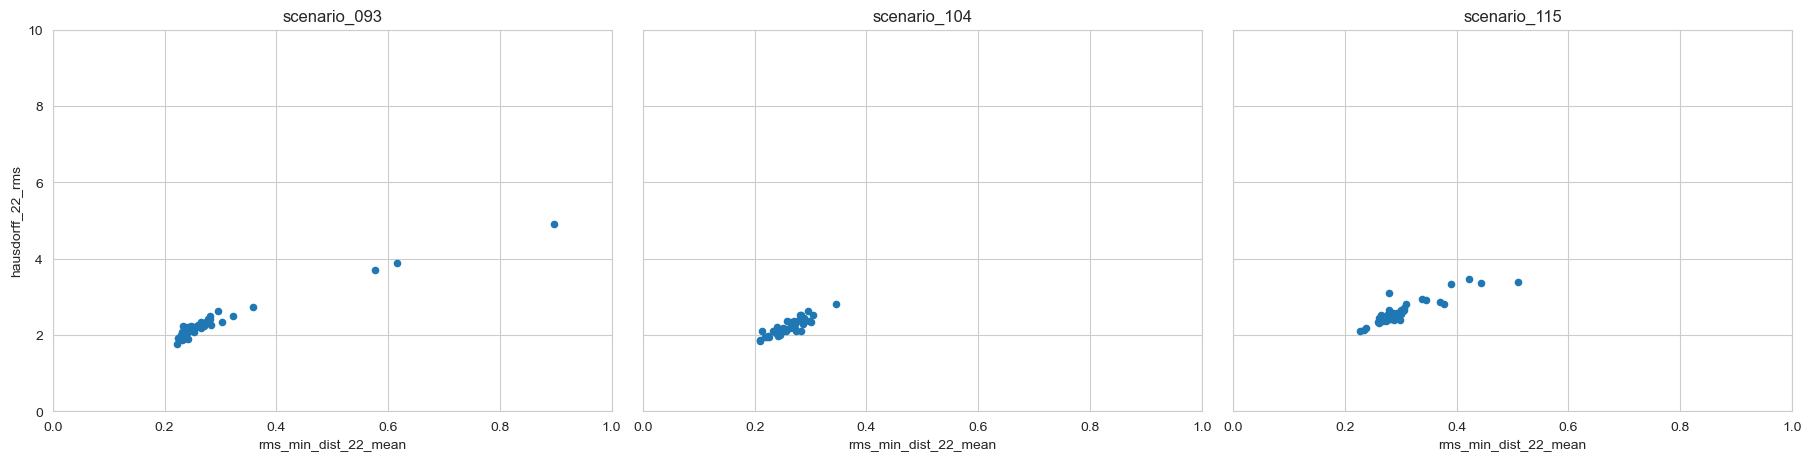

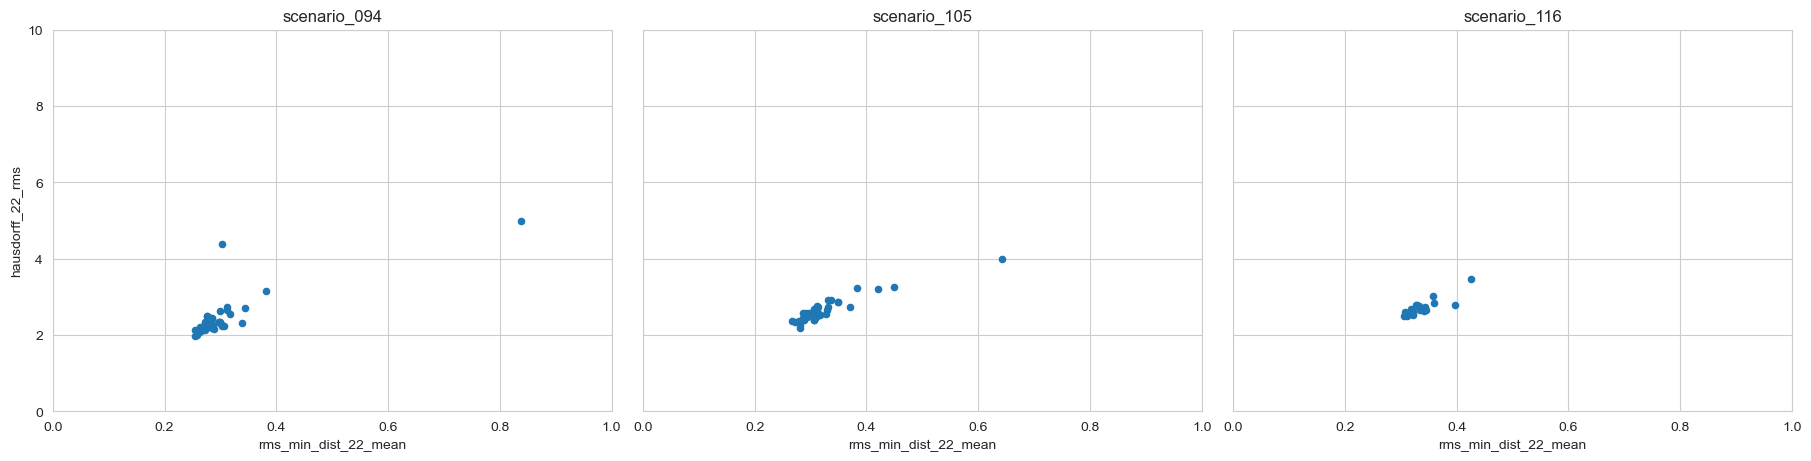

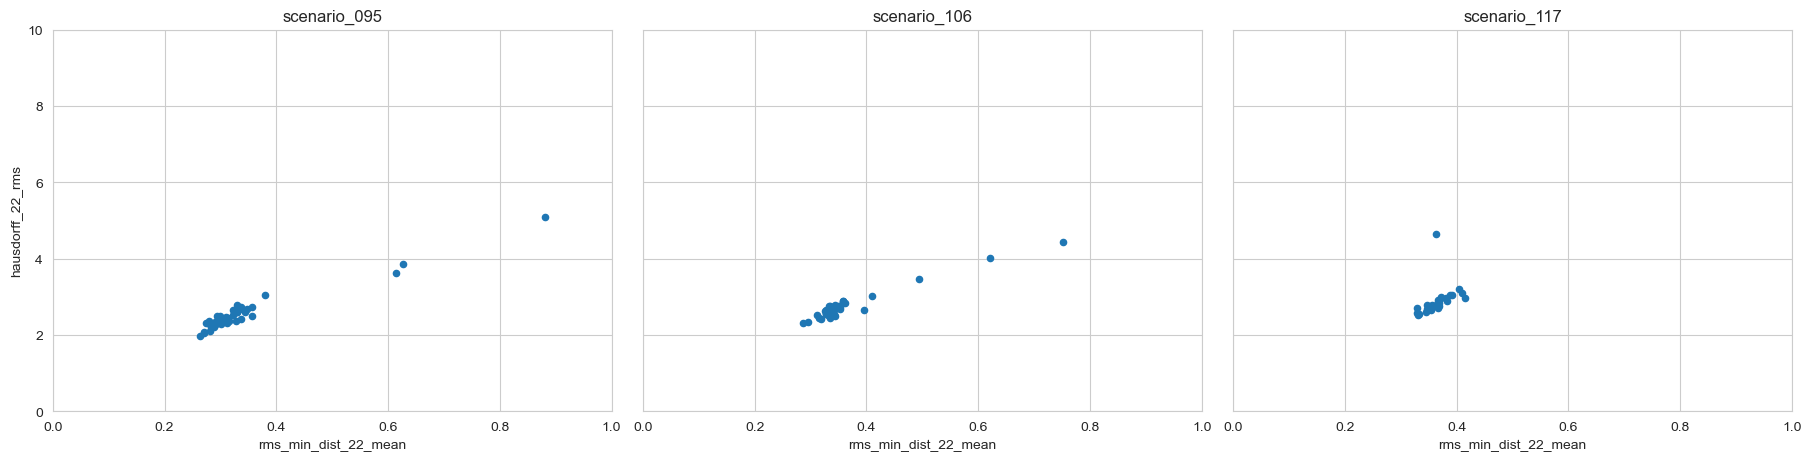

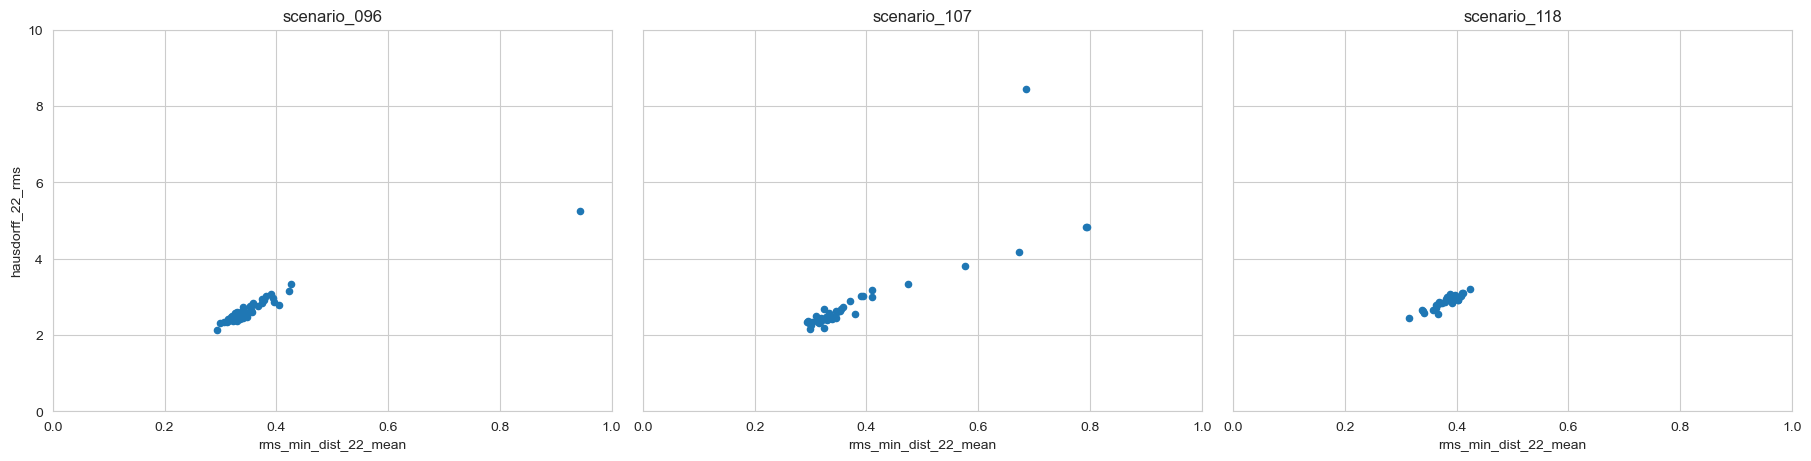

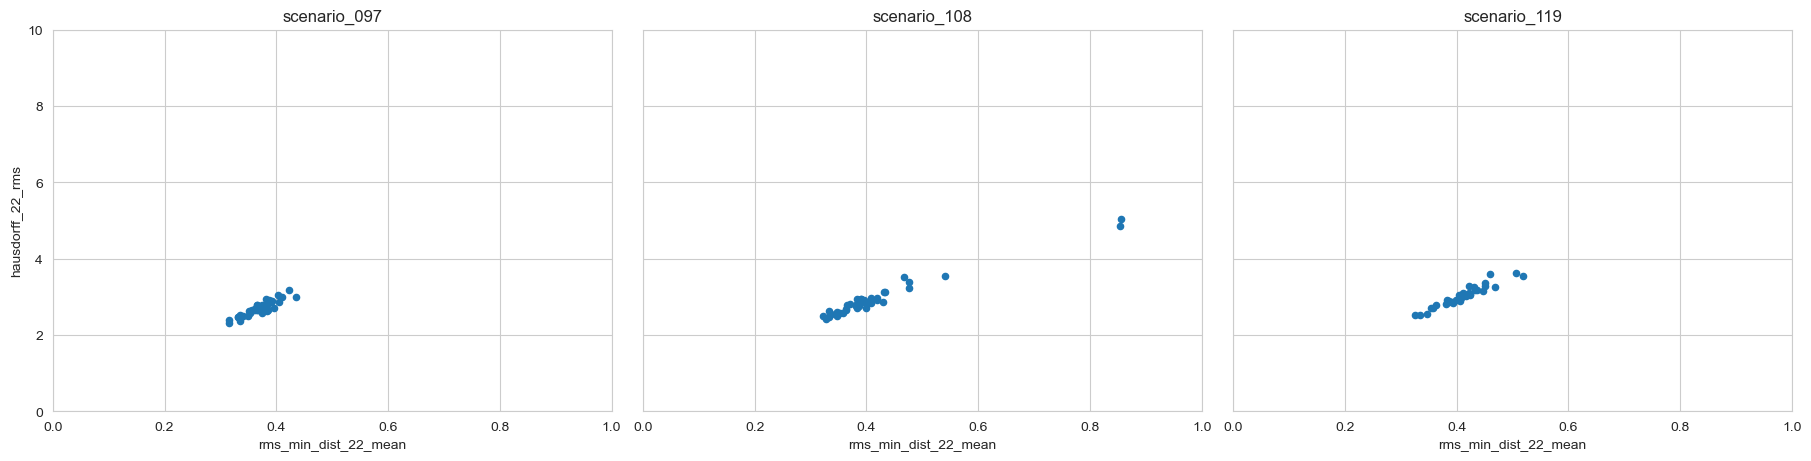

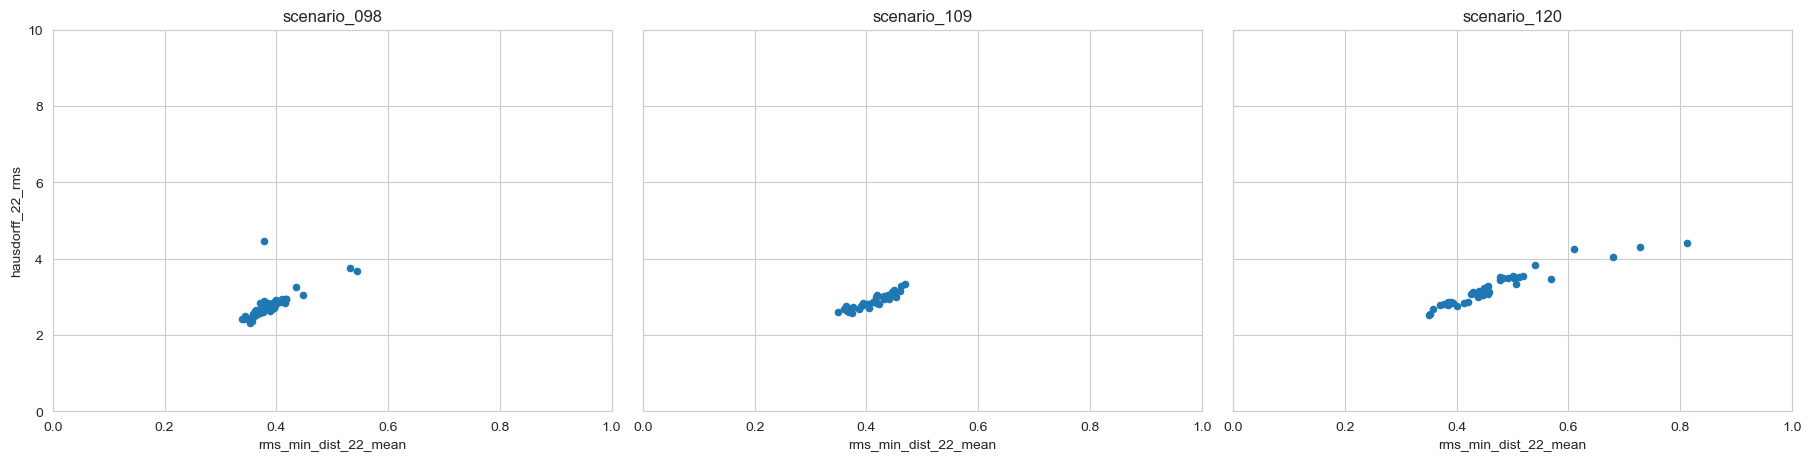

In [50]:
for k in range(11):
    plot_metric_vs_metric_2([eos[i*11 + k] for i in range(8, 11)], "rms_min_dist_22_mean", "hausdorff_22_rms", xlim=(0, 1), ylim=(0,10))

## Number of buildings reconstructed

<Axes: xlabel='gpkg_unique_22', ylabel='Count'>

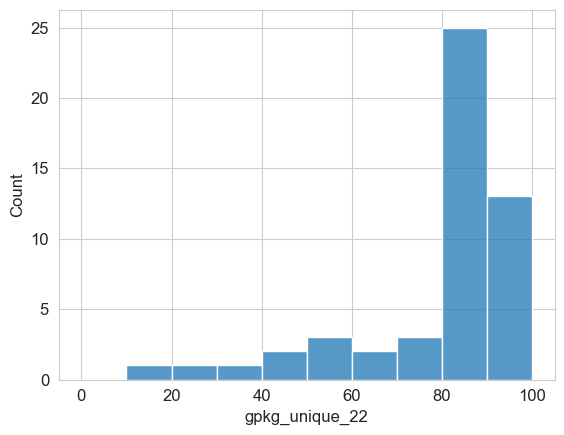

In [145]:
sns.histplot(ss[10], x="gpkg_unique_22", bins=np.arange(0, 105, 10))

# Pareto front from ChatGPT

In [13]:
# Function to check Pareto-optimality for minimization
def is_pareto_optimal_min(df):
    values = df.values
    pareto_mask = np.ones(values.shape[0], dtype=bool)  # Initialize all as True

    for i, row in enumerate(values):
        # For minimization, we check if there exists any row with values <= current row
        pareto_mask[i] = not np.any(np.all(values <= row, axis=1) & np.any(values < row, axis=1))

    return pareto_mask

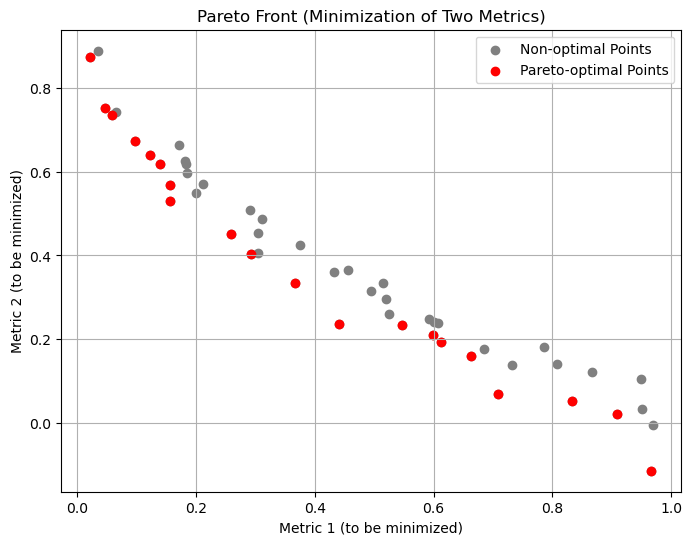

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Generate example data for two metrics (to be minimized)
np.random.seed(42)
num_points = 50
metric1 = np.random.rand(num_points)  # Random values for metric 1
metric2 = 1 - np.sqrt(metric1) + np.random.normal(0, 0.05, num_points)  # Inversely related to metric 1

# Create a DataFrame
df = pd.DataFrame({'metric1': metric1, 'metric2': metric2})

# Function to check Pareto-optimality for minimization
def is_pareto_optimal_min(df):
    values = df.values
    pareto_mask = np.ones(values.shape[0], dtype=bool)  # Initialize all as True

    for i, row in enumerate(values):
        # For minimization, we check if there exists any row with values <= current row
        pareto_mask[i] = not np.any(np.all(values <= row, axis=1) & np.any(values < row, axis=1))

    return pareto_mask

# Compute Pareto-optimal mask
df['pareto_optimal'] = is_pareto_optimal_min(df[['metric1', 'metric2']])

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(df['metric1'], df['metric2'], c='gray', label='Non-optimal Points')
plt.scatter(df.loc[df['pareto_optimal'], 'metric1'], df.loc[df['pareto_optimal'], 'metric2'],
            c='red', label='Pareto-optimal Points')
plt.title('Pareto Front (Minimization of Two Metrics)')
plt.xlabel('Metric 1 (to be minimized)')
plt.ylabel('Metric 2 (to be minimized)')
plt.legend()
plt.grid(True)
plt.show()
